![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)




# Microsoft Malware Prediction

## Table of Contents

* [A. Introduction](#introduction)
* [B. Importacion de librerias y data](#libraries)



* [2. Entendimeinto de los datos](#data_understanding)
    * [2.1. Análisis univariante de los datos](#univariate_data_analysis)
        * [2.1.1. Tamaño del dataset](#dataset_size)
        * [2.1.2. Visualización directa de los datos](#direct_visualization)
        * [2.1.3. Tipos de variables disponibles](#variable_types)
        * [2.1.4. Estadísticos descriptivos](#descriptive_statistics)
        * [2.1.5. Número de valores nulos](#null_values)
        * [2.1.6. Distribución / Rango de los valores del target](#target_distribution)
        * [2.1.7. Correlación de variables con el target](#variables_distribution)
        * [2.1.8. Visualización gráfica de las distribuciones](#visua)
    * [2.2. Análisis multivariante de los datos](#multivariate_data_analysis)

  
        
* [3. MLC3: Data preparation](#data_preparation)
    * [3.1. Limpieza de atributos](#data_cleaning)
        * [3.1.1. Ajustes de tipos](#dealing_variable_types)
        * [3.1.2. Imputacion de valores nulos](#nulls_imputation)
        * [3.1.4. Eliminación de atributos con baja varianza](#low_variance)
    * [3.2. Transformación de atributos](#data_transformation)
        * [3.2.1. Transformación de variables categóricas](#transformation_categorical)
    



* [4. MLC4: Modelacioón](#modelling)
    * [4.1. Partición y muestreo del dataset](#dataset_partition)
    * [4.2 - 4.3 Evaluación algoritmos y optimizacion de modelos](#model_definition)
    
        


* [5. MLC5: 5. Selección de modelo / Evaluación](#model_evaluation)





## A. Introducción <a class="anchor" id="introduction"></a>


The malware industry continues to be a well-organized, well-funded market dedicated to evading traditional security measures. Once a computer is infected by malware, criminals can hurt consumers and enterprises in many ways.

With more than one billion enterprise and consumer customers, Microsoft takes this problem very seriously and is deeply invested in improving security.

As one part of their overall strategy for doing so, Microsoft is challenging the data science community to develop techniques to predict if a machine will soon be hit with malware. As with their previous, Malware Challenge (2015), Microsoft is providing Kagglers with an unprecedented malware dataset to encourage open-source progress on effective techniques for predicting malware occurrences.

Can you help protect more than one billion machines from damage BEFORE it happens?

## B. Importación de librerias y data<a class="anchor" id="libraries"></a>

In [2]:
# importamos todas las librerias que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
from scipy.stats import uniform, randint

In [3]:
# importamos los datos
df = pd.read_csv('sample_mmp.csv',index_col = 0)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\4124437116.py:2: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sample_mmp.csv',index_col = 0)


In [4]:
# hacemos una primera visualización
df.head().T

8427007  \
MachineIdentifier                                          f1cd864e97bae82bdf96523e1a539121   
ProductName                                                                    win8defender   
EngineVersion                                                                   1.1.15100.1   
AppVersion                                                                  4.18.1807.18075   
AvSigVersion                                                                   1.273.1234.0   
IsBeta                                                                                    0   
RtpStateBitfield                                                                       7.00   
IsSxsPassiveMode                                                                          0   
DefaultBrowsersIdentifier                                                               NaN   
AVProductStatesIdentifier                                                         53,447.00   
AVProductsInstalled                                                                    1.00   
AVProductsEnabled                                                                      1.00   
HasTpm                                                                                    1   
CountryIdentifier                                                                         8   
CityIdentifier                                                                    85,219.00   
OrganizationIdentifier                                                                  NaN   
GeoNameIdentifier                                                                    205.00   
LocaleEnglishNameIdentifier                                                             172   
Platform                                                                          windows10   
Processor                                                                               x64   
OsVer                                                                              10.0.0.0   
OsBuild                                                                               17134   
OsSuite                                                                                 256   
OsPlatformSubRelease                                                                    rs4   
OsBuildLab                                         17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                                              Pro   
IsProtected                                                                            1.00   
AutoSampleOptIn                                                                           0   
PuaMode                                                                                 NaN   
SMode                                                                                  0.00   
IeVerIdentifier                                                                      137.00   
SmartScreen                                                                    RequireAdmin   
Firewall                                                                               1.00   
UacLuaenable                                                                           1.00   
Census_MDC2FormFactor                                                               Desktop   
Census_DeviceFamily                                                         Windows.Desktop   
Census_OEMNameIdentifier                                                           1,443.00   
Census_OEMModelIdentifier                                                        275,891.00   
Census_ProcessorCoreCount                                                              4.00   
Census_ProcessorManufacturerIdentifier                                                 5.00   
Census_ProcessorModelIdentifier                                                    2,273.00   
Census_ProcessorClass                                                                   NaN   

## 2: Entendimiento de los datos <a class="anchor" id="data_understanding"></a>

## 2.1: Análisis univariante de los datos<a class="anchor" id="univariate_data_analysis"></a>


### 2.1.1. Tamaño del dataset<a class="anchor" id="dataset_size"></a>


In [5]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 8427007 to 4295573
Columns: 83 entries, MachineIdentifier to HasDetections
dtypes: float64(36), int64(17), object(30)
memory usage: 320.4+ MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 8427007 to 4295573
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  500000 non-null  object 
 1   ProductName                                        500000 non-null  object 
 2   EngineVersion                                      500000 non-null  object 
 3   AppVersion                                         500000 non-null  object 
 4   AvSigVersion                                       500000 non-null  object 
 5   IsBeta                                             500000 non-null  int64  
 6   RtpStateBitfield                                   498168 non-null  float64
 7   IsSxsPassiveMode                                   500000 non-null  int64  
 8   DefaultBrowsersIdentifier                          24061 non-null  

In [7]:
df.describe().T

count             mean  \
IsBeta                                            500,000.00             0.00   
RtpStateBitfield                                  498,168.00             6.85   
IsSxsPassiveMode                                  500,000.00             0.02   
DefaultBrowsersIdentifier                          24,061.00         1,652.82   
AVProductStatesIdentifier                         498,062.00        47,850.91   
AVProductsInstalled                               498,062.00             1.33   
AVProductsEnabled                                 498,062.00             1.02   
HasTpm                                            500,000.00             0.99   
CountryIdentifier                                 500,000.00           108.04   
CityIdentifier                                    481,760.00        81,271.65   
OrganizationIdentifier                            345,437.00            24.87   
GeoNameIdentifier                                 499,984.00           169.73   
LocaleEnglishNameIdentifier                       500,000.00           122.61   
OsBuild                                           500,000.00        15,726.93   
OsSuite                                           500,000.00           574.72   
IsProtected                                       498,074.00             0.95   
AutoSampleOptIn                                   500,000.00             0.00   
SMode                                             470,152.00             0.00   
IeVerIdentifier                                   496,791.00           126.66   
Firewall                                          494,838.00             0.98   
UacLuaenable                                      499,377.00            13.73   
Census_OEMNameIdentifier                          494,619.00         2,218.65   
Census_OEMModelIdentifier                         494,236.00       239,128.05   
Census_ProcessorCoreCount                         497,653.00             3.99   
Census_ProcessorManufacturerIdentifier            497,653.00             4.53   
Census_ProcessorModelIdentifier                   497,651.00         2,370.99   
Census_PrimaryDiskTotalCapacity                   497,024.00       514,043.32   
Census_SystemVolumeTotalCapacity                  497,024.00       378,054.64   
Census_HasOpticalDiskDrive                        500,000.00             0.08   
Census_TotalPhysicalRAM                           495,444.00         6,129.23   
Census_InternalPrimaryDiagonalDisplaySizeInInches 497,346.00            16.69   
Census_InternalPrimaryDisplayResolutionHorizontal 497,350.00         1,548.30   
Census_InternalPrimaryDisplayResolutionVertical   497,350.00           898.24   
Census_InternalBatteryNumberOfCharges             484,962.00 1,125,600,150.21   
Census_OSBuildNumber                              500,000.00        15,841.37   
Census_OSBuildRevision                            500,000.00           967.22   
Census_OSInstallLanguageIdentifier                496,668.00            14.61   
Census_OSUILocaleIdentifier                       500,000.00            60.45   
Census_IsPortableOperatingSystem                  500,000.00             0.00   
Census_IsFlightingInternal                         84,775.00             0.00   
Census_IsFlightsDisabled                          491,067.00             0.00   
Census_ThresholdOptIn                             181,896.00             0.00   
Census_FirmwareManufacturerIdentifier             489,651.00           402.68   
Census_FirmwareVersionIdentifier                  490,939.00        33,030.99   
Census_IsSecureBootEnabled                        500,000.00             0.49   
Census_IsWIMBootEnabled                           182,334.00             0.00   
Census_IsVirtualDevice                            499,099.00             0.01   
Census_IsTouchEnabled                             500,000.00             0.13   
Census_IsPenCapable                               500,000.00             0.04   
Censu

### 2.1.2.  Visualización directa de los datos<a class="anchor" id="direct_visualization"></a>

In [8]:
df.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [9]:
df.head(5).T

8427007  \
MachineIdentifier                                          f1cd864e97bae82bdf96523e1a539121   
ProductName                                                                    win8defender   
EngineVersion                                                                   1.1.15100.1   
AppVersion                                                                  4.18.1807.18075   
AvSigVersion                                                                   1.273.1234.0   
IsBeta                                                                                    0   
RtpStateBitfield                                                                       7.00   
IsSxsPassiveMode                                                                          0   
DefaultBrowsersIdentifier                                                               NaN   
AVProductStatesIdentifier                                                         53,447.00   
AVProductsInstalled                                                                    1.00   
AVProductsEnabled                                                                      1.00   
HasTpm                                                                                    1   
CountryIdentifier                                                                         8   
CityIdentifier                                                                    85,219.00   
OrganizationIdentifier                                                                  NaN   
GeoNameIdentifier                                                                    205.00   
LocaleEnglishNameIdentifier                                                             172   
Platform                                                                          windows10   
Processor                                                                               x64   
OsVer                                                                              10.0.0.0   
OsBuild                                                                               17134   
OsSuite                                                                                 256   
OsPlatformSubRelease                                                                    rs4   
OsBuildLab                                         17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                                              Pro   
IsProtected                                                                            1.00   
AutoSampleOptIn                                                                           0   
PuaMode                                                                                 NaN   
SMode                                                                                  0.00   
IeVerIdentifier                                                                      137.00   
SmartScreen                                                                    RequireAdmin   
Firewall                                                                               1.00   
UacLuaenable                                                                           1.00   
Census_MDC2FormFactor                                                               Desktop   
Census_DeviceFamily                                                         Windows.Desktop   
Census_OEMNameIdentifier                                                           1,443.00   
Census_OEMModelIdentifier                                                        275,891.00   
Census_ProcessorCoreCount                                                              4.00   
Census_ProcessorManufacturerIdentifier                                                 5.00   
Census_ProcessorModelIdentifier                                                    2,273.00   
Census_ProcessorClass                                                                   NaN   

In [10]:
df.describe(include=['object']).T

count  unique  \
MachineIdentifier                 500000  500000   
ProductName                       500000       3   
EngineVersion                     500000      53   
AppVersion                        500000      95   
AvSigVersion                      500000    6455   
Platform                          500000       4   
Processor                         500000       3   
OsVer                             500000      21   
OsPlatformSubRelease              500000       9   
OsBuildLab                        499999     453   
SkuEdition                        500000       8   
PuaMode                              126       1   
SmartScreen                       321404      12   
Census_MDC2FormFactor             500000      12   
Census_DeviceFamily               500000       3   
Census_ProcessorClass               2082       3   
Census_PrimaryDiskTypeName        499291       4   
Census_ChassisTypeName            499963      34   
Census_PowerPlatformRoleName      499998       9   
Census_InternalBatteryType        144397      28   
Census_OSVersion                  500000     305   
Census_OSArchitecture             500000       3   
Census_OSBranch                   500000      15   
Census_OSEdition                  500000      22   
Census_OSSkuName                  500000      21   
Census_OSInstallTypeName          500000       9   
Census_OSWUAutoUpdateOptionsName  500000       6   
Census_GenuineStateName           500000       4   
Census_ActivationChannel          500000       6   
Census_FlightRing                 500000       8   

                                                                       top  \
MachineIdentifier                         f1cd864e97bae82bdf96523e1a539121   
ProductName                                                   win8defender   
EngineVersion                                                  1.1.15200.1   
AppVersion                                                 4.18.1807.18075   
AvSigVersion                                                  1.273.1420.0   
Platform                                                         windows10   
Processor                                                              x64   
OsVer                                                             10.0.0.0   
OsPlatformSubRelease                                                   rs4   
OsBuildLab                        17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                            Home   
PuaMode                                                                 on   
SmartScreen                                                   RequireAdmin   
Census_MDC2FormFactor                                             Notebook   
Census_DeviceFamily                                        Windows.Desktop   
Census_ProcessorClass                                                  mid   
Census_PrimaryDiskTypeName                                             HDD   
Census_ChassisTypeName                                            Notebook   
Census_PowerPlatformRoleName                                        Mobile   
Census_InternalBatteryType                                            lion   
Census_OSVersion                                            10.0.17134.228   
Census_OSArchitecture                                                amd64   
Census_OSBranch                                                rs4_release   
Census_OSEdition                                                      Core   
Census_OSSkuName                                                      CORE   
Census_OSInstallTypeName                                        UUPUpgrade   
Census_OSWUAutoUpdateOptionsName                                  FullAuto   
Census_GenuineStateName                                         IS_GENUINE   
Census_ActivationChannel                                            Retail   
Census_FlightRing                                                   Retail   

   

In [11]:
len(df.describe(include=['object']).T)

30

Vemos que MachineIdentifier es un valor unico por registro. Tambien vemos variables que para un unico valor tienen una frecuencia superior al 85%. Vamos a evitar este tipo de variables.

### 2.1.3. Tipos de variables disponibles<a class="anchor" id="variable_types"></a>

In [12]:
df.dtypes

MachineIdentifier                                     object
ProductName                                           object
EngineVersion                                         object
AppVersion                                            object
AvSigVersion                                          object
IsBeta                                                 int64
RtpStateBitfield                                     float64
IsSxsPassiveMode                                       int64
DefaultBrowsersIdentifier                            float64
AVProductStatesIdentifier                            float64
AVProductsInstalled                                  float64
AVProductsEnabled                                    float64
HasTpm                                                 int64
CountryIdentifier                                      int64
CityIdentifier                                       float64
OrganizationIdentifier                               float64
GeoNameIdentifier       

### 2.1.4. Estadísticos descriptivos<a class="anchor">

In [13]:
df.describe().T

count             mean  \
IsBeta                                            500,000.00             0.00   
RtpStateBitfield                                  498,168.00             6.85   
IsSxsPassiveMode                                  500,000.00             0.02   
DefaultBrowsersIdentifier                          24,061.00         1,652.82   
AVProductStatesIdentifier                         498,062.00        47,850.91   
AVProductsInstalled                               498,062.00             1.33   
AVProductsEnabled                                 498,062.00             1.02   
HasTpm                                            500,000.00             0.99   
CountryIdentifier                                 500,000.00           108.04   
CityIdentifier                                    481,760.00        81,271.65   
OrganizationIdentifier                            345,437.00            24.87   
GeoNameIdentifier                                 499,984.00           169.73   
LocaleEnglishNameIdentifier                       500,000.00           122.61   
OsBuild                                           500,000.00        15,726.93   
OsSuite                                           500,000.00           574.72   
IsProtected                                       498,074.00             0.95   
AutoSampleOptIn                                   500,000.00             0.00   
SMode                                             470,152.00             0.00   
IeVerIdentifier                                   496,791.00           126.66   
Firewall                                          494,838.00             0.98   
UacLuaenable                                      499,377.00            13.73   
Census_OEMNameIdentifier                          494,619.00         2,218.65   
Census_OEMModelIdentifier                         494,236.00       239,128.05   
Census_ProcessorCoreCount                         497,653.00             3.99   
Census_ProcessorManufacturerIdentifier            497,653.00             4.53   
Census_ProcessorModelIdentifier                   497,651.00         2,370.99   
Census_PrimaryDiskTotalCapacity                   497,024.00       514,043.32   
Census_SystemVolumeTotalCapacity                  497,024.00       378,054.64   
Census_HasOpticalDiskDrive                        500,000.00             0.08   
Census_TotalPhysicalRAM                           495,444.00         6,129.23   
Census_InternalPrimaryDiagonalDisplaySizeInInches 497,346.00            16.69   
Census_InternalPrimaryDisplayResolutionHorizontal 497,350.00         1,548.30   
Census_InternalPrimaryDisplayResolutionVertical   497,350.00           898.24   
Census_InternalBatteryNumberOfCharges             484,962.00 1,125,600,150.21   
Census_OSBuildNumber                              500,000.00        15,841.37   
Census_OSBuildRevision                            500,000.00           967.22   
Census_OSInstallLanguageIdentifier                496,668.00            14.61   
Census_OSUILocaleIdentifier                       500,000.00            60.45   
Census_IsPortableOperatingSystem                  500,000.00             0.00   
Census_IsFlightingInternal                         84,775.00             0.00   
Census_IsFlightsDisabled                          491,067.00             0.00   
Census_ThresholdOptIn                             181,896.00             0.00   
Census_FirmwareManufacturerIdentifier             489,651.00           402.68   
Census_FirmwareVersionIdentifier                  490,939.00        33,030.99   
Census_IsSecureBootEnabled                        500,000.00             0.49   
Census_IsWIMBootEnabled                           182,334.00             0.00   
Census_IsVirtualDevice                            499,099.00             0.01   
Census_IsTouchEnabled                             500,000.00             0.13   
Census_IsPenCapable                               500,000.00             0.04   
Censu

In [14]:
df.describe(include=['object']).T

count  unique  \
MachineIdentifier                 500000  500000   
ProductName                       500000       3   
EngineVersion                     500000      53   
AppVersion                        500000      95   
AvSigVersion                      500000    6455   
Platform                          500000       4   
Processor                         500000       3   
OsVer                             500000      21   
OsPlatformSubRelease              500000       9   
OsBuildLab                        499999     453   
SkuEdition                        500000       8   
PuaMode                              126       1   
SmartScreen                       321404      12   
Census_MDC2FormFactor             500000      12   
Census_DeviceFamily               500000       3   
Census_ProcessorClass               2082       3   
Census_PrimaryDiskTypeName        499291       4   
Census_ChassisTypeName            499963      34   
Census_PowerPlatformRoleName      499998       9   
Census_InternalBatteryType        144397      28   
Census_OSVersion                  500000     305   
Census_OSArchitecture             500000       3   
Census_OSBranch                   500000      15   
Census_OSEdition                  500000      22   
Census_OSSkuName                  500000      21   
Census_OSInstallTypeName          500000       9   
Census_OSWUAutoUpdateOptionsName  500000       6   
Census_GenuineStateName           500000       4   
Census_ActivationChannel          500000       6   
Census_FlightRing                 500000       8   

                                                                       top  \
MachineIdentifier                         f1cd864e97bae82bdf96523e1a539121   
ProductName                                                   win8defender   
EngineVersion                                                  1.1.15200.1   
AppVersion                                                 4.18.1807.18075   
AvSigVersion                                                  1.273.1420.0   
Platform                                                         windows10   
Processor                                                              x64   
OsVer                                                             10.0.0.0   
OsPlatformSubRelease                                                   rs4   
OsBuildLab                        17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                            Home   
PuaMode                                                                 on   
SmartScreen                                                   RequireAdmin   
Census_MDC2FormFactor                                             Notebook   
Census_DeviceFamily                                        Windows.Desktop   
Census_ProcessorClass                                                  mid   
Census_PrimaryDiskTypeName                                             HDD   
Census_ChassisTypeName                                            Notebook   
Census_PowerPlatformRoleName                                        Mobile   
Census_InternalBatteryType                                            lion   
Census_OSVersion                                            10.0.17134.228   
Census_OSArchitecture                                                amd64   
Census_OSBranch                                                rs4_release   
Census_OSEdition                                                      Core   
Census_OSSkuName                                                      CORE   
Census_OSInstallTypeName                                        UUPUpgrade   
Census_OSWUAutoUpdateOptionsName                                  FullAuto   
Census_GenuineStateName                                         IS_GENUINE   
Census_ActivationChannel                                            Retail   
Census_FlightRing                                                   Retail   

   

### 2.1.5. Número de valores nulos.<a class="anchor" id="null_values"></a>

In [15]:
df.select_dtypes(include=['number']).isnull().sum().sort_values(ascending=False)/len(df)*100

DefaultBrowsersIdentifier                           95.19
Census_IsFlightingInternal                          83.05
Census_ThresholdOptIn                               63.62
Census_IsWIMBootEnabled                             63.53
OrganizationIdentifier                              30.91
SMode                                                5.97
CityIdentifier                                       3.65
Wdft_RegionIdentifier                                3.39
Wdft_IsGamer                                         3.39
Census_InternalBatteryNumberOfCharges                3.01
Census_FirmwareManufacturerIdentifier                2.07
Census_FirmwareVersionIdentifier                     1.81
Census_IsFlightsDisabled                             1.79
Census_OEMModelIdentifier                            1.15
Census_OEMNameIdentifier                             1.08
Firewall                                             1.03
Census_TotalPhysicalRAM                              0.91
Census_IsAlway

In [16]:
#Vamos a seleccionar aquellas variables que tienen mas de un 30 % de nan para eliminarlas
porc_nan_num = pd.DataFrame(df.select_dtypes(include=['number']).isnull().sum().sort_values(ascending=False)/len(df)*100).reset_index() # creamos un DF
porc_nan_num.columns = ['name','porcentaje'] # renombramos las columnas
eliminar_num_nan = porc_nan_num[porc_nan_num['porcentaje'] >= 30]['name'].to_list() # pasamos a lista las variables a eliminar
eliminar_num_nan

['DefaultBrowsersIdentifier',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled',
 'OrganizationIdentifier']

In [17]:
df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)/len(df)*100

PuaMode                            99.97
Census_ProcessorClass              99.58
Census_InternalBatteryType         71.12
SmartScreen                        35.72
Census_PrimaryDiskTypeName          0.14
Census_ChassisTypeName              0.01
Census_PowerPlatformRoleName        0.00
OsBuildLab                          0.00
Census_OSInstallTypeName            0.00
Census_OSSkuName                    0.00
Census_OSEdition                    0.00
Census_OSArchitecture               0.00
Census_OSWUAutoUpdateOptionsName    0.00
Census_GenuineStateName             0.00
Census_OSVersion                    0.00
Census_ActivationChannel            0.00
Census_OSBranch                     0.00
MachineIdentifier                   0.00
ProductName                         0.00
Census_DeviceFamily                 0.00
Census_MDC2FormFactor               0.00
SkuEdition                          0.00
OsPlatformSubRelease                0.00
OsVer                               0.00
Processor       

In [18]:
#Vamos a seleccionar aquellas variables que tienen mas de un 30 % de nan para eliminarlas
porc_nan_cat = pd.DataFrame(df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)/len(df)*100).reset_index() # creamos un DF
porc_nan_cat.columns = ['name','porcentaje'] # renombramos las columnas
eliminar_cat_nan = porc_nan_cat[porc_nan_cat['porcentaje'] >= 30]['name'].to_list() # pasamos a lista las variables a eliminar
eliminar_cat_nan

['PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'SmartScreen']

In [19]:
# Eliminamos aquellas variables con altos valores en nan
eliminar_nan = eliminar_cat_nan + eliminar_num_nan
df.drop(eliminar_nan, axis='columns', inplace=True)

### 2.1.6. Distribución / Rango de los valores del target<a class="anchor" id="target_distribution"></a>

In [20]:
# definimos la variable target como la etiqueta
target = 'HasDetections'
# vemos los valores que puede tomas
df[target].unique()

array([1, 0], dtype=int64)

In [21]:
# analizamos la distribucion
df[target].value_counts(normalize = True)

0   0.50
1   0.50
Name: HasDetections, dtype: float64

Vemos que está perfectamente balanceado el target

### 2.1.7. Correlación de variables con el target<a class="anchor" id="variables_distribution"></a>

In [22]:
df_correlation_target_Pearson = df[df.columns].corr()[target]
df_correlation_target_Pearson.sort_values()

AVProductsInstalled                                 -0.15
Census_IsAlwaysOnAlwaysConnectedCapable             -0.06
Census_IsVirtualDevice                              -0.05
AVProductsEnabled                                   -0.04
Census_IsTouchEnabled                               -0.04
IsSxsPassiveMode                                    -0.03
Census_FirmwareManufacturerIdentifier               -0.03
Wdft_RegionIdentifier                               -0.02
OsSuite                                             -0.02
Census_IsPenCapable                                 -0.02
Census_OEMNameIdentifier                            -0.02
SMode                                               -0.01
Census_OSBuildRevision                              -0.01
CityIdentifier                                      -0.00
Census_IsFlightsDisabled                            -0.00
Census_OEMModelIdentifier                           -0.00
Census_IsSecureBootEnabled                          -0.00
IsBeta        

Siendo el target categórico, es normal que no haya una correlación con las variables. Analizaremos la relacion de cada uno de los valores da las variables con el target.

### 2.1.8. Análisis univariante<a class="anchor" id="univariante"></a>

In [23]:
numerico = ['RtpStateBitfield','AVProductsInstalled','AVProductsEnabled','OsSuite',
            'IeVerIdentifier','Census_ProcessorCoreCount','Census_PrimaryDiskTotalCapacity',
            'Census_TotalPhysicalRAM','Census_InternalPrimaryDiagonalDisplaySizeInInches',
            'Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical',
            'Census_InternalBatteryNumberOfCharges',
            'Census_IsPenCapable','Census_IsAlwaysOnAlwaysConnectedCapable','Wdft_IsGamer','EngineVersion',
            'AppVersion','AvSigVersion','OsVer','Census_OSVersion','Census_FirmwareVersionIdentifier',
            'Census_SystemVolumeTotalCapacity']
len(numerico)

22

In [24]:
boolenao = ['IsBeta', 'IsSxsPassiveMode','HasTpm','IsProtected','AutoSampleOptIn' ,
            'SMode','Firewall','UacLuaenable','Census_HasOpticalDiskDrive','Census_IsFlightsDisabled','Census_IsPortableOperatingSystem',
            'Census_IsSecureBootEnabled',
            'Census_IsVirtualDevice','Census_IsTouchEnabled'
            ]
len(boolenao)

14

In [25]:
categorico = ['AVProductStatesIdentifier','CountryIdentifier',
              'CityIdentifier','GeoNameIdentifier',
              'LocaleEnglishNameIdentifier','OsBuild','Census_OEMNameIdentifier',
              'Census_OEMModelIdentifier','Census_ProcessorManufacturerIdentifier',
              'Census_ProcessorModelIdentifier','Census_OSBuildNumber','Census_OSBuildRevision',
              'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier','Census_FirmwareManufacturerIdentifier',
              'Wdft_RegionIdentifier','MachineIdentifier','ProductName','Platform','Processor','OsPlatformSubRelease','OsBuildLab',
              'SkuEdition','Census_MDC2FormFactor','Census_DeviceFamily','Census_PrimaryDiskTypeName','Census_ChassisTypeName',
              'Census_PowerPlatformRoleName','Census_OSArchitecture','Census_OSBranch','Census_OSEdition',
              'Census_OSSkuName','Census_OSInstallTypeName','Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName',
              'Census_ActivationChannel','Census_FlightRing']
len(categorico)

37

#### 2.1.8.2.1 - Numéricas<a class="anchor" id="visuan"></a>

In [25]:
# Función 1: plot_normalized_stacked_bar_ordenado para variables numéricas
def plot_normalized_stacked_bar_numerico(variable, target='HasDetections'):
    titulo = f'{variable} - porcentaje detectados'
    
    # Obtener las categorías ordenadas según la variable numérica en orden ascendente
    categorias_ordenadas = df[variable].sort_values().unique()
    
    # Calcular el porcentaje de detecciones para cada valor de la variable numérica
    df_plot = df.groupby([target, variable]).size().reset_index()
    df_plot = df_plot.pivot(index=variable, columns=target)
    df_plot.columns = ['not detected', 'detected']
    df_plot['conteo_total'] = df_plot.sum(axis=1)
    df_plot['not detected'] /= df_plot['conteo_total']
    df_plot['detected'] /= df_plot['conteo_total']


    ax = plt.subplot(212)  # Definir la subtrama para el segundo gráfico
    df_plot[['not detected', 'detected']].plot(kind='bar', stacked=True, width=0.8, ax=ax)
    plt.xticks(range(len(categorias_ordenadas)), categorias_ordenadas)
    plt.title(titulo)
    plt.axhline(y=0.5, color='black', linestyle='--')
    plt.ylim(0, 1)

# Función 2: analisis_numericas para variables numéricas
def analisis_numericas(variable):
    valores_presentes = df[variable].dropna()
    ax = plt.subplot(211)  # Definir la subtrama para el primer gráfico
    sns.histplot(df[variable], kde=False, bins=20, color='steelblue', ax=ax)
    plt.title('Distribución de ' + variable)

# Nueva función que combina las visualizaciones para variables numéricas
def combinar_visualizaciones_numerico(variable):
    # Crear una figura con dos subtramas (2 filas, 1 columna)
    fig = plt.figure(figsize=(6, 7))

    # Llamar a las funciones para cada subtrama (se invierte el orden)
    plot_normalized_stacked_bar_numerico(variable)
    analisis_numericas(variable)

    # Ajustar la disposición de los gráficos
    plt.tight_layout()

    # Mostrar el gráfico combinado
    plt.show()

In [26]:
numerico

['RtpStateBitfield',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'OsSuite',
 'IeVerIdentifier',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsVer',
 'Census_OSVersion',
 'Census_FirmwareVersionIdentifier',
 'Census_SystemVolumeTotalCapacity']

In [27]:
# visualizamos las 7 variables
# [combinar_visualizaciones_numerico(x) for x in numerico]

In [28]:
# definimos una funcion para visualizar la relacion entre el target y una de las variables mediante un gráfico de barras apiladas normalizado.
def plot_normalized_stacked_bar(variable, target = 'HasDetections', min_apariciones=5000):
    
    # Obtener las frecuencias de cada valor en la columna variable
    value_counts = df[variable].value_counts()
    # Filtrar los valores que tienen más de min_apariciones de apariciones
    high_frequency_values = value_counts[value_counts >= min_apariciones]
    print(high_frequency_values)
    # Filtrar el DataFrame original para incluir solo las filas con valores que tienen más de min_apariciones de apariciones
    df_filtered = df[df[variable].isin(high_frequency_values.index)]
    df_plot = df_filtered.groupby([target, variable]).size().reset_index() # agrupamos por target y variable
    df_plot = df_plot.pivot(index=variable, columns=target) # pivotamos 
    df_plot.columns = ['not detected', 'detected'] #renombramos las columnas
    df_plot['conteo_total'] = df_plot.sum(axis=1) # sumamos los valores para normalizarlos
    df_plot['not detected'] /= df_plot['conteo_total'] # normalizamos las dos variables
    df_plot['detected'] /= df_plot['conteo_total']
    df_plot.drop(columns = 'conteo_total', inplace=True) # eliminamos la variable conteo total
    # Reordenar las filas del DataFrame según la frecuencia de cada valor
    df_plot_sorted = df_plot.loc[high_frequency_values.index]
    df_plot_sorted[['not detected','detected']].plot(kind='bar', stacked=True) # graficamos
    titulo = f'{variable} - porcentaje detectados'
    plt.title(titulo)
    plt.show()
    

In [29]:
# definimos una funcion para analizar las variables numericas
def analisis_numericas(columna):
    print('**********************************************************************************************************************')
    print('Variable:',columna)
    print('Nan', str(df[columna].isna().sum()))
    print('Unique :',len(df[columna].unique()))
    print(df[columna].value_counts())
    print('Max :', df[columna].max())
    print('Min :', df[columna].min())
    print('Mean:     ',str(df[columna].mean()))
    print('Median:   ',str(df[columna].median()))
    sns.histplot(df[columna])
    plt.show()
    sns.boxplot(df[columna])
    plt.show()
    print('**********************************************************************************************************************')

In [30]:
# definimos una funcion para poder hacer un analisis de las variables booleanas
def analisis_boolean(columna):
    print('**********************************************************************************************************************')
    print('Variable:',columna)
    print('Unique :',len(df[columna].unique()))
    print(df[columna].value_counts(dropna=False, normalize=True)*100)
    print('**********************************************************************************************************************')

In [31]:
# definimos una funcion para las variables categoricas
def analisis_categoricas(columna):
    print('**********************************************************************************************************************')
    print('Variable:',columna)
    print('Nan', str(df[columna].isna().sum()))
    print('Unique :',len(df[columna].unique()))
    print('Valores: ', df[columna].unique())
    print(df[columna].value_counts())
    sns.histplot(df[columna])
    plt.show()
    print('**********************************************************************************************************************')

In [32]:
#creamos un df para hacer las anotaciones de cada variable
df_comentarios = pd.DataFrame(columns=['Variable', 'tipo'])

# creamos una funcion para introcuir los valores en las observaciones
def comentarios(df_comentarios):
    # Pedir al usuario los valores para cada columna
    valor_columna1 = input("Variable: ")
    valor_columna2 = input("tipo: ")


    # Agregar una nueva fila al DataFrame con los valores ingresados
    nueva_fila = {'Variable': valor_columna1, 'tipo': valor_columna2}
    df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)

    return df_comentarios


In [123]:
df_comentarios = comentarios(df_comentarios)

#### 2.1.8.1 MachineIdentifier <a class="anchor" id="MachineIdentifier"></a>

In [ ]:
df.MachineIdentifier.nunique()

500000

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


In [ ]:
df.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

#### 2.1.8.2 ProductName <a class="anchor" id="ProductName"></a>

In [ ]:
df.columns[1]

'ProductName'

In [ ]:
df.ProductName.value_counts()

win8defender     494604
mse                5395
mseprerelease         1
Name: ProductName, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.3 EngineVersion <a class="anchor" id="EngineVersion"></a>

In [ ]:
df.columns[2]

'EngineVersion'

**********************************************************************************************************************
Variable: EngineVersion
Nan 0
Unique : 53
Valores:  ['1.1.15100.1' '1.1.15200.1' '1.1.14600.4' '1.1.15000.2' '1.1.15300.6'
 '1.1.13202.0' '1.1.14800.3' '1.1.15300.5' '1.1.14104.0' '1.1.14901.4'
 '1.1.14405.2' '1.1.14306.0' '1.1.14500.5' '1.1.13504.0' '1.1.14901.3'
 '1.1.14201.0' '1.1.14700.5' '1.1.14305.0' '1.1.14003.0' '1.1.13601.0'
 '1.1.13000.0' '1.1.13804.0' '1.1.14202.0' '1.1.12902.0' '1.1.13303.0'
 '1.1.15000.1' '1.1.13103.0' '1.1.13903.0' '1.1.13704.0' '1.1.13407.0'
 '1.1.13701.0' '1.1.12805.0' '1.1.14700.3' '1.1.14800.1' '1.1.14700.4'
 '1.1.12101.0' '1.1.14103.0' '1.1.12400.0' '1.1.14002.0' '1.1.12603.0'
 '1.1.14500.2' '1.1.14001.0' '1.1.12804.0' '1.1.13803.0' '1.1.13902.0'
 '1.1.14303.0' '1.1.13406.0' '1.1.11701.0' '1.1.13802.0' '1.1.12706.0'
 '1.1.13102.0' '1.1.10401.0' '1.1.14102.0']
1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901

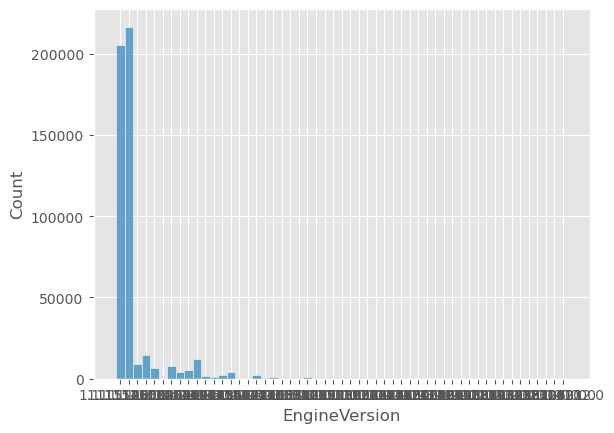

**********************************************************************************************************************


In [ ]:
analisis_categoricas('EngineVersion')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.4 AppVersion <a class="anchor" id="AppVersion"></a>

In [ ]:
df.columns[3]

'AppVersion'

**********************************************************************************************************************
Variable: AppVersion
Nan 0
Unique : 95
Valores:  ['4.18.1807.18075' '4.9.10586.1106' '4.18.1806.18062' '4.8.10240.17443'
 '4.13.17134.228' '4.12.16299.15' '4.14.17639.18041' '4.9.10586.0'
 '4.12.17007.18022' '4.8.10240.16384' '4.10.209.0' '4.10.14393.0'
 '4.13.17134.1' '4.12.17007.18011' '4.16.17656.18052' '4.10.14393.1613'
 '4.13.17134.191' '4.11.15063.1155' '4.9.10586.873' '4.10.14393.726'
 '4.12.17007.17123' '4.9.10586.962' '4.9.10586.589' '4.14.17613.18039'
 '4.8.10240.17202' '4.11.15063.447' '4.13.17134.112' '4.9.10586.672'
 '4.11.15063.0' '4.9.10586.1045' '4.10.14393.1794' '4.18.1809.2'
 '4.8.10240.17394' '4.8.10240.17889' '4.10.14393.953' '4.10.14393.1593'
 '4.10.14393.1198' '4.9.218.0' '4.9.10586.494' '4.14.17613.18038'
 '4.8.207.0' '4.10.14393.2273' '4.8.10240.17914' '4.9.10586.839'
 '4.9.10586.965' '4.10.14393.1066' '4.10.205.0' '4.9.10586.916'
 '4.6.305.0' '

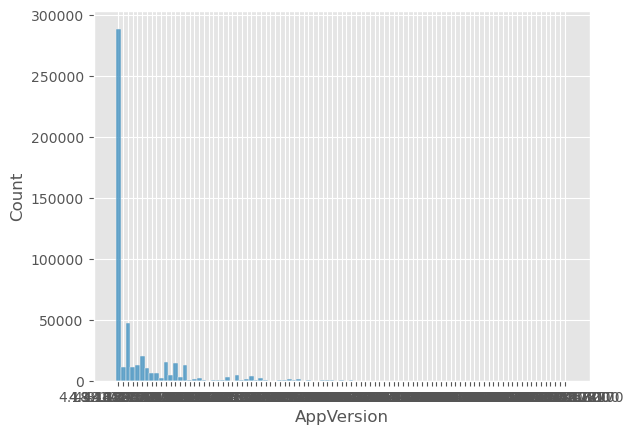

**********************************************************************************************************************


In [ ]:
analisis_categoricas('AppVersion')

4.18.1807.18075     288809
4.18.1806.18062      47641
4.12.16299.15        20197
4.10.209.0           15292
4.13.17134.1         14414
4.16.17656.18052     13185
4.13.17134.228       12729
4.9.10586.1106       11432
4.8.10240.17443      11385
4.14.17639.18041     10670
Name: AppVersion, dtype: int64


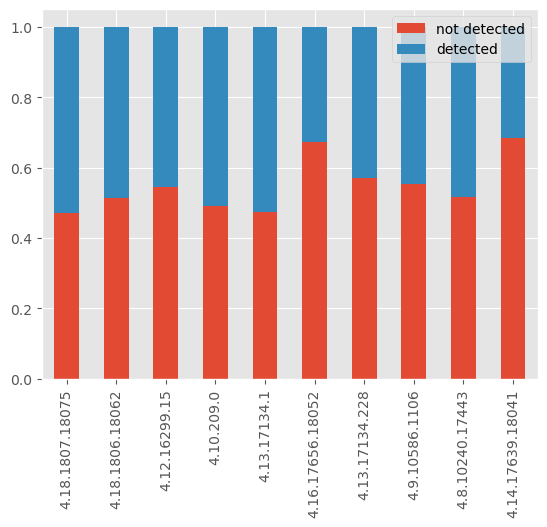

In [ ]:
plot_normalized_stacked_bar('AppVersion')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.5 AvSigVersion <a class="anchor" id="AvSigVersion"></a>

In [ ]:
df.columns[4]

'AvSigVersion'

In [ ]:
df.AvSigVersion.value_counts()

1.273.1420.0    5771
1.263.48.0      5537
1.275.1140.0    5317
1.275.727.0     5214
1.273.371.0     4799
                ... 
1.235.450.0        1
1.225.3320.0       1
1.233.294.0        1
1.229.892.0        1
1.235.1538.0       1
Name: AvSigVersion, Length: 6455, dtype: int64

In [ ]:
df.AvSigVersion.nunique()

6455

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.6 IsBeta <a class="anchor" id="IsBeta"></a>

In [ ]:
df.columns[5]

'IsBeta'

In [ ]:
df.IsBeta.value_counts()

0    499999
1         1
Name: IsBeta, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.7 RtpStateBitfield <a class="anchor" id="RtpStateBitfield"></a>

In [ ]:
df.columns[6]

'RtpStateBitfield'

In [ ]:
df.RtpStateBitfield.value_counts()

7.00     484841
0.00      10610
8.00       1277
5.00       1158
3.00        176
1.00        105
35.00         1
Name: RtpStateBitfield, dtype: int64

7.00    484841
0.00     10610
8.00      1277
5.00      1158
3.00       176
1.00       105
Name: RtpStateBitfield, dtype: int64


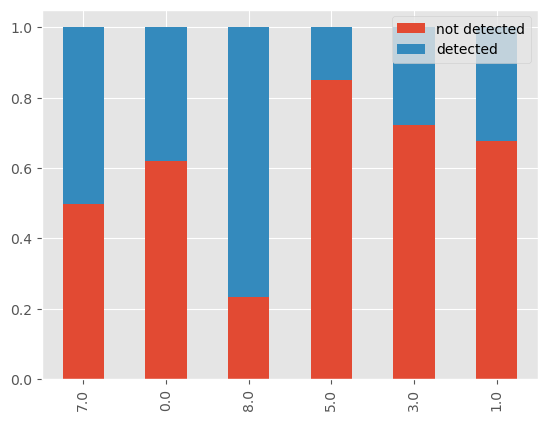

In [ ]:
plot_normalized_stacked_bar('RtpStateBitfield',min_apariciones=100)

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.8 IsSxsPassiveMode <a class="anchor" id="IsSxsPassiveMode"></a>

In [ ]:
df.columns[7]

'IsSxsPassiveMode'

In [ ]:
df.IsSxsPassiveMode.value_counts()

0    491379
1      8621
Name: IsSxsPassiveMode, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


In [ ]:
df_comentarios

Variable                                        Comentarios  \
0                  0                                                  0   
1  MachineIdentifier                       Valor único por observación.   
2        ProductName            99 % de observaciones en un solo valor.   
3      EngineVersion  Se concentran la mayoria de observaciones en d...   
4         AppVersion  el 60% de las observaciones tienen un unico va...   
5       AvSigVersion  Esta variable tiene 6455 valores distintos. El...   
6             IsBeta                   Solo tiene una observación en 1.   
7   RtpStateBitfield  El 96% de las observaciones hacen referencia a...   
8   IsSxsPassiveMode                 98% observaciones en un solo valor   

  Eliminar  
0        0  
1        1  
2        1  
3        0  
4        0  
5        1  
6        1  
7        1  
8        1

In [ ]:
df.columns[8]

'DefaultBrowsersIdentifier'

In [ ]:
df.DefaultBrowsersIdentifier.value_counts()

239.00      2589
3,195.00    2423
1,632.00    1601
3,176.00    1313
146.00      1231
            ... 
2,285.00       1
2,100.00       1
2,459.00       1
2,196.00       1
1,427.00       1
Name: DefaultBrowsersIdentifier, Length: 554, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.9 AVProductStatesIdentifier <a class="anchor" id="AVProductStatesIdentifier"></a>

In [ ]:
df.columns[8]

'AVProductStatesIdentifier'

In [ ]:
df.AVProductStatesIdentifier.value_counts()

53,447.00    326463
7,945.00      26642
47,238.00     18436
62,773.00     14931
46,413.00      6343
              ...  
2,451.00          1
19,604.00         1
3,193.00          1
26,492.00         1
18,324.00         1
Name: AVProductStatesIdentifier, Length: 5516, dtype: int64

53,447.00    326463
7,945.00      26642
47,238.00     18436
62,773.00     14931
Name: AVProductStatesIdentifier, dtype: int64


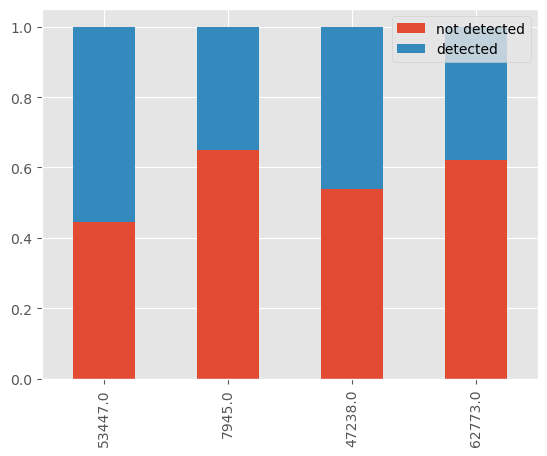

In [ ]:
plot_normalized_stacked_bar('AVProductStatesIdentifier')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.10 AVProductsInstalled <a class="anchor" id="AVProductsInstalled"></a>

In [ ]:
df.columns[9]

'AVProductsInstalled'

In [ ]:
df.AVProductsInstalled.value_counts()

1.00    348046
2.00    137856
3.00     11617
4.00       514
5.00        29
Name: AVProductsInstalled, dtype: int64

1.00    348046
2.00    137856
3.00     11617
Name: AVProductsInstalled, dtype: int64


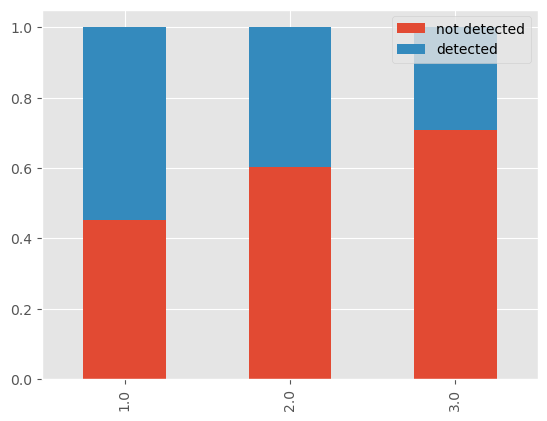

In [ ]:
plot_normalized_stacked_bar('AVProductsInstalled')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.11 AVProductsEnabled <a class="anchor" id="MachineIdentifier"></a>

In [ ]:
df.columns[10]

'AVProductsEnabled'

In [ ]:
df.AVProductsEnabled.value_counts()

1.00    485179
2.00     11074
0.00      1467
3.00       316
4.00        26
Name: AVProductsEnabled, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.12 HasTpm <a class="anchor" id="HasTpm"></a>

In [ ]:
df.columns[11]

'HasTpm'

In [ ]:
df.value_counts('HasTpm')

HasTpm
1    493908
0      6092
dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.13 CountryIdentifier <a class="anchor" id="CountryIdentifier"></a>

In [ ]:
df.columns[12]

'CountryIdentifier'

In [ ]:
df.CountryIdentifier.value_counts()

43     22339
29     19273
141    18420
93     16205
171    15743
60     13118
201    12405
207    11981
66     11607
89     11064
97     10883
214    10576
158    10302
44     10159
9       9763
107     9446
68      8950
41      8948
51      8868
203     8785
35      7845
149     7475
160     7456
195     7444
142     7378
205     6547
155     6179
164     6033
173     5269
88      5085
159     5019
59      4950
101     4590
12      4557
220     4551
91      4521
169     4479
50      4215
80      4050
2       3822
19      3678
57      3665
84      3549
177     3415
11      3223
18      3210
95      3179
21      3037
110     2929
178     2704
45      2663
39      2558
211     2380
53      2377
180     2343
86      2297
94      2265
81      2243
55      2191
147     2187
150     2171
33      2092
170     1981
122     1973
118     1925
90      1868
115     1848
154     1838
179     1834
152     1757
56      1677
100     1654
167     1623
108     1608
104     1584
151     1578
188     1556

43     22339
29     19273
141    18420
93     16205
171    15743
60     13118
201    12405
207    11981
66     11607
89     11064
97     10883
214    10576
158    10302
44     10159
Name: CountryIdentifier, dtype: int64


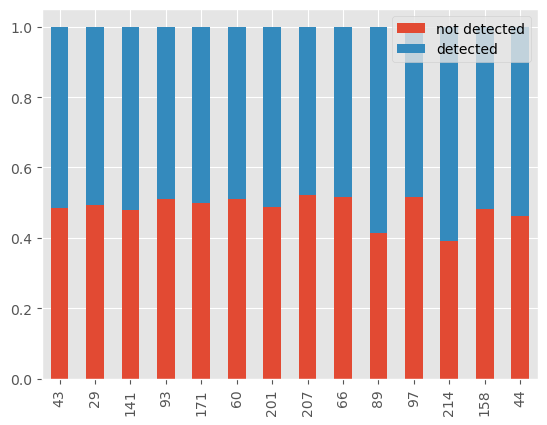

In [ ]:
plot_normalized_stacked_bar('CountryIdentifier')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.14 CityIdentifier <a class="anchor" id="CityIdentifier"></a>

In [ ]:
df.columns[13]

'CityIdentifier'

In [ ]:
df.CityIdentifier.value_counts()

130,775.00    5271
16,668.00     4747
82,373.00     4649
10,222.00     4011
61,668.00     3724
              ... 
151,632.00       1
41,727.00        1
83,230.00        1
131,294.00       1
148,194.00       1
Name: CityIdentifier, Length: 37157, dtype: int64

In [ ]:
df['CityIdentifier'] = df['CityIdentifier'].astype('category')

**********************************************************************************************************************
Variable: CityIdentifier
Nan 18240
Unique : 37158
Valores:  [85,219.00, 54,198.00, 122,689.00, 114,587.00, 72,421.00, ..., 134,931.00, 132,671.00, 153,581.00, 89,901.00, 148,194.00]
Length: 37158
Categories (37157, float64): [7.00, 8.00, 11.00, 12.00, ..., 167,946.00, 167,953.00, 167,954.00, 167,958.00]
130775.0    5271
16668.0     4747
82373.0     4649
10222.0     4011
61668.0     3724
            ... 
76480.0        1
76470.0        1
76462.0        1
76461.0        1
167958.0       1
Name: CityIdentifier, Length: 37157, dtype: int64


C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\1478021926.py:7: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print('Valores: ', df[columna].unique())


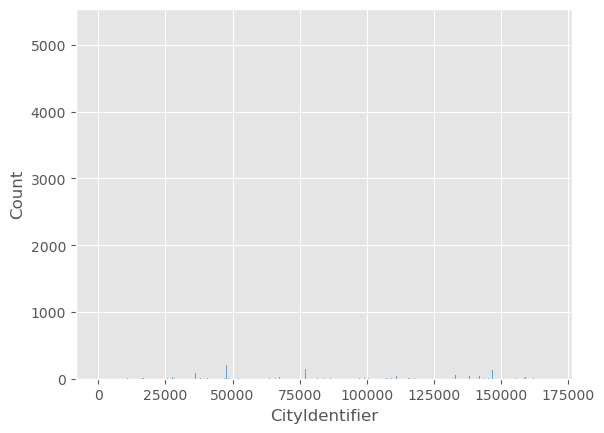

**********************************************************************************************************************


In [ ]:
analisis_categoricas('CityIdentifier')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


In [ ]:
df_comentarios

Variable  \
1           MachineIdentifier   
2                 ProductName   
3               EngineVersion   
4                  AppVersion   
5                AvSigVersion   
6                      IsBeta   
7            RtpStateBitfield   
8            IsSxsPassiveMode   
10  AVProductStatesIdentifier   
11        AVProductsInstalled   
12          AVProductsEnabled   
13                     HasTpm   
14          CountryIdentifier   
15             CityIdentifier   

                                          Comentarios Eliminar  
1                        Valor único por observación.        1  
2             99 % de observaciones en un solo valor.        1  
3   Se concentran la mayoria de observaciones en d...        0  
4   el 60% de las observaciones tienen un unico va...        0  
5   Esta variable tiene 6455 valores distintos. El...        1  
6                    Solo tiene una observación en 1.        1  
7   El 96% de las observaciones hacen referencia a...        1  
8                  98% observaciones en un solo valor        1  
10  El 65 de las observaciones tienen el mismo val...        0  
11  Nos quedaremos con los tres primeros valores y...        0  
12  Tiene una concentración del 97% de observacion...        1  
13  98% de las observaciones apuntan a un único valor        1  
14  Tiene mucha dispersión. nos quedamos con los 1...        0  
15  Tiene demasiada dispersion. El valor que mas s...        1

#### 2.1.8.15 GeoNameIdentifier <a class="anchor" id="GeoNameIdentifier"></a>

In [ ]:
df.columns[14]

'GeoNameIdentifier'

In [ ]:
df.GeoNameIdentifier.value_counts()

277.00    86080
211.00    23593
53.00     22977
89.00     20174
240.00    19489
35.00     19144
167.00    18845
276.00    16600
267.00    12106
126.00    11028
119.00    10419
98.00     10234
138.00     9717
255.00     9008
57.00      8722
10.00      8008
204.00     7776
52.00      7764
181.00     7297
120.00     7104
45.00      6388
205.00     6315
202.00     6162
224.00     5818
157.00     5607
201.00     5191
117.00     5052
258.00     4806
129.00     4800
15.00      4447
68.00      4161
237.00     4068
101.00     3766
125.00     3611
287.00     3520
274.00     3466
251.00     3343
24.00      3174
115.00     3038
76.00      2701
230.00     2557
209.00     2518
275.00     2494
16.00      2420
252.00     2335
71.00      2330
39.00      2236
233.00     2225
77.00      2122
64.00      2058
63.00      2013
192.00     2010
234.00     1775
107.00     1755
29.00      1592
184.00     1474
198.00     1452
88.00      1448
150.00     1354
123.00     1316
194.00     1272
78.00      1173
122.00  

In [ ]:
df.GeoNameIdentifier.isna().sum()

16

In [ ]:
df.GeoNameIdentifier.nunique()

268

In [ ]:
df['GeoNameIdentifier'] = df['GeoNameIdentifier'].astype('category')

**********************************************************************************************************************
Variable: GeoNameIdentifier
Nan 16
Unique : 269
Valores:  [205.00, 126.00, 181.00, 277.00, 125.00, ..., 231.00, 54.00, 113.00, 221.00, 139.00]
Length: 269
Categories (268, float64): [1.00, 2.00, 3.00, 4.00, ..., 293.00, 294.00, 295.00, 296.00]
277.0    86080
211.0    23593
53.0     22977
89.0     20174
240.0    19489
35.0     19144
167.0    18845
276.0    16600
267.0    12106
126.0    11028
119.0    10419
98.0     10234
138.0     9717
255.0     9008
57.0      8722
10.0      8008
204.0     7776
52.0      7764
181.0     7297
120.0     7104
45.0      6388
205.0     6315
202.0     6162
224.0     5818
157.0     5607
201.0     5191
117.0     5052
258.0     4806
129.0     4800
15.0      4447
68.0      4161
237.0     4068
101.0     3766
125.0     3611
287.0     3520
274.0     3466
251.0     3343
24.0      3174
115.0     3038
76.0      2701
230.0     2557
209.0     2518
275.0  

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\1478021926.py:7: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print('Valores: ', df[columna].unique())


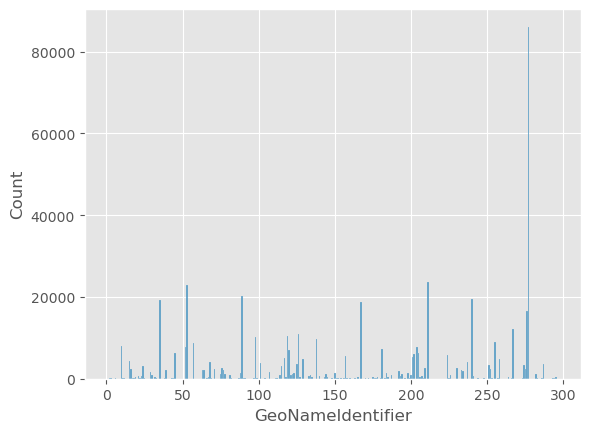

**********************************************************************************************************************


In [ ]:
analisis_categoricas('GeoNameIdentifier')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.16 LocaleEnglishNameIdentifier <a class="anchor" id="LocaleEnglishNameIdentifier"></a>

In [ ]:
df.columns[15]

'LocaleEnglishNameIdentifier'

In [ ]:
df.LocaleEnglishNameIdentifier.value_counts()

75     117818
182     25187
42      23007
74      22894
88      20988
233     19225
171     19027
227     18427
251     11889
124     10843
103     10035
134      9700
64       9526
46       8994
218      8676
214      7782
217      7686
170      7680
56       6809
172      6270
70       5873
68       5157
231      5110
60       5044
115      4953
126      4776
58       4638
16       4494
51       4107
72       4064
107      3315
262      3072
239      3030
118      2932
113      2811
44       2526
222      2515
102      2387
71       2375
52       2177
246      2065
210      2048
219      1830
162      1664
224      1663
55       1661
34       1594
106      1563
211      1550
215      1537
49       1514
69       1448
81       1393
253      1391
83       1305
229      1291
66       1267
80       1232
179      1212
266      1160
277      1131
223      1096
7         995
236       910
221       893
225       884
140       860
230       807
216       790
226       772
8         640
77    

In [ ]:
df.LocaleEnglishNameIdentifier.nunique()

233

In [ ]:
df['LocaleEnglishNameIdentifier'] = df['LocaleEnglishNameIdentifier'].astype('category')

**********************************************************************************************************************
Variable: LocaleEnglishNameIdentifier
Nan 0
Unique : 233
Valores:  [172, 124, 56, 75, 42, ..., 98, 176, 28, 245, 127]
Length: 233
Categories (233, int64): [1, 2, 3, 4, ..., 278, 280, 282, 283]
75     117818
182     25187
42      23007
74      22894
88      20988
233     19225
171     19027
227     18427
251     11889
124     10843
103     10035
134      9700
64       9526
46       8994
218      8676
214      7782
217      7686
170      7680
56       6809
172      6270
70       5873
68       5157
231      5110
60       5044
115      4953
126      4776
58       4638
16       4494
51       4107
72       4064
107      3315
262      3072
239      3030
118      2932
113      2811
44       2526
222      2515
102      2387
71       2375
52       2177
246      2065
210      2048
219      1830
162      1664
224      1663
55       1661
34       1594
106      1563
211      1550
21

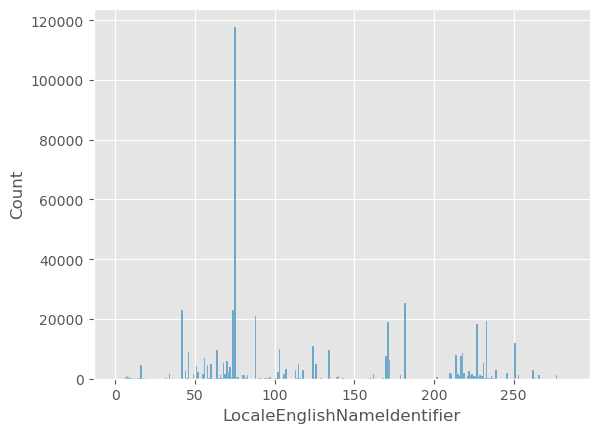

**********************************************************************************************************************


In [ ]:
analisis_categoricas('LocaleEnglishNameIdentifier')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


In [ ]:
df_comentarios

Variable  \
0             MachineIdentifier   
1                   ProductName   
2                 EngineVersion   
3                    AppVersion   
4                  AvSigVersion   
5                        IsBeta   
6              RtpStateBitfield   
7              IsSxsPassiveMode   
8     AVProductStatesIdentifier   
9           AVProductsInstalled   
10            AVProductsEnabled   
11                       HasTpm   
12            CountryIdentifier   
13               CityIdentifier   
14            GeoNameIdentifier   
15  LocaleEnglishNameIdentifier   

                                          Comentarios Eliminar  
0                        Valor único por observación.        1  
1             99 % de observaciones en un solo valor.        1  
2   Se concentran la mayoria de observaciones en d...        0  
3   el 60% de las observaciones tienen un unico va...        0  
4   Esta variable tiene 6455 valores distintos. El...        1  
5                    Solo tiene una observación en 1.        1  
6   El 96% de las observaciones hacen referencia a...        1  
7                  98% observaciones en un solo valor        1  
8   El 65 de las observaciones tienen el mismo val...        0  
9   Nos quedaremos con los tres primeros valores y...        0  
10  Tiene una concentración del 97% de observacion...        1  
11  98% de las observaciones apuntan a un único valor        1  
12  Tiene mucha dispersión. nos quedamos con los 1...        0  
13  Tiene demasiada dispersion. El valor que mas s...        1  
14  Nos quedamos con los valores que tienen mas de...        0  
15  Nos quedamos con los valores que tienen mas de...        0

#### 2.1.8.16 Platform <a class="anchor" id="Platform"></a>

In [ ]:
df.columns[16]

'Platform'

In [ ]:
df.Platform.value_counts()

windows10      483048
windows8        10825
windows7         5314
windows2016       813
Name: Platform, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.17 Processor <a class="anchor" id="Processor"></a>

In [ ]:
df.columns[17]

'Processor'

In [ ]:
df.Processor.value_counts()

x64      454423
x86       45563
arm64        14
Name: Processor, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.18 OsVer <a class="anchor" id="OsVer"></a>

In [ ]:
df.columns[18]

'OsVer'

In [ ]:
df.OsVer.value_counts()

10.0.0.0      483830
6.3.0.0        10818
6.1.1.0         5281
6.1.0.0           33
10.0.3.0          12
10.0.1.0           7
6.3.3.0            2
10.0.0.1           2
6.3.1.0            2
10.0.32.72         2
10.0.32.0          1
10.0.80.0          1
10.0.5.0           1
10.0.2.0           1
6.3.5.0            1
10.0.4.0           1
10.0.8.0           1
10.0.0.112         1
6.3.32.72          1
6.3.7.0            1
10.0.7.0           1
Name: OsVer, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.19 OsBuild <a class="anchor" id="OsBuild"></a>

In [ ]:
df.columns[19]

'OsBuild'

In [ ]:
df.OsBuild.value_counts()

17134    220779
16299    139901
15063     43352
14393     40717
10586     22955
10240     15014
9600      10825
7601       5281
17692       155
17738       134
17744       129
17758        86
17746        62
17713        60
17754        56
17751        53
17741        51
17755        45
17735        37
17686        36
17733        34
17763        33
7600         33
17760        31
17682        20
17677        17
18234        16
17672        15
18242        12
18237        12
17661         9
17666         8
17723         4
17634         4
17639         3
17730         3
17618         3
17747         3
17655         2
17650         2
17753         1
17604         1
18214         1
17711         1
17704         1
18219         1
17623         1
17749         1
Name: OsBuild, dtype: int64

In [ ]:
df.OsBuild.nunique()

48

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.20 OsSuite <a class="anchor" id="OsSuite"></a>

In [ ]:
df.columns[20]

'OsSuite'

In [ ]:
df.OsSuite.value_counts()

768    311226
256    187951
272       677
16         53
400        47
305        33
784        10
274         2
18          1
Name: OsSuite, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.21 OsPlatformSubRelease <a class="anchor" id="OsPlatformSubRelease"></a>

In [ ]:
df.columns[21]

'OsPlatformSubRelease'

In [ ]:
df.OsPlatformSubRelease.value_counts()

rs4           220779
rs3           139901
rs2            43352
rs1            40717
th2            22955
th1            15014
windows8.1     10825
windows7        5314
prers5          1143
Name: OsPlatformSubRelease, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.22 OsBuildLab <a class="anchor" id="OsBuildLab"></a>

In [ ]:
df.columns[22]

'OsBuildLab'

In [ ]:
df.OsBuildLab.value_counts()

17134.1.amd64fre.rs4_release.180410-1804                    206436
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908        69884
16299.15.amd64fre.rs3_release.170928-1534                    53826
15063.0.amd64fre.rs2_release.170317-1834                     39908
17134.1.x86fre.rs4_release.180410-1804                       14334
16299.15.x86fre.rs3_release.170928-1534                      13105
14393.2189.amd64fre.rs1_release.180329-1711                  10724
10240.17443.amd64fre.th1.170602-2340                          9538
10586.1176.amd64fre.th2_release_sec.170913-1848               8385
15063.0.x86fre.rs2_release.170317-1834                        3444
14393.0.amd64fre.rs1_release.160715-1616                      3239
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033           3160
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800           3139
16299.637.amd64fre.rs3_release_svc.180808-1748                2439
14393.2189.x86fre.rs1_release.180329-1711                     

In [ ]:
df.OsBuildLab.nunique()

453

In [ ]:
df.OsBuildLab.isna().sum()

1

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.23 SkuEdition <a class="anchor" id="SkuEdition"></a>

In [ ]:
df.columns[23]

'SkuEdition'

In [ ]:
df.SkuEdition.value_counts()

Home               308567
Pro                181042
Invalid              4423
Education            2321
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: SkuEdition, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.24 IsProtected <a class="anchor" id="IsProtected"></a>

In [ ]:
df.columns[24]

'IsProtected'

In [ ]:
df.IsProtected.value_counts()

1.00    471073
0.00     27001
Name: IsProtected, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.25 AutoSampleOptIn <a class="anchor" id="AutoSampleOptIn"></a>

In [ ]:
df.columns[25]

'AutoSampleOptIn'

In [ ]:
df.AutoSampleOptIn.value_counts()

0    499986
1        14
Name: AutoSampleOptIn, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.26 SMode <a class="anchor" id="SMode"></a>

In [ ]:
df.columns[26]

'SMode'

In [ ]:
df.SMode.value_counts()

0.00    469946
1.00       206
Name: SMode, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.27 IeVerIdentifier <a class="anchor" id="IeVerIdentifier"></a>

In [ ]:
df.columns[27]

'IeVerIdentifier'

In [ ]:
df.IeVerIdentifier.value_counts()

137.00    219142
117.00     98667
108.00     26353
111.00     26143
98.00      19731
135.00     12314
74.00      11395
53.00      11352
94.00       9715
105.00      9695
333.00      8751
107.00      7080
103.00      6364
96.00       4695
76.00       3242
71.00       2275
41.00       1918
114.00      1862
323.00      1814
335.00      1422
334.00      1356
87.00        936
81.00        809
78.00        655
73.00        615
82.00        571
337.00       540
42.00        502
302.00       413
85.00        399
84.00        355
91.00        310
72.00        263
92.00        262
68.00        258
86.00        258
332.00       254
88.00        246
90.00        228
44.00        181
327.00       150
163.00       135
180.00       131
295.00       128
185.00       126
331.00       107
325.00       106
64.00        103
49.00         92
65.00         84
199.00        83
45.00         77
288.00        77
52.00         73
322.00        71
307.00        68
311.00        63
186.00        62
169.00        

In [ ]:
df.IeVerIdentifier.isna().sum()

3209

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.28 Firewall <a class="anchor" id="Firewall"></a>

In [ ]:
df.columns[28]

'Firewall'

In [ ]:
df.Firewall.value_counts()

1.00    484071
0.00     10767
Name: Firewall, dtype: int64

1.00    484071
0.00     10767
Name: Firewall, dtype: int64


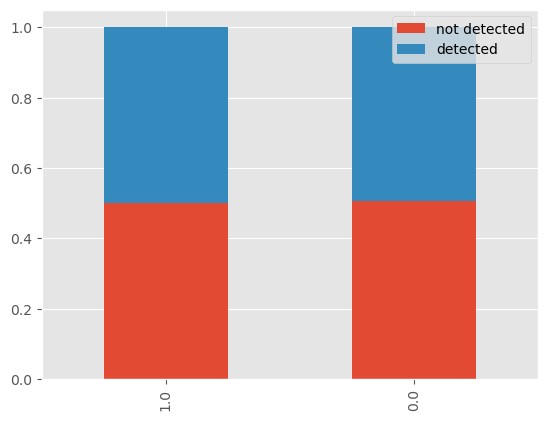

In [ ]:
plot_normalized_stacked_bar('Firewall')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.29 UacLuaenable <a class="anchor" id="UacLuaenable"></a>

In [ ]:
df.columns[29]

'UacLuaenable'

In [ ]:
df.UacLuaenable.value_counts()

1.00            496276
0.00              3086
48.00               13
2.00                 1
6,357,062.00         1
Name: UacLuaenable, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.30 Census_MDC2FormFactor <a class="anchor" id="Census_MDC2FormFactor"></a>

In [ ]:
df.columns[30]

'Census_MDC2FormFactor'

In [ ]:
df.Census_MDC2FormFactor.value_counts()

Notebook        320948
Desktop         109527
Convertible      22369
Detachable       16802
AllInOne         16372
PCOther           7800
LargeTablet       3645
SmallTablet       1797
SmallServer        496
MediumServer       192
LargeServer         50
ServerOther          2
Name: Census_MDC2FormFactor, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.31 Census_DeviceFamily <a class="anchor" id="Census_DeviceFamily"></a>

In [ ]:
df.columns[31]

'Census_DeviceFamily'

In [ ]:
df.Census_DeviceFamily.value_counts()

Windows.Desktop    499183
Windows.Server        816
Windows                 1
Name: Census_DeviceFamily, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.32 Census_OEMNameIdentifier <a class="anchor" id="Census_OEMNameIdentifier"></a>

In [ ]:
df.columns[32]

'Census_OEMNameIdentifier'

In [ ]:
df.Census_OEMNameIdentifier.value_counts()

2,668.00    72011
2,102.00    57924
1,443.00    53210
2,206.00    51888
585.00      50304
            ...  
3,997.00        1
3,546.00        1
4,037.00        1
2,429.00        1
1,900.00        1
Name: Census_OEMNameIdentifier, Length: 1589, dtype: int64

In [ ]:
df.Census_OEMNameIdentifier.nunique()

1589

In [ ]:
df.Census_OEMNameIdentifier.isna().sum()

5381

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.33 Census_OEMModelIdentifier <a class="anchor" id="Census_OEMModelIdentifier"></a>

In [ ]:
df.columns[33]

'Census_OEMModelIdentifier'

In [ ]:
df.Census_OEMModelIdentifier.value_counts()

313,586.00    17092
242,491.00    14726
317,701.00     7676
317,708.00     6541
228,975.00     4389
              ...  
1,917.00          1
318,232.00        1
342,796.00        1
8,067.00          1
35,038.00         1
Name: Census_OEMModelIdentifier, Length: 40697, dtype: int64

In [ ]:
df.Census_OEMModelIdentifier.nunique()

40697

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.34 Census_ProcessorCoreCount <a class="anchor" id="Census_ProcessorCoreCount"></a>

In [ ]:
df.columns[34]

'Census_ProcessorCoreCount'

In [ ]:
df.Census_ProcessorCoreCount.value_counts()

4.00     304102
2.00     129178
8.00      48995
12.00      5184
6.00       4023
1.00       3980
16.00      1006
3.00        752
32.00       113
20.00        97
24.00        95
40.00        39
28.00        17
36.00        16
48.00        15
5.00         10
10.00        10
56.00         8
7.00          3
11.00         2
64.00         2
52.00         1
44.00         1
88.00         1
80.00         1
14.00         1
46.00         1
Name: Census_ProcessorCoreCount, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.35 Census_ProcessorManufacturerIdentifier <a class="anchor" id="Census_ProcessorManufacturerIdentifier"></a>

In [ ]:
df.columns[35]

'Census_ProcessorManufacturerIdentifier'

In [ ]:
df.Census_ProcessorManufacturerIdentifier.value_counts()

5.00     439028
1.00      58604
10.00        14
3.00          7
Name: Census_ProcessorManufacturerIdentifier, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.36 Census_ProcessorModelIdentifier <a class="anchor" id="Census_ProcessorModelIdentifier"></a>

In [ ]:
df.columns[36]

'Census_ProcessorModelIdentifier'

In [ ]:
df.Census_ProcessorModelIdentifier.value_counts()

2,697.00    16180
1,998.00    14874
2,660.00    10736
2,373.00     9885
1,992.00     9502
            ...  
4,091.00        1
1,328.00        1
1,852.00        1
3,130.00        1
4,027.00        1
Name: Census_ProcessorModelIdentifier, Length: 2243, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.37 Census_PrimaryDiskTotalCapacity <a class="anchor" id="Census_PrimaryDiskTotalCapacity"></a>

In [ ]:
df.columns[37]

'Census_PrimaryDiskTotalCapacity'

In [ ]:
df.Census_PrimaryDiskTypeName.value_counts()

HDD            325429
SSD            138155
UNKNOWN         20083
Unspecified     15624
Name: Census_PrimaryDiskTypeName, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


In [ ]:
df.Census_PrimaryDiskTotalCapacity.value_counts()

476,940.00    158683
953,869.00    122183
305,245.00     26687
122,104.00     26444
244,198.00     25159
               ...  
948,333.00         1
20,646.00          1
122,069.00         1
190,652.00         1
152,499.00         1
Name: Census_PrimaryDiskTotalCapacity, Length: 1103, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.39 Census_SystemVolumeTotalCapacity <a class="anchor" id="Census_SystemVolumeTotalCapacity"></a>

In [ ]:
df.columns[39]

'Census_SystemVolumeTotalCapacity'

In [ ]:
df.Census_SystemVolumeTotalCapacity.value_counts()

28,542.00     2922
926,992.00    2866
476,389.00    2380
476,324.00    2306
102,400.00    2303
              ... 
221,517.00       1
580,181.00       1
127,615.00       1
236,484.00       1
470,309.00       1
Name: Census_SystemVolumeTotalCapacity, Length: 142051, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.40 Census_HasOpticalDiskDrive <a class="anchor" id="Census_HasOpticalDiskDrive"></a>

In [ ]:
df.columns[40]

'Census_HasOpticalDiskDrive'

In [ ]:
df.Census_HasOpticalDiskDrive.value_counts()

0    461483
1     38517
Name: Census_HasOpticalDiskDrive, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.41 Census_TotalPhysicalRAM <a class="anchor" id="Census_TotalPhysicalRAM"></a>

In [ ]:
df.columns[41]

'Census_TotalPhysicalRAM'

In [ ]:
df.Census_TotalPhysicalRAM.value_counts()

4,096.00     228678
8,192.00     123174
2,048.00      61694
16,384.00     30179
6,144.00      22349
              ...  
12,963.00         1
5,791.00          1
4,124.00          1
5,039.00          1
4,120.00          1
Name: Census_TotalPhysicalRAM, Length: 552, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.42 Census_ChassisTypeName <a class="anchor" id="Census_ChassisTypeName"></a>

In [ ]:
df.columns[42]

'Census_ChassisTypeName'

In [ ]:
df.Census_ChassisTypeName.value_counts()

Notebook               294232
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32                          1
ExpansionChassis            1
25        

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.43 Census_InternalPrimaryDiagonalDisplaySizeInInches <a class="anchor" id="Census_InternalPrimaryDiagonalDisplaySizeInInches"></a>

In [ ]:
df.columns[43]

'Census_InternalPrimaryDiagonalDisplaySizeInInches'

In [ ]:
df.Census_InternalPrimaryDiagonalDisplaySizeInInches.value_counts()

15.50    171319
13.90     52873
14.00     30492
11.60     17592
21.50     15441
          ...  
32.50         1
85.80         1
49.10         1
60.20         1
95.40         1
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, Length: 520, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.44 Census_InternalPrimaryDisplayResolutionHorizontal <a class="anchor" id="Census_InternalPrimaryDisplayResolutionHorizontal"></a>

In [ ]:
df.columns[44]

'Census_InternalPrimaryDisplayResolutionHorizontal'

In [ ]:
df.Census_InternalPrimaryDisplayResolutionHorizontal.value_counts()

1,366.00     251999
1,920.00     125095
1,280.00      29690
1,600.00      28231
1,024.00      19327
1,440.00       9441
1,360.00       7058
1,680.00       6234
2,560.00       3989
2,736.00       3159
3,840.00       2479
800.00         1784
2,160.00       1760
3,200.00        978
3,000.00        606
2,880.00        557
1,368.00        480
640.00          464
1,152.00        433
2,048.00        308
2,256.00        300
3,440.00        284
1,400.00        261
1,200.00        211
1,080.00        195
768.00          178
1,768.00        112
4,096.00        106
1,824.00         95
5,120.00         95
2,304.00         94
1,800.00         93
1,776.00         82
3,240.00         82
3,360.00         70
1,536.00         67
600.00           53
1,842.00         50
1,364.00         37
4,500.00         34
1,916.00         29
900.00           21
1,050.00         19
1,176.00         19
5,760.00         18
1,716.00         17
1,862.00         16
720.00           13
1,792.00         11
1,804.00         11


In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.45 Census_InternalPrimaryDisplayResolutionVertical <a class="anchor" id="Census_InternalPrimaryDisplayResolutionVertical"></a>

In [ ]:
df.columns[45]

'Census_InternalPrimaryDisplayResolutionVertical'

In [ ]:
df.Census_InternalPrimaryDisplayResolutionVertical.value_counts()

768.00      277762
1,080.00    121145
900.00       36912
800.00       14687
1,024.00     10603
             ...  
1,960.00         1
1,295.00         1
2,286.00         1
880.00           1
1,612.00         1
Name: Census_InternalPrimaryDisplayResolutionVertical, Length: 514, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.46 Census_PowerPlatformRoleName <a class="anchor" id="Census_PowerPlatformRoleName"></a>

In [ ]:
df.columns[46]

'Census_PowerPlatformRoleName'

In [ ]:
df.Census_PowerPlatformRoleName.value_counts()

Mobile               346378
Desktop              116054
Slate                 27475
Workstation            6235
SOHOServer             2062
UNKNOWN                1172
EnterpriseServer        406
AppliancePC             212
PerformanceServer         4
Name: Census_PowerPlatformRoleName, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.47 Census_InternalBatteryNumberOfCharges <a class="anchor" id="Census_InternalBatteryNumberOfCharges"></a>

In [ ]:
df.columns[47]

'Census_InternalBatteryNumberOfCharges'

In [ ]:
df.Census_InternalBatteryNumberOfCharges.value_counts()

0.00                283189
4,294,967,295.00    126436
1.00                  2955
16.00                 1517
2.00                  1503
                     ...  
8,331.00                 1
57,727.00                1
1,030.00                 1
43,544.00                1
1,900.00                 1
Name: Census_InternalBatteryNumberOfCharges, Length: 5248, dtype: int64

0.00                283189
4,294,967,295.00    126436
Name: Census_InternalBatteryNumberOfCharges, dtype: int64


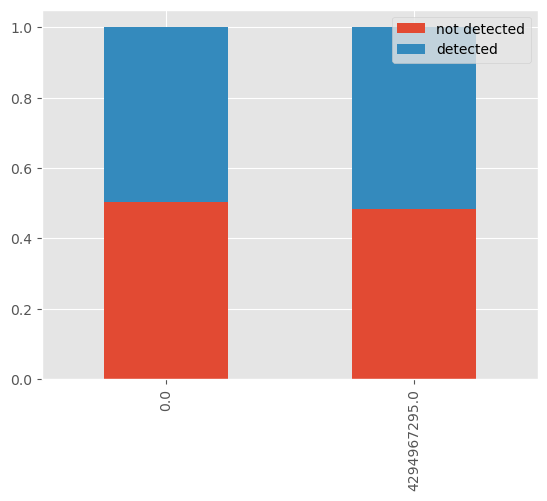

In [ ]:
plot_normalized_stacked_bar('Census_InternalBatteryNumberOfCharges')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.48 Census_OSVersion <a class="anchor" id="Census_OSVersion"></a>

In [ ]:
df.columns[48]

'Census_OSVersion'

In [ ]:
df.Census_OSVersion.value_counts()

10.0.17134.228      79975
10.0.17134.165      50511
10.0.16299.431      30519
10.0.17134.285      26289
10.0.17134.112      19501
10.0.16299.547      19179
10.0.16299.371      18195
10.0.17134.191      12990
10.0.14393.2189     12409
10.0.16299.611      12267
10.0.16299.125      12038
10.0.10240.17443    11476
10.0.10586.1176     10235
10.0.16299.492       9467
10.0.16299.309       8293
10.0.17134.286       7840
10.0.16299.15        6717
10.0.17134.254       6292
10.0.15063.1206      5700
10.0.17134.1         5678
10.0.15063.1266      5642
10.0.16299.192       5563
10.0.17134.167       4842
10.0.17134.137       4420
10.0.16299.248       4282
10.0.17134.48        3808
10.0.15063.0         3619
10.0.15063.1088      3535
10.0.14393.0         3311
10.0.17134.81        3044
10.0.14393.693       2801
10.0.15063.1155      2565
10.0.10586.164       2322
10.0.10586.318       2257
10.0.10586.0         2242
10.0.14393.2214      2183
10.0.15063.786       2139
10.0.16299.665       2118
10.0.15063.6

10.0.17134.228      79975
10.0.17134.165      50511
10.0.16299.431      30519
10.0.17134.285      26289
10.0.17134.112      19501
10.0.16299.547      19179
10.0.16299.371      18195
10.0.17134.191      12990
10.0.14393.2189     12409
10.0.16299.611      12267
10.0.16299.125      12038
10.0.10240.17443    11476
10.0.10586.1176     10235
Name: Census_OSVersion, dtype: int64


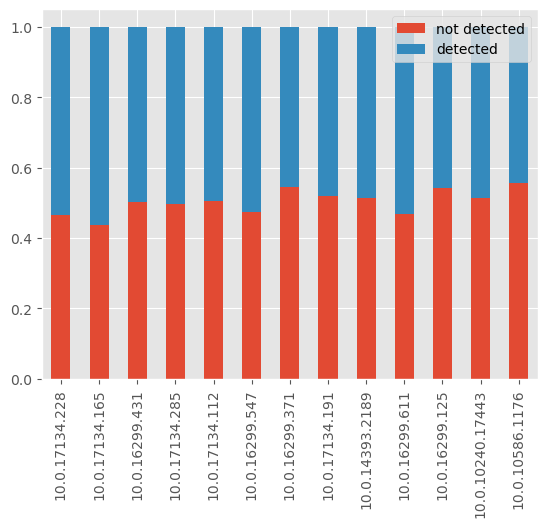

In [ ]:
plot_normalized_stacked_bar('Census_OSVersion')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.49 Census_OSArchitecture <a class="anchor" id="Census_OSArchitecture"></a>

In [ ]:
df.columns[49]

'Census_OSArchitecture'

In [ ]:
df.Census_OSArchitecture.value_counts()

amd64    454435
x86       45551
arm64        14
Name: Census_OSArchitecture, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.50 Census_OSBranch <a class="anchor" id="Census_OSBranch"></a>

In [ ]:
df.columns[50]

'Census_OSBranch'

In [ ]:
df.Census_OSBranch.value_counts()

rs4_release                  226001
rs3_release                   69216
rs3_release_svc_escrow        67027
rs2_release                   44264
rs1_release                   43705
th2_release                   18298
th2_release_sec               14895
th1_st1                       10822
th1                            4284
rs5_release                     839
rs3_release_svc_escrow_im       329
rs_prerelease                   184
rs_prerelease_flt               132
rs5_release_sigma                 3
winblue_ltsb_escrow               1
Name: Census_OSBranch, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.51 Census_OSBuildNumber <a class="anchor" id="Census_OSBuildNumber"></a>

In [ ]:
df.columns[51]

'Census_OSBuildNumber'

In [ ]:
df.Census_OSBuildNumber.value_counts()

17134    225979
16299    136572
15063     44262
14393     43702
10586     33193
10240     15106
17738       165
17692       146
17744       135
17758        99
17746        65
17754        59
17763        59
17751        54
17741        45
17755        40
17735        39
17733        35
17686        34
17760        31
17133        21
17682        20
17677        17
17672        15
18237        14
18234        14
18242        13
17661         9
17713         8
17666         7
17634         4
17639         3
17747         3
17730         2
17655         2
14986         2
17650         2
17046         1
17004         1
14295         1
18219         1
17623         1
17749         1
14421         1
14971         1
17723         1
16193         1
14926         1
17604         1
17618         1
11082         1
14328         1
15019         1
18214         1
16251         1
14946         1
9600          1
17074         1
17753         1
15042         1
15048         1
Name: Census_OSBuildNumb

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.52 Census_OSBuildRevision <a class="anchor" id="Census_OSBuildRevision"></a>

In [ ]:
df.columns[52]

'Census_OSBuildRevision'

In [ ]:
df.Census_OSBuildRevision.value_counts()

228      79975
165      50511
431      30519
285      26289
112      19503
547      19179
371      18195
191      12991
2189     12409
611      12267
125      12038
17443    11476
1176     10235
492       9467
0         9175
309       8293
286       7840
15        6717
254       6292
1         5999
1206      5700
1266      5642
192       5562
167       4842
137       4420
248       4282
48        3808
1088      3535
81        3044
693       2801
1155      2565
164       2322
318       2257
2214      2183
786       2139
665       2118
674       1961
1324      1908
494       1807
447       1778
726       1773
850       1756
483       1660
1593      1543
2007      1506
420       1500
16384     1499
608       1421
1198      1419
1944      1396
540       1388
545       1383
1029      1367
1770      1303
909       1299
104       1296
1358      1175
1066      1162
966       1117
218       1116
250       1082
1106      1061
1480      1025
2068      1022
953        988
579        973
98        

228      79975
165      50511
431      30519
285      26289
112      19503
547      19179
371      18195
191      12991
2189     12409
611      12267
125      12038
17443    11476
1176     10235
Name: Census_OSBuildRevision, dtype: int64


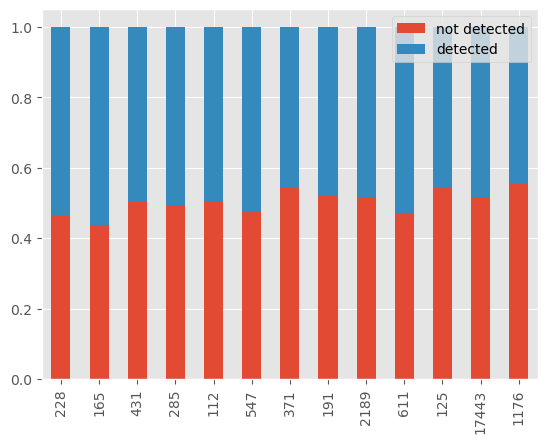

In [ ]:
plot_normalized_stacked_bar('Census_OSBuildRevision')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.53 Census_OSEdition <a class="anchor" id="Census_OSEdition"></a>

In [ ]:
df.columns[53]

'Census_OSEdition'

In [ ]:
df.Census_OSEdition.value_counts()

Core                        194469
Professional                175808
CoreSingleLanguage          108696
CoreCountrySpecific           9275
ProfessionalEducation         3100
Education                     2310
Enterprise                    2055
ProfessionalN                 1624
EnterpriseS                   1108
ServerStandard                 584
Cloud                          336
CoreN                          251
ServerStandardEval             151
EducationN                      61
ServerDatacenterEval            47
EnterpriseSN                    47
ServerSolution                  34
EnterpriseN                     28
ProfessionalEducationN          12
ProfessionalWorkstation          2
CloudN                           1
ProfessionalWorkstationN         1
Name: Census_OSEdition, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.54 Census_OSSkuName <a class="anchor" id="Census_OSSkuName"></a>

In [ ]:
df.columns[54]

'Census_OSSkuName'

In [ ]:
df.Census_OSSkuName.value_counts()

CORE                            194464
PROFESSIONAL                    178947
CORE_SINGLELANGUAGE             108674
CORE_COUNTRYSPECIFIC              9257
EDUCATION                         2313
ENTERPRISE                        2063
PROFESSIONAL_N                    1634
ENTERPRISE_S                      1107
STANDARD_SERVER                    584
CLOUD                              332
CORE_N                             251
STANDARD_EVALUATION_SERVER         151
EDUCATION_N                         61
ENTERPRISE_S_N                      48
DATACENTER_EVALUATION_SERVER        47
SB_SOLUTION_SERVER                  34
ENTERPRISE_N                        28
PRO_WORKSTATION                      2
CLOUDN                               1
PRO_WORKSTATION_N                    1
UNLICENSED                           1
Name: Census_OSSkuName, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.55 Census_OSInstallTypeName <a class="anchor" id="Census_OSInstallTypeName"></a>

In [ ]:
df.columns[55]

'Census_OSInstallTypeName'

In [ ]:
df.Census_OSInstallTypeName.value_counts()

UUPUpgrade        146780
IBSClean           92403
Update             88892
Upgrade            70013
Other              46960
Reset              36510
Refresh            11540
Clean               3885
CleanPCRefresh      3017
Name: Census_OSInstallTypeName, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.56 Census_OSInstallLanguageIdentifier <a class="anchor" id="Census_OSInstallLanguageIdentifier"></a>

In [ ]:
df.columns[56]

'Census_OSInstallLanguageIdentifier'

In [ ]:
df.Census_OSInstallLanguageIdentifier.value_counts()

8.00     178405
9.00      58013
7.00      28766
29.00     27669
14.00     24191
37.00     22635
10.00     20268
26.00     18520
5.00      14085
35.00     11497
39.00     11221
18.00     10600
20.00      9512
24.00      8127
25.00      7502
27.00      5956
19.00      4775
17.00      4695
1.00       4516
3.00       4067
6.00       2881
33.00      2807
15.00      2311
4.00       1996
30.00      1793
23.00      1652
31.00      1213
12.00      1119
2.00       1096
36.00       846
16.00       837
28.00       713
34.00       584
13.00       581
21.00       413
32.00       246
11.00       197
38.00       185
22.00       178
Name: Census_OSInstallLanguageIdentifier, dtype: int64

In [ ]:
df.Census_OSInstallLanguageIdentifier.nunique()

39

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.57 Census_OSUILocaleIdentifier <a class="anchor" id="Census_OSUILocaleIdentifier"></a>

In [ ]:
df.columns[57]

'Census_OSUILocaleIdentifier'

In [ ]:
df.Census_OSUILocaleIdentifier.value_counts()

31     177983
34      58307
30      28798
125     28001
49      24423
158     22930
35      20890
119     18696
26      14096
148     11617
160     11244
72      10662
83       9596
109      8143
115      7496
120      5993
74       4791
64       4747
5        4599
20       4087
28       2895
140      2815
58       2339
24       2004
128      1808
105      1654
130      1246
11       1120
44       1118
151       863
62        857
123       718
48        597
145       589
90        432
156       421
68        259
136       256
38        206
159       195
92        188
17        126
42         17
15         15
32         15
126        13
54         11
161        10
59          9
36          7
12          6
131         5
93          5
63          5
37          5
152         4
162         4
116         4
65          4
121         4
27          3
91          3
7           3
29          3
146         3
122         2
95          2
75          2
73          2
110         2
149         2
76    

In [ ]:
df.Census_OSUILocaleIdentifier.nunique()

92

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.58 Census_OSWUAutoUpdateOptionsName <a class="anchor" id="Census_OSWUAutoUpdateOptionsName"></a>

In [ ]:
df.columns[58]

'Census_OSWUAutoUpdateOptionsName'

In [ ]:
df.Census_OSWUAutoUpdateOptionsName.value_counts()

FullAuto                                 222482
UNKNOWN                                  140961
Notify                                   113507
AutoInstallAndRebootAtMaintenanceTime     20731
Off                                        1506
DownloadNotify                              813
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.59 Census_IsPortableOperatingSystem <a class="anchor" id="Census_IsPortableOperatingSystem"></a>

In [ ]:
df.columns[59]

'Census_IsPortableOperatingSystem'

In [ ]:
df.Census_IsPortableOperatingSystem.value_counts()

0    499739
1       261
Name: Census_IsPortableOperatingSystem, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.60 Census_GenuineStateName <a class="anchor" id="Census_GenuineStateName"></a>

In [ ]:
df.columns[60]

'Census_GenuineStateName'

In [ ]:
df.Census_GenuineStateName.value_counts()

IS_GENUINE         441402
INVALID_LICENSE     44990
OFFLINE             12834
UNKNOWN               774
Name: Census_GenuineStateName, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.61 Census_ActivationChannel <a class="anchor" id="Census_ActivationChannel"></a>

In [ ]:
df.columns[61]

'Census_ActivationChannel'

In [ ]:
df.Census_ActivationChannel.value_counts()

Retail            264932
OEM:DM            191350
Volume:GVLK        25109
OEM:NONSLP         17943
Volume:MAK           468
Retail:TB:Eval       198
Name: Census_ActivationChannel, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.62 Census_IsFlightsDisabled <a class="anchor" id="Census_IsFlightsDisabled"></a>

In [ ]:
df.columns[62]

'Census_IsFlightsDisabled'

In [ ]:
df.Census_IsFlightsDisabled.value_counts()

0.00    491060
1.00         7
Name: Census_IsFlightsDisabled, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.63 Census_FlightRing <a class="anchor" id="Census_FlightRing"></a>

In [ ]:
df.columns[63]

'Census_FlightRing'

In [ ]:
df.Census_FlightRing.value_counts()

Retail      468299
NOT_SET      16044
Unknown      13701
WIS            606
RP             583
WIF            549
Disabled       217
OSG              1
Name: Census_FlightRing, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.64 Census_FirmwareManufacturerIdentifier <a class="anchor" id="Census_FirmwareManufacturerIdentifier"></a>

In [ ]:
df.columns[64]

'Census_FirmwareManufacturerIdentifier'

In [ ]:
df.Census_FirmwareManufacturerIdentifier.value_counts()

142.00      151374
628.00       68781
554.00       65673
355.00       52758
556.00       44919
500.00       21686
93.00        10666
807.00        8803
513.00        7899
127.00        6933
486.00        6060
897.00        6001
512.00        5303
677.00        4656
168.00        4603
803.00        3321
644.00        2756
559.00        2575
444.00        1666
809.00        1369
152.00        1342
134.00        1105
781.00         839
440.00         782
691.00         663
789.00         560
105.00         506
798.00         484
442.00         329
633.00         305
491.00         287
299.00         286
1,075.00       283
361.00         258
106.00         247
465.00         245
360.00         232
845.00         165
446.00         140
1,030.00       128
560.00         124
819.00         123
869.00         117
827.00         104
639.00         104
820.00          96
831.00          84
839.00          79
311.00          69
196.00          62
369.00          60
1,080.00        54
1,014.00    

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.65 Census_FirmwareVersionIdentifier <a class="anchor" id="Census_FirmwareVersionIdentifier"></a>

In [ ]:
df.columns[65]

'Census_FirmwareVersionIdentifier'

In [ ]:
df.Census_FirmwareVersionIdentifier.value_counts()

33,105.00    5036
33,111.00    3356
33,054.00    3124
33,108.00    3071
63,175.00    2968
             ... 
41,482.00       1
41,752.00       1
20,762.00       1
15,577.00       1
54,497.00       1
Name: Census_FirmwareVersionIdentifier, Length: 23569, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.66 Census_IsSecureBootEnabled <a class="anchor" id="Census_IsSecureBootEnabled"></a>

In [ ]:
df.columns[66]

'Census_IsSecureBootEnabled'

In [ ]:
df.Census_IsSecureBootEnabled.value_counts()

0    257281
1    242719
Name: Census_IsSecureBootEnabled, dtype: int64

0    257281
1    242719
Name: Census_IsSecureBootEnabled, dtype: int64


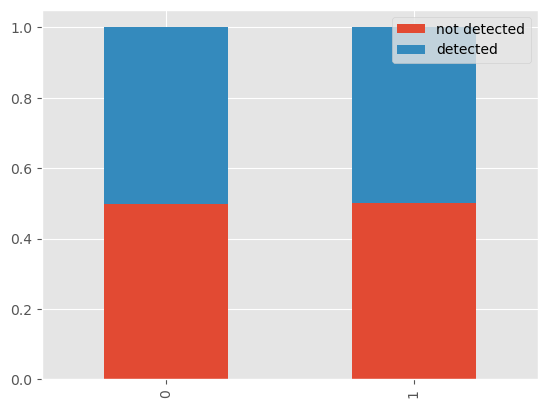

In [ ]:
plot_normalized_stacked_bar('Census_IsSecureBootEnabled')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.67 Census_IsVirtualDevice <a class="anchor" id="Census_IsVirtualDevice"></a>

In [ ]:
df.columns[67]

'Census_IsVirtualDevice'

In [ ]:
df.Census_IsVirtualDevice.value_counts()

0.00    495572
1.00      3527
Name: Census_IsVirtualDevice, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.68 Census_IsTouchEnabled <a class="anchor" id="Census_IsTouchEnabled"></a>

In [ ]:
df.columns[68]

'Census_IsTouchEnabled'

In [ ]:
df.Census_IsTouchEnabled.value_counts()

0    437283
1     62717
Name: Census_IsTouchEnabled, dtype: int64

0    437283
1     62717
Name: Census_IsTouchEnabled, dtype: int64


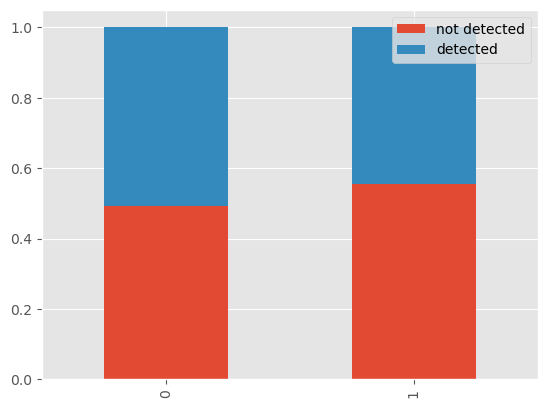

In [ ]:
plot_normalized_stacked_bar('Census_IsTouchEnabled')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.69 Census_IsPenCapable <a class="anchor" id="Census_IsPenCapable"></a>

In [ ]:
df.columns[69]

'Census_IsPenCapable'

In [ ]:
df.Census_IsPenCapable.value_counts()

0    481128
1     18872
Name: Census_IsPenCapable, dtype: int64

0    481128
1     18872
Name: Census_IsPenCapable, dtype: int64


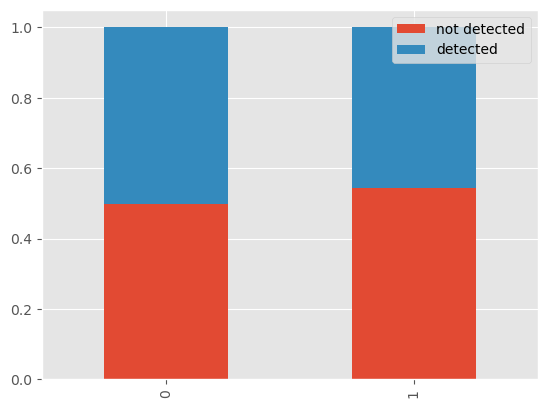

In [ ]:
plot_normalized_stacked_bar('Census_IsPenCapable')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.70 Census_IsAlwaysOnAlwaysConnectedCapable <a class="anchor" id="Census_IsAlwaysOnAlwaysConnectedCapable"></a>

In [ ]:
df.columns[70]

'Census_IsAlwaysOnAlwaysConnectedCapable'

In [ ]:
df.Census_IsAlwaysOnAlwaysConnectedCapable.value_counts()

0.00    467569
1.00     28391
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: int64

0.00    467569
1.00     28391
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: int64


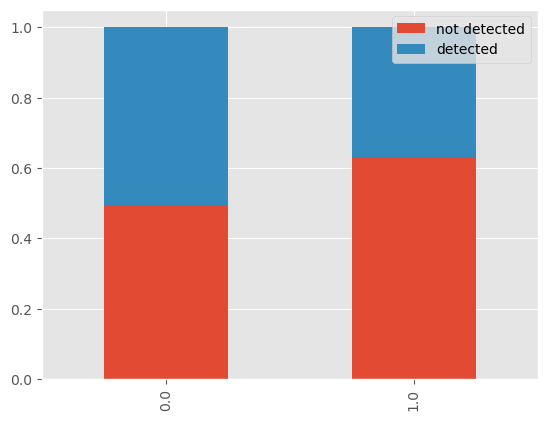

In [ ]:
plot_normalized_stacked_bar('Census_IsAlwaysOnAlwaysConnectedCapable')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.71 Wdft_IsGamer <a class="anchor" id="Wdft_IsGamer"></a>

In [ ]:
df.columns[71]

'Wdft_IsGamer'

In [ ]:
df.Wdft_IsGamer.value_counts()

0.00    345835
1.00    137215
Name: Wdft_IsGamer, dtype: int64

0.00    345835
1.00    137215
Name: Wdft_IsGamer, dtype: int64


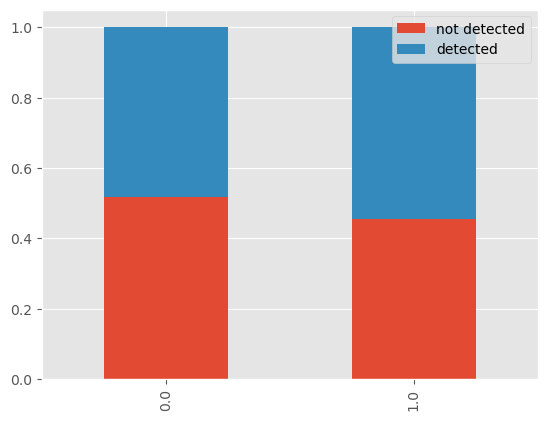

In [ ]:
plot_normalized_stacked_bar('Wdft_IsGamer')

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.72 Wdft_RegionIdentifier <a class="anchor" id="Wdft_RegionIdentifier"></a>

In [ ]:
df.columns[72]

'Wdft_RegionIdentifier'

In [ ]:
df.Wdft_RegionIdentifier.value_counts()

10.00    100392
11.00     75612
3.00      73069
1.00      68692
15.00     57346
7.00      33362
8.00      15761
13.00     12681
5.00      11466
12.00      9115
6.00       8750
4.00       7586
9.00       4521
2.00       4470
14.00       227
Name: Wdft_RegionIdentifier, dtype: int64

In [ ]:
df_comentarios = comentarios(df_comentarios)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18704\2705146905.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comentarios = df_comentarios.append(nueva_fila, ignore_index=True)


#### 2.1.8.73 guardado de comentarios para limpieza <a class="anchor" id="guardado"></a>

In [ ]:
# df_comentarios.to_csv('df_comentarios.csv')

In [23]:
df_comentarios2 = pd.read_csv('df_comentarios.csv')

In [24]:
df_comentarios2

Unnamed: 0                                           Variable  \
0            0                                  MachineIdentifier   
1            1                                        ProductName   
2            2                                      EngineVersion   
3            3                                         AppVersion   
4            4                                       AvSigVersion   
5            5                                             IsBeta   
6            6                                   RtpStateBitfield   
7            7                                   IsSxsPassiveMode   
8            8                          AVProductStatesIdentifier   
9            9                                AVProductsInstalled   
10          10                                  AVProductsEnabled   
11          11                                             HasTpm   
12          12                                  CountryIdentifier   
13          13                                     CityIdentifier   
14          14                                  GeoNameIdentifier   
15          15                        LocaleEnglishNameIdentifier   
16          16                                           Platform   
17          17                                          Processor   
18          18                                              OsVer   
19          19                                            OsBuild   
20          20                                            OsSuite   
21          21                               OsPlatformSubRelease   
22          22                                         OsBuildLab   
23          23                                         SkuEdition   
24          24                                        IsProtected   
25          25                                    AutoSampleOptIn   
26          26                                              SMode   
27          27                                    IeVerIdentifier   
28          28                                           Firewall   
29          29                                       UacLuaenable   
30          30                              Census_MDC2FormFactor   
31          31                                Census_DeviceFamily   
32          32                           Census_OEMNameIdentifier   
33          33                          Census_OEMModelIdentifier   
34          34                          Census_ProcessorCoreCount   
35          35             Census_ProcessorManufacturerIdentifier   
36          36                    Census_ProcessorModelIdentifier   
37          37                    Census_PrimaryDiskTotalCapacity   
38          38                         Census_PrimaryDiskTypeName   
39          39                   Census_SystemVolumeTotalCapacity   
40          40                         Census_HasOpticalDiskDrive   
41          41                            Census_TotalPhysicalRAM   
42          42                             Census_ChassisTypeName   
43          43  Census_InternalPrimaryDiagonalDisplaySizeInInches   
44          44  Census_InternalPrimaryDisplayResolutionHorizontal   
45          45    Census_InternalPrimaryDisplayResolutionVertical   
46          46                       Census_PowerPlatformRoleName   
47          47              Census_InternalBatteryNumberOfCharges   
48          48                                   Census_OSVersion   
49          49                              Census_OSArchitecture   
50          50                                    Census_OSBranch   
51          51                               Census_OSBuildNumber   
52          52                             Census_OSBuildRevision   
53          53                                   Census_OSEdition   
54          54                                   Census_OSSkuName   
55          55                           Census_OSInstallTypeName   
56          56                 Census_OSInstallLanguageIdentifier   
57

#### 2.1.8.73 eliminacion variables descartadas <a class="anchor" id="eliminar"></a>

In [25]:
variables_para_el_modelo=list(df_comentarios2[df_comentarios2['Eliminar']!=1]['Variable'])

In [26]:
len(variables_para_el_modelo)

49

In [27]:
# añadimos el target a la lista
variables_para_el_modelo += ['HasDetections']


In [28]:
len(variables_para_el_modelo)

50

In [29]:
df_modelo = df[variables_para_el_modelo]

In [30]:
# Eliminmaos estas tres variables ya que no creo que tengan nada que ver con el target, si acaso casualidad
eliminarr = ['Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical']
df_modelo.drop(eliminarr, axis=1, inplace=True)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\1551959704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo.drop(eliminarr, axis=1, inplace=True)


Vemos que esta variable no arroja por si sola ningún resultado con respecto del target.

### 2.1.8.1 - Revision de valores y reasignacion/corrección<a class="anchor" id="Revisión"></a>

In [31]:
# vamos a hacer un listado de las variables categoricas, numericas y booleanas

# 1 booleanas:
def tiene_dos_valores(variable):
    valores_sin_nan = df_modelo[variable].dropna()
    return len(valores_sin_nan.unique()) == 2
# Iterar sobre las columnas del DataFrame y crear una lista con las variables que tienen solo dos valores posibles
variables_dos_valores = [columna for columna in df_modelo.columns if tiene_dos_valores(columna)]
# eliminamos la variable target de las booleanas a analizar
variables_dos_valores.remove('HasDetections')
# cambiamos a booleano las variables booleanas
for x in variables_dos_valores:
    df_modelo[x] = df_modelo[x].astype('bool')


# 2 numericas:
variables_numericas = [ 'AVProductsInstalled', 'Census_ProcessorCoreCount', 'Census_PrimaryDiskTotalCapacity', 'Census_TotalPhysicalRAM', ]
                        

# 3 categoricas:
lista_variables = list(df_modelo.columns)
lista_categoricas = [x for x in lista_variables if x not in variables_dos_valores and x not in variables_numericas]
lista_categoricas.remove('HasDetections')

C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\3786658684.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo[x] = df_modelo[x].astype('bool')


In [32]:
len(variables_dos_valores)


7

In [33]:
len(variables_numericas)


4

In [34]:
len(lista_categoricas)

35

In [35]:
# sustituimos aquellos valores que tienen menos de 5K observaciones por "otros"
for x in lista_categoricas:
    # Contar las observaciones por valor en la columna específica
    observaciones_por_valor = df_modelo[x].value_counts()
    # Identificar los valores que tienen menos de 5000 observaciones
    valores_con_menos_de_5000 = observaciones_por_valor.index[observaciones_por_valor.lt(5000)]
    # Reemplazar los valores con "otros" en la columna específica
    df_modelo[x] = df_modelo[x].replace({valor: 'otros' for valor in valores_con_menos_de_5000})

C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\3487429529.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo[x] = df_modelo[x].replace({valor: 'otros' for valor in valores_con_menos_de_5000})
C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\3487429529.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo[x] = df_modelo[x].replace({valor: 'otros' for valor in valores_con_menos_de_5000})
C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\3487429529.py:8: SettingWithCopyWarning: 
A value 

In [36]:
df_modelo[df_modelo.columns[20]].value_counts()

HDD            325429
SSD            138155
UNKNOWN         20083
Unspecified     15624
Name: Census_PrimaryDiskTypeName, dtype: int64

In [37]:
#Asignamos los valores "Unspedicied" y "UNKNOWN" a nan
df_modelo['Census_PrimaryDiskTypeName'].replace(['Unspecified', 'UNKNOWN'], np.nan, inplace=True )



C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\1215030610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['Census_PrimaryDiskTypeName'].replace(['Unspecified', 'UNKNOWN'], np.nan, inplace=True )


In [38]:
df_modelo[df_modelo.columns[20]].value_counts()

HDD    325429
SSD    138155
Name: Census_PrimaryDiskTypeName, dtype: int64

In [39]:
df_modelo[df_modelo.columns[38]].value_counts()

Retail     468299
NOT_SET     16044
Unknown     13701
otros        1956
Name: Census_FlightRing, dtype: int64

In [40]:
#Asignamos los valores "UNKNOWN" a nan
df_modelo['Census_OSWUAutoUpdateOptionsName'].replace('UNKNOWN', np.nan, inplace=True )

C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\3924896393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['Census_OSWUAutoUpdateOptionsName'].replace('UNKNOWN', np.nan, inplace=True )


In [41]:
df_modelo[df_modelo.columns[41]].value_counts()

False    437283
True      62717
Name: Census_IsTouchEnabled, dtype: int64

In [42]:
#Asignamos los valores "Unknown" a nan
df_modelo['Census_FlightRing'].replace('Unknown', np.nan, inplace=True )

C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\2625726318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['Census_FlightRing'].replace('Unknown', np.nan, inplace=True )


In [43]:
#Asignamos los valores "Others" a "otros"
df_modelo['Census_OSInstallTypeName'].replace('Others', 'otros', inplace=True )

C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\946415685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['Census_OSInstallTypeName'].replace('Others', 'otros', inplace=True )


In [44]:
# Eliminamos Census_FlightRing por estar ek 92% de los valores en un valor y un 6& como nan
df_modelo.drop('Census_FlightRing', axis=1, inplace=True)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\2993159227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo.drop('Census_FlightRing', axis=1, inplace=True)


In [45]:
lista_categoricas.remove('Census_FlightRing')

In [46]:
len(lista_categoricas)

34

In [47]:
lista_categoricas

['EngineVersion',
 'AppVersion',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Processor',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FirmwareManufacturerIdentifier',
 'Wdft_RegionIdentifier']

### 2.1.8.2 - Visualización gráfica de las distribuciones<a class="anchor" id="visuan"></a>

Debemos de sustituir el valor "otros" por un valor numerico. Vamos a cambiarlo por -1

In [57]:
# Función 1: plot_normalized_stacked_bar_ordenado para variables numéricas
def plot_normalized_stacked_bar_numerico(variable, target='HasDetections'):
    titulo = f'{variable} - porcentaje detectados'
    
    # Obtener las categorías ordenadas según la variable numérica en orden ascendente
    categorias_ordenadas = df_modelo[variable].sort_values().unique()
    
    # Calcular el porcentaje de detecciones para cada valor de la variable numérica
    df_plot = df_modelo.groupby([target, variable]).size().reset_index()
    df_plot = df_plot.pivot(index=variable, columns=target)
    df_plot.columns = ['not detected', 'detected']
    df_plot['conteo_total'] = df_plot.sum(axis=1)
    df_plot['not detected'] /= df_plot['conteo_total']
    df_plot['detected'] /= df_plot['conteo_total']


    ax = plt.subplot(212)  # Definir la subtrama para el segundo gráfico
    df_plot[['not detected', 'detected']].plot(kind='bar', stacked=True, width=0.8, ax=ax)
    plt.xticks(range(len(categorias_ordenadas)), categorias_ordenadas)
    plt.title(titulo)
    plt.axhline(y=0.5, color='black', linestyle='--')
    plt.ylim(0, 1)

# Función 2: analisis_numericas para variables numéricas
def analisis_numericas(variable):
    valores_presentes = df_modelo[variable].dropna()
    ax = plt.subplot(211)  # Definir la subtrama para el primer gráfico
    sns.histplot(df_modelo[variable], kde=False, bins=df_modelo[variable].nunique(), color='steelblue', ax=ax)
    plt.title('Distribución de ' + variable)

# Nueva función que combina las visualizaciones para variables numéricas
def combinar_visualizaciones_numerico(variable):
    # Crear una figura con dos subtramas (2 filas, 1 columna)
    fig = plt.figure(figsize=(6, 7))

    # Llamar a las funciones para cada subtrama (se invierte el orden)
    plot_normalized_stacked_bar_numerico(variable)
    analisis_numericas(variable)

    # Ajustar la disposición de los gráficos
    plt.tight_layout()

    # Mostrar el gráfico combinado
    plt.show()


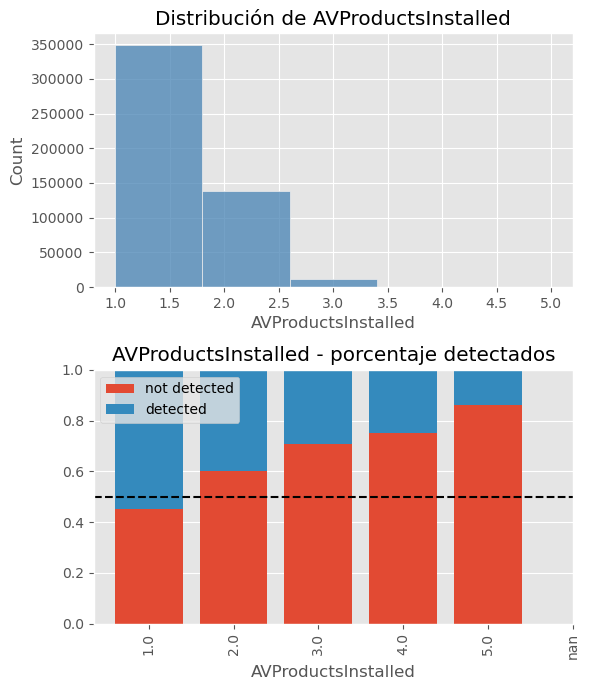

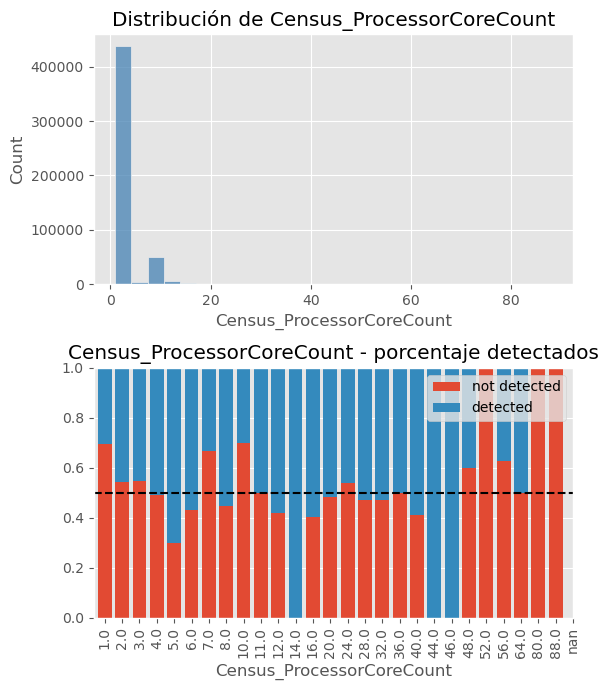

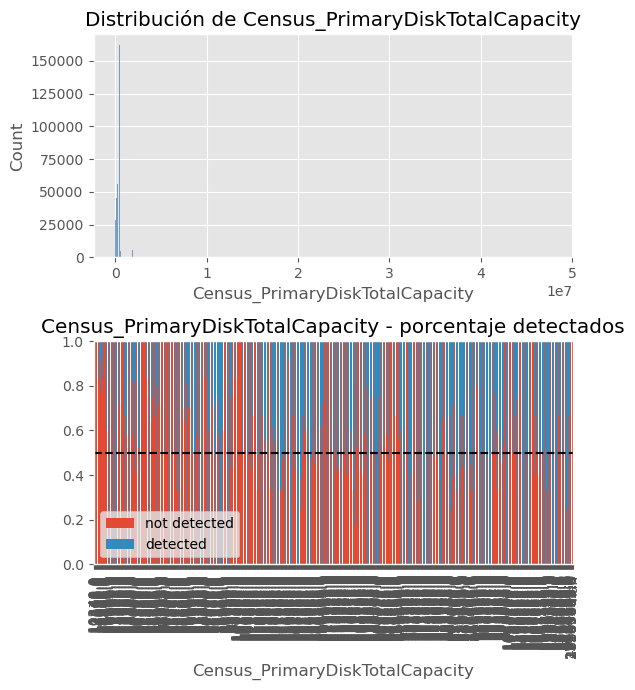

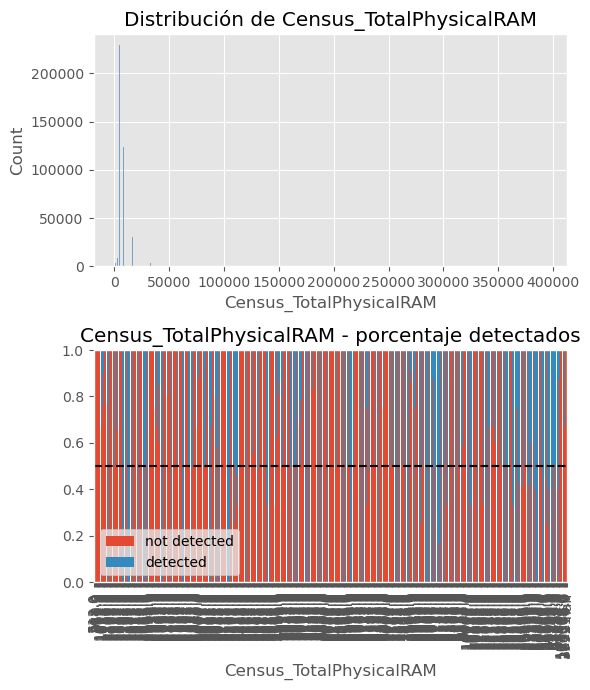

[None, None, None, None]

In [ ]:
# visualizamos las variables numéricas
[combinar_visualizaciones_numerico(x) for x in variables_numericas]

#### 2.1.8.2.2 - Categóricos<a class="anchor" id="Categóricos"></a>

In [58]:
# Función 1: definimos una función para poder graficar la relacion entre el target y cada variable, ordenadas por el conteo total.
def plot_normalized_stacked_bar_ordenado(variable, target='HasDetections'):
    df_plot = df_modelo.groupby([target, variable]).size().reset_index()
    df_plot = df_plot.pivot(index=variable, columns=target)
    df_plot.columns = ['not detected', 'detected']
    df_plot['conteo_total'] = df_plot.sum(axis=1)
    df_plot['not detected'] /= df_plot['conteo_total']
    df_plot['detected'] /= df_plot['conteo_total']
    
    # Obtener las categorías ordenadas según el conteo_total en orden descendente
    categorias_ordenadas = df_plot.sort_values(by='conteo_total', ascending=False).index
    df_plot.drop(columns='conteo_total', inplace=True)
    df_plot = df_plot.reindex(categorias_ordenadas)
    
    titulo = f'{variable} - porcentaje detectados'
    ax = plt.subplot(212)  # Definir la subtrama para el segundo gráfico
    df_plot[['not detected', 'detected']].plot(kind='bar', stacked=True, width=0.8, ax=ax)
    plt.xticks(rotation=90)
    plt.title(titulo)
    plt.axhline(y=0.5, color='black', linestyle='--')
    plt.ylim(0, 1)
    

# Función 2: definimos una función para poder analizar graficamente la distribucion entre los valores de cada variable, ordenadas de mayor a menor.
def analisis_categoricas2(variable):
    print('Variable:', variable)
    print('Nan', str(df_modelo[variable].isna().sum()))
    categorias_ordenadas = df_modelo[variable].value_counts().index
    ax = plt.subplot(211)  # Definir la subtrama para el primer gráfico
    sns.countplot(df_modelo[variable], order=categorias_ordenadas, color='steelblue', ax=ax)
    plt.xticks(rotation=90)
    plt.title('Frecuencia de ' + variable)

# función 3: Nueva función que combina las visualizaciones
def combinar_visualizaciones(variable):
    fig = plt.figure(figsize=(6, 7))
    plot_normalized_stacked_bar_ordenado(variable)
    analisis_categoricas2(variable)
    plt.tight_layout()
    plt.show()


Variable: EngineVersion
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


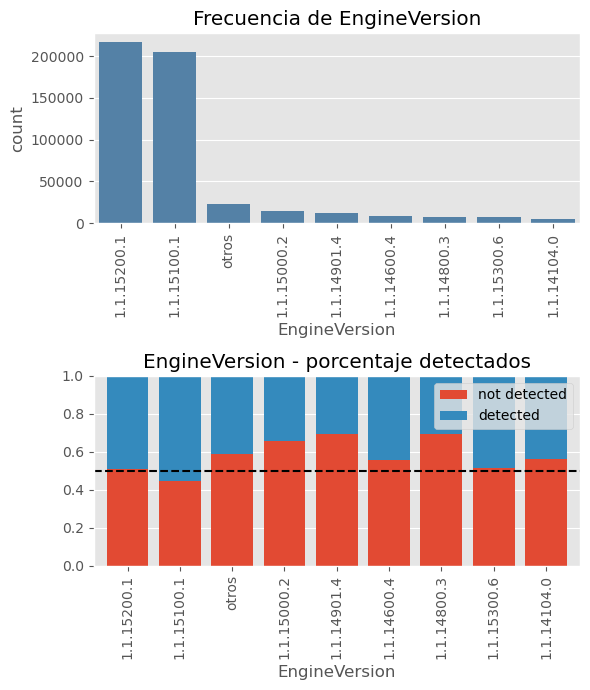

Variable: AppVersion
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


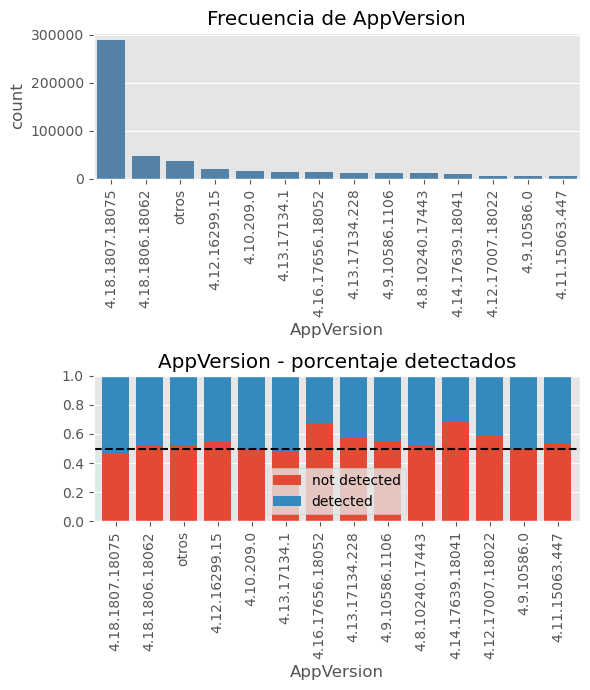

Variable: AVProductStatesIdentifier
Nan 1938


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


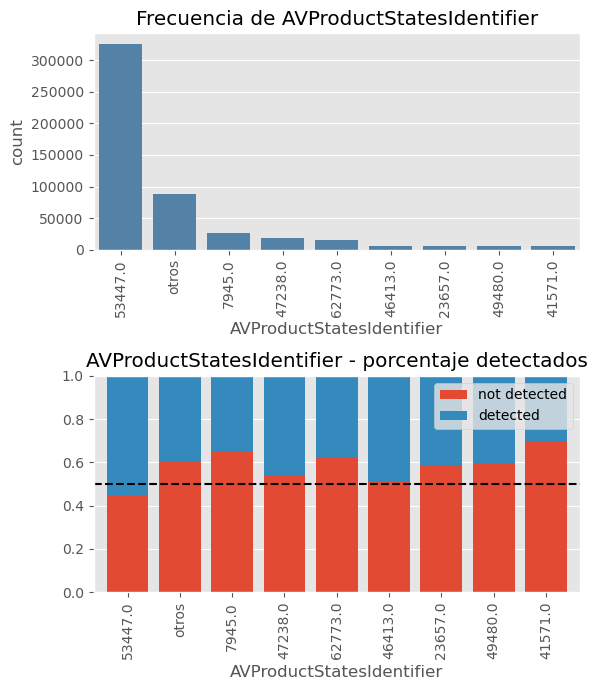

Variable: CountryIdentifier
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


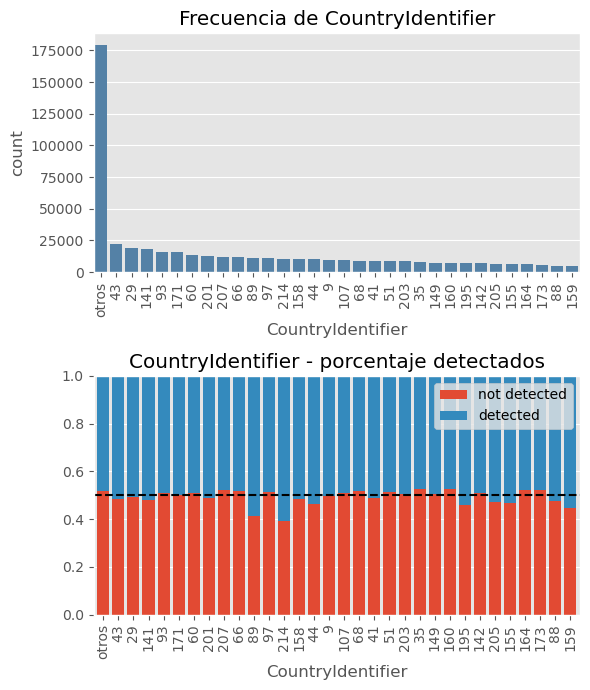

Variable: GeoNameIdentifier
Nan 16


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


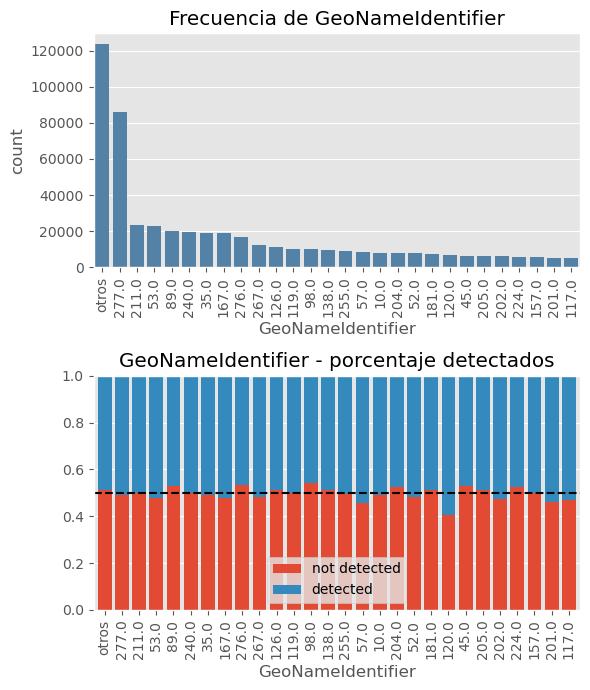

Variable: LocaleEnglishNameIdentifier
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


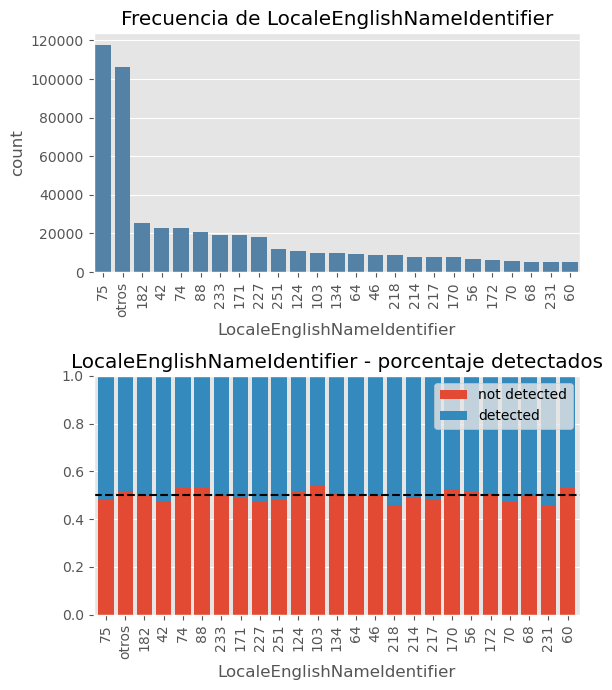

Variable: Processor
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


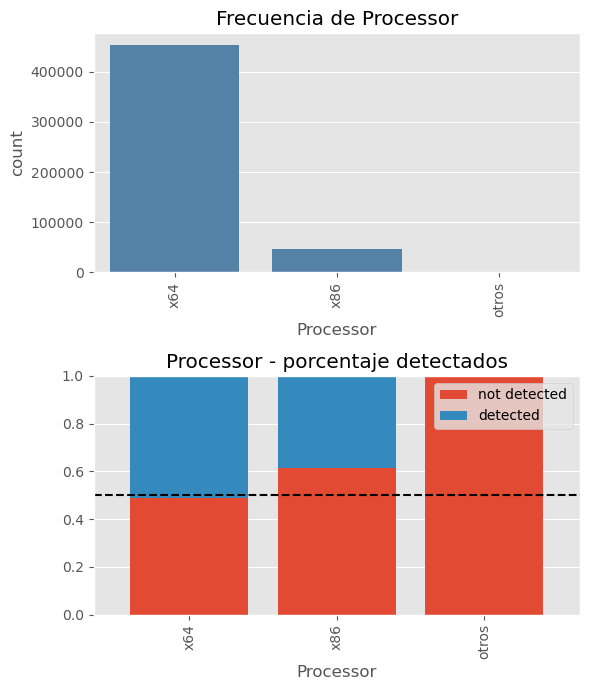

Variable: OsBuild
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


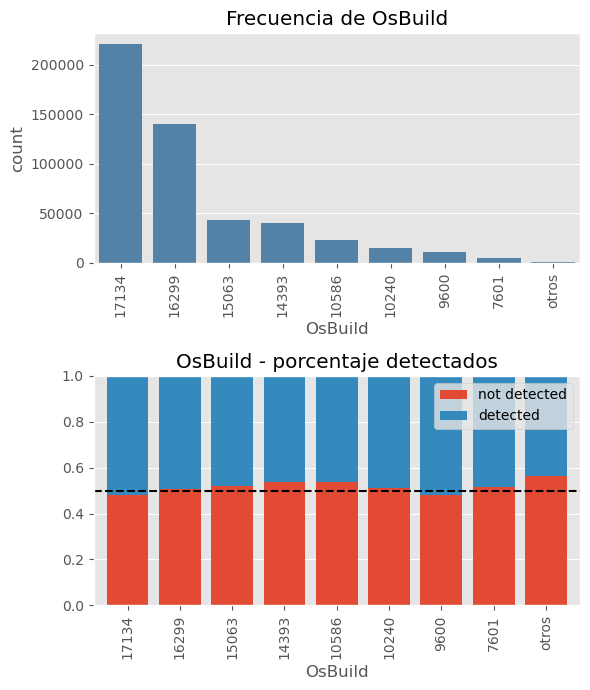

Variable: OsSuite
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


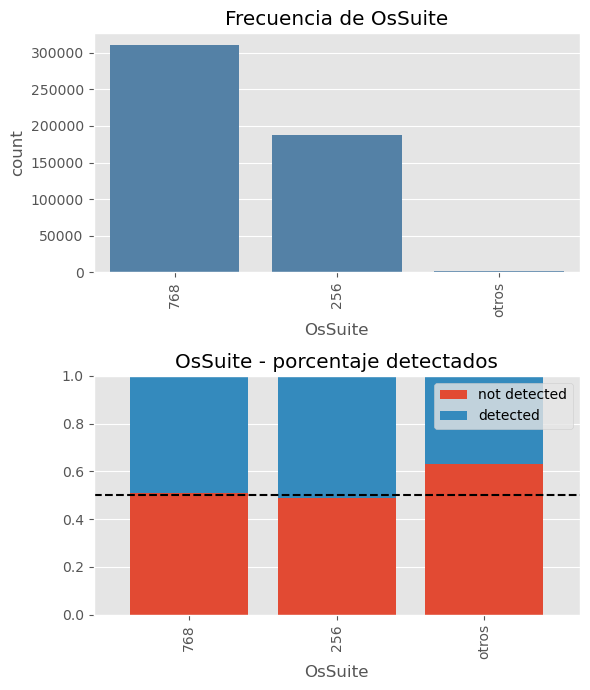

Variable: OsPlatformSubRelease
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


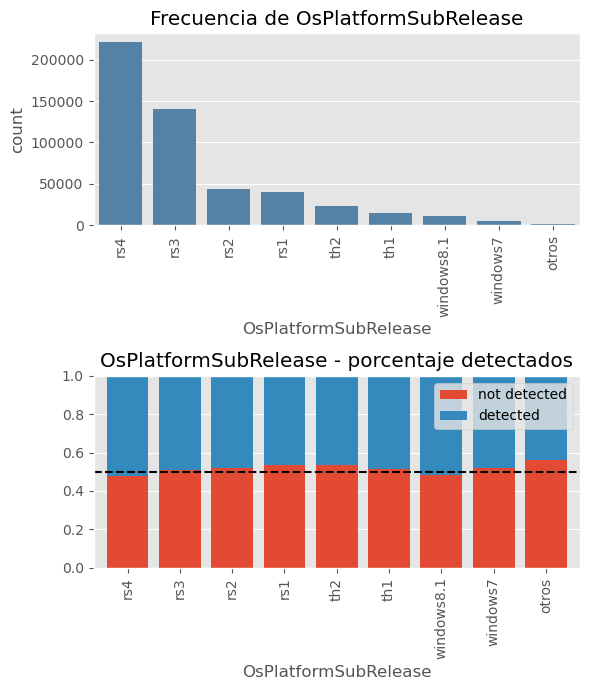

Variable: OsBuildLab
Nan 1


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mikel\AppData\Local\Temp\ipykernel_11320\4184106423.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


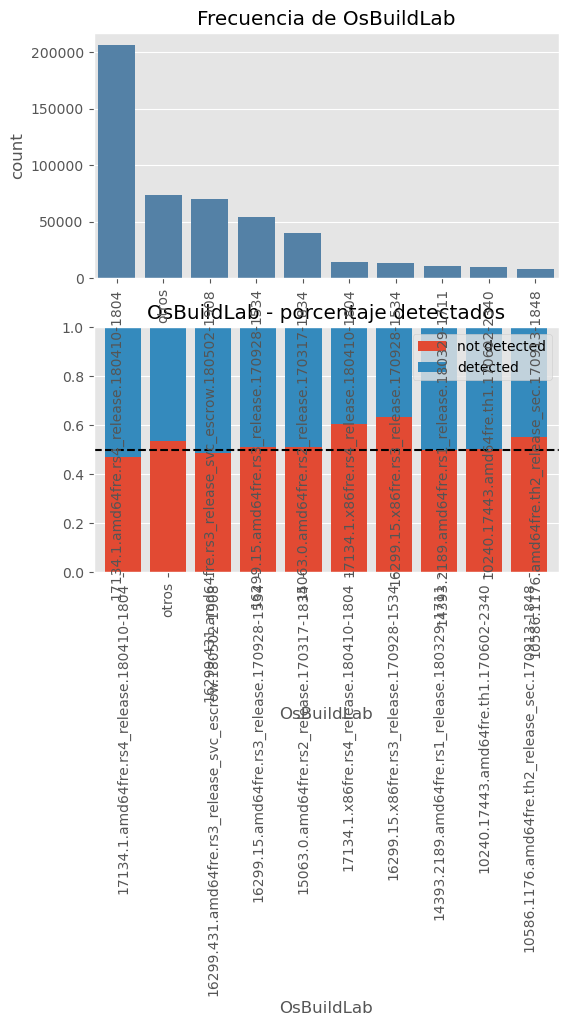

Variable: SkuEdition
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


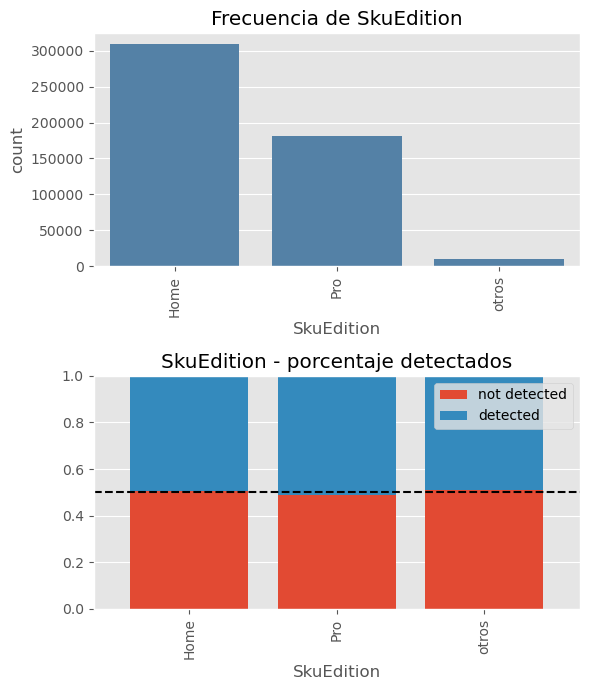

Variable: IeVerIdentifier
Nan 3209


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


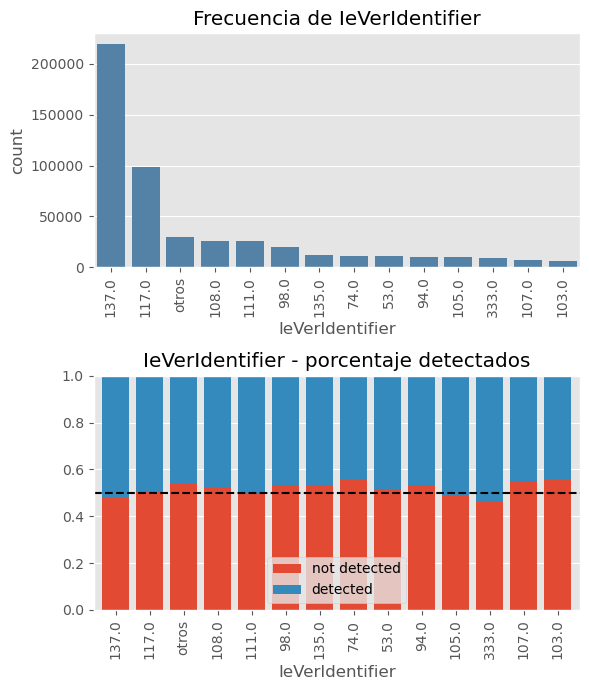

Variable: Census_MDC2FormFactor
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


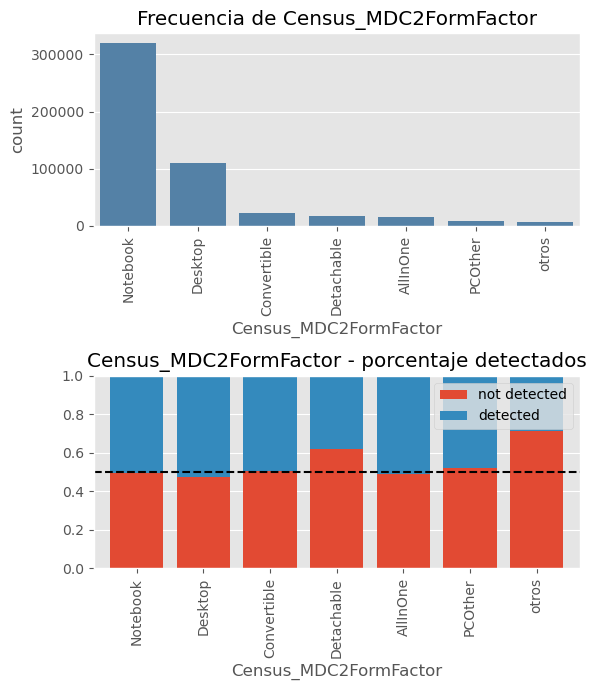

Variable: Census_OEMNameIdentifier
Nan 5381


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


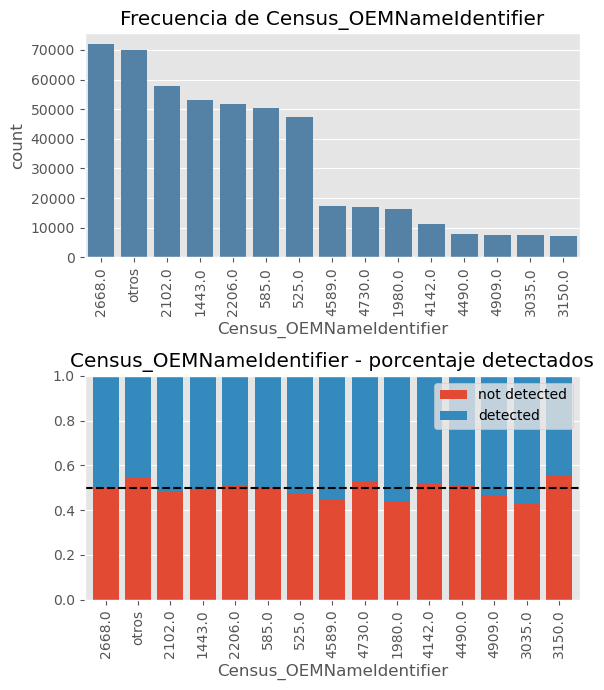

Variable: Census_ProcessorManufacturerIdentifier
Nan 2347


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


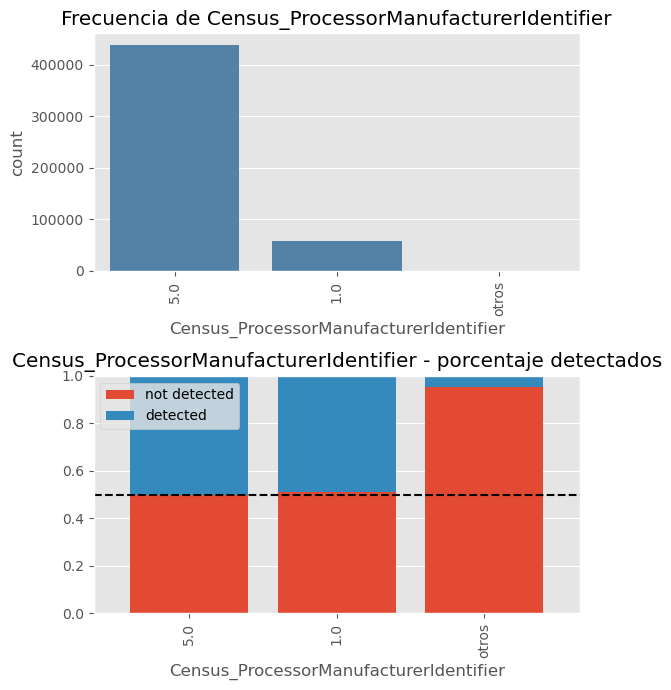

Variable: Census_ChassisTypeName
Nan 37


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


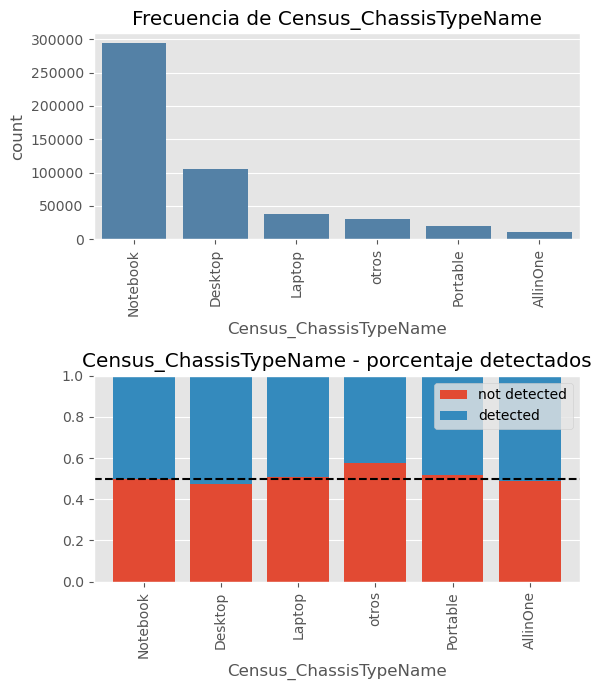

Variable: Census_PowerPlatformRoleName
Nan 2


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


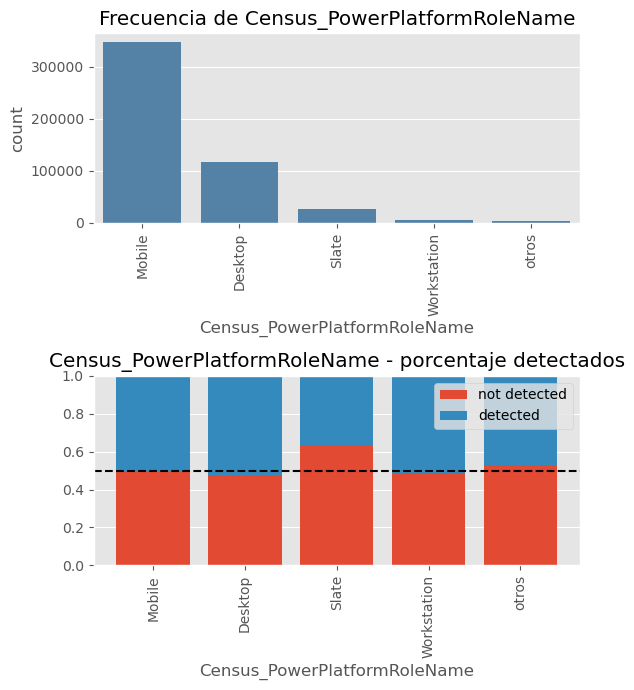

Variable: Census_OSVersion
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


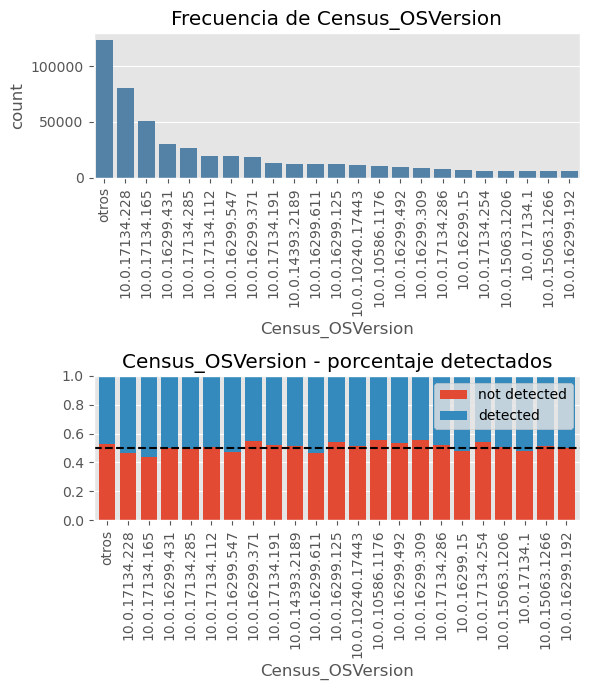

Variable: Census_OSArchitecture
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


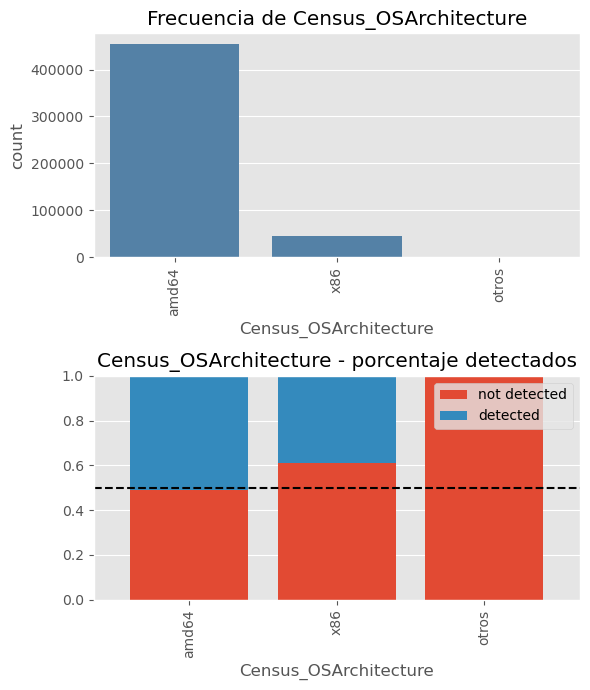

Variable: Census_OSBranch
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


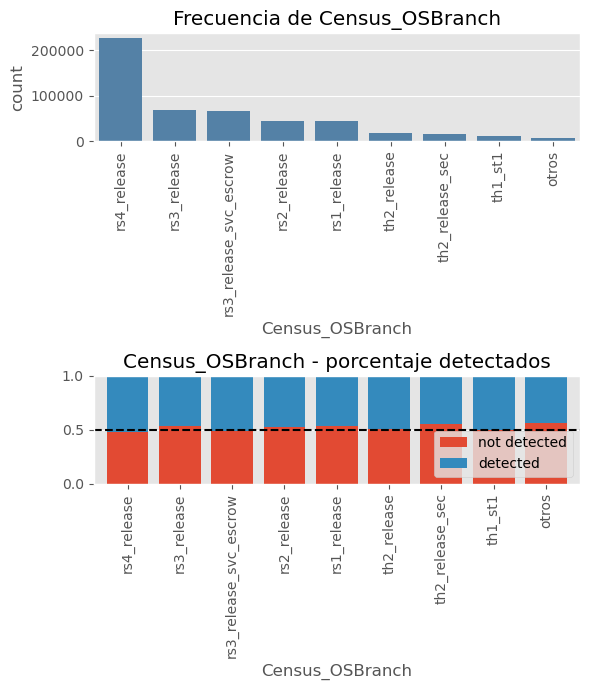

Variable: Census_OSBuildNumber
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


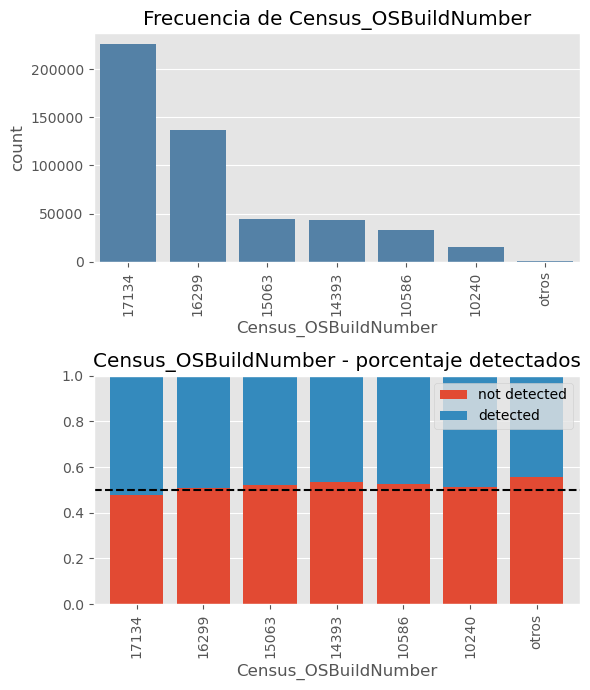

Variable: Census_OSBuildRevision
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


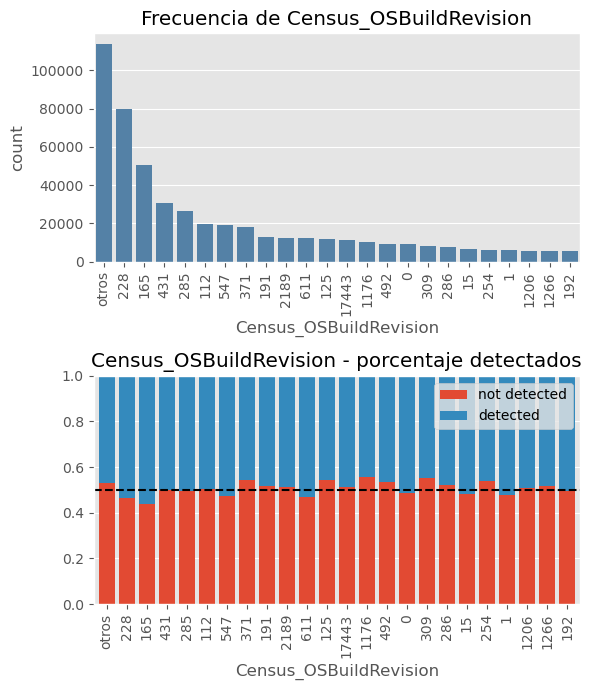

Variable: Census_OSEdition
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


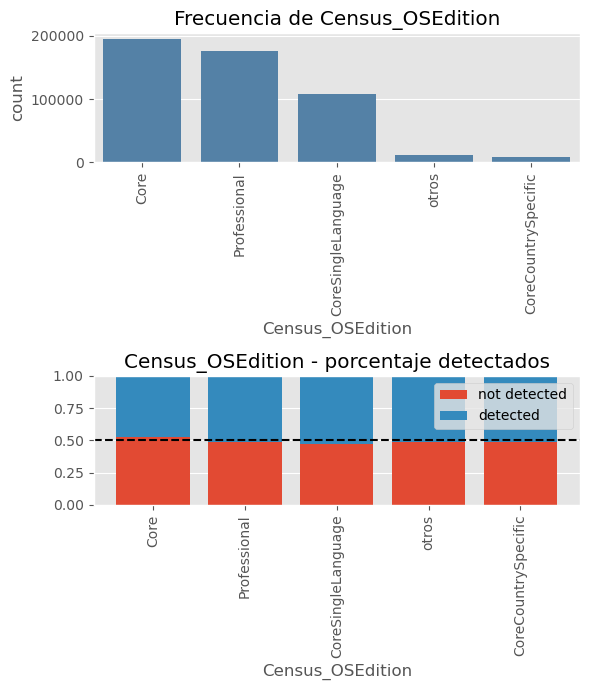

Variable: Census_OSSkuName
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


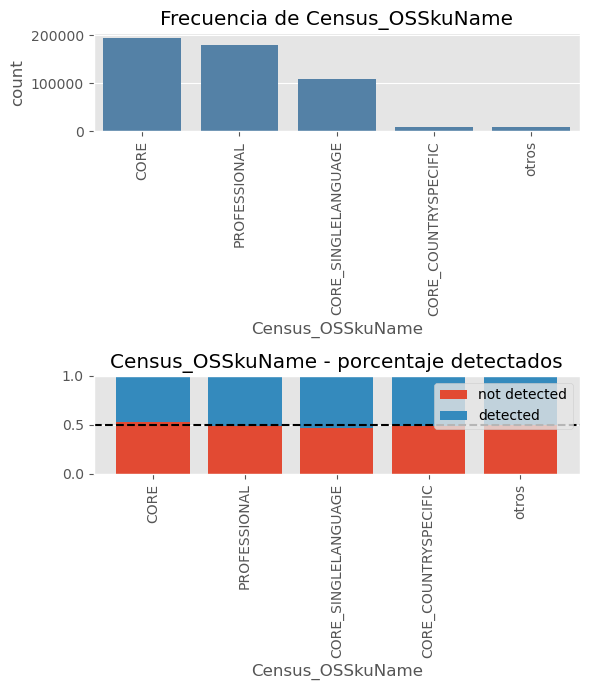

Variable: Census_OSInstallTypeName
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


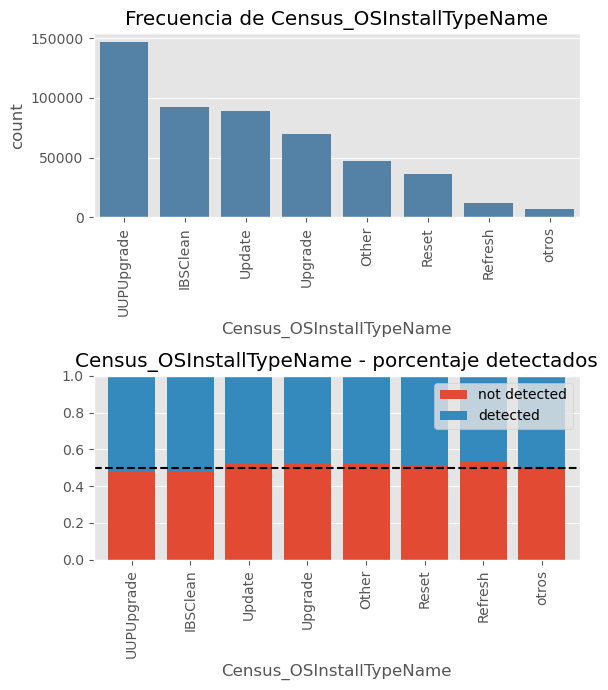

Variable: Census_OSInstallLanguageIdentifier
Nan 3332


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


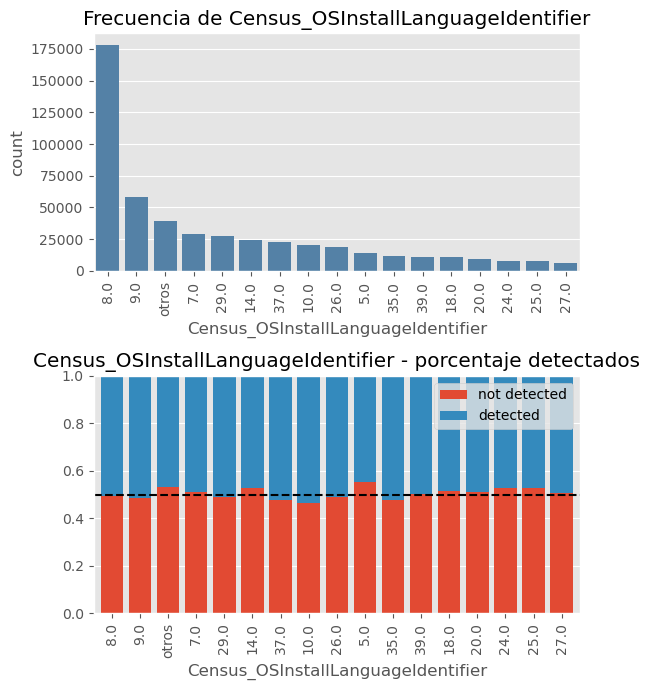

Variable: Census_OSUILocaleIdentifier
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


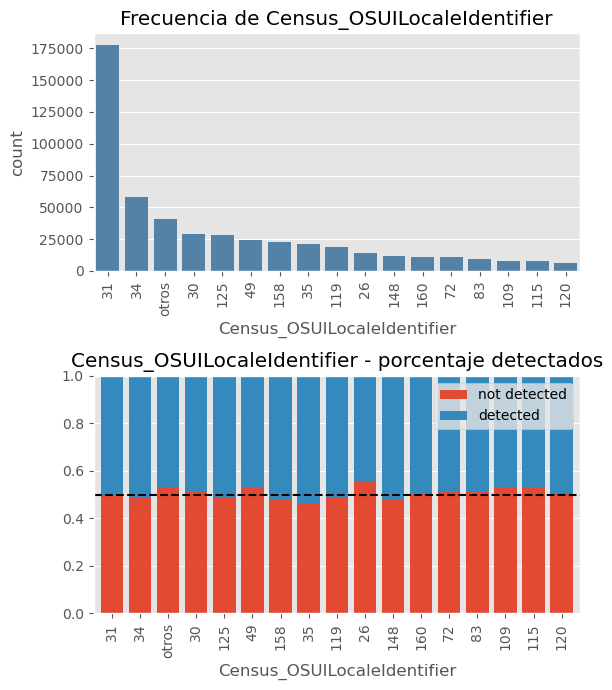

Variable: Census_OSWUAutoUpdateOptionsName
Nan 140961


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mikel\AppData\Local\Temp\ipykernel_11320\4184106423.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


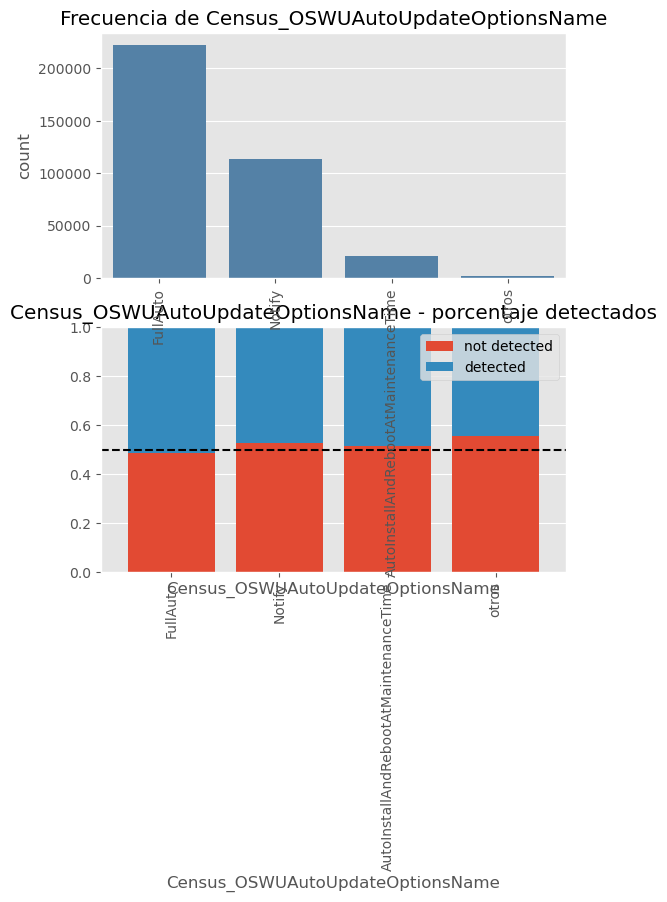

Variable: Census_GenuineStateName
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


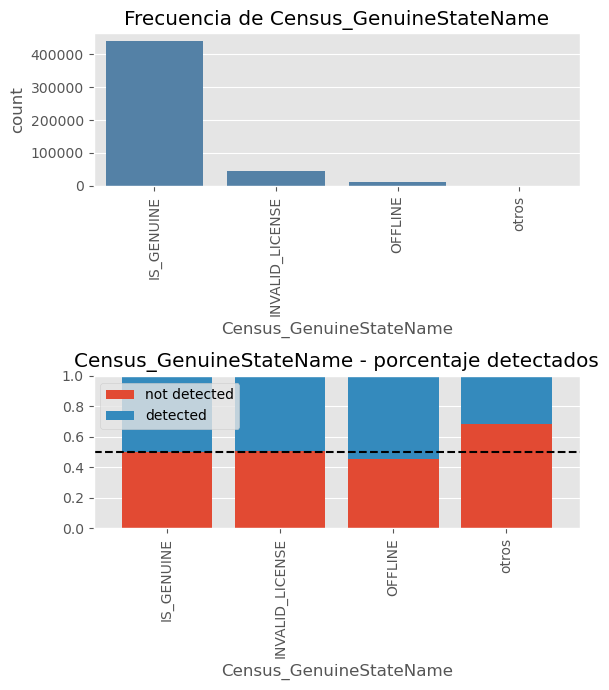

Variable: Census_ActivationChannel
Nan 0


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


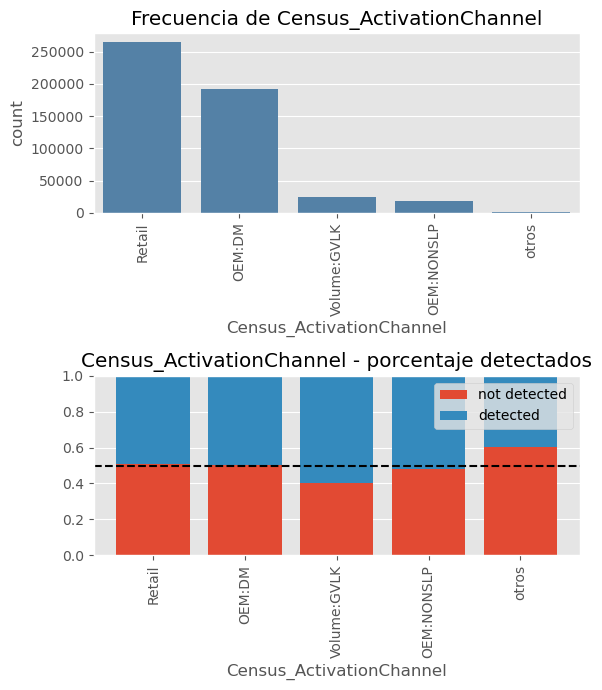

Variable: Census_FirmwareManufacturerIdentifier
Nan 10349


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


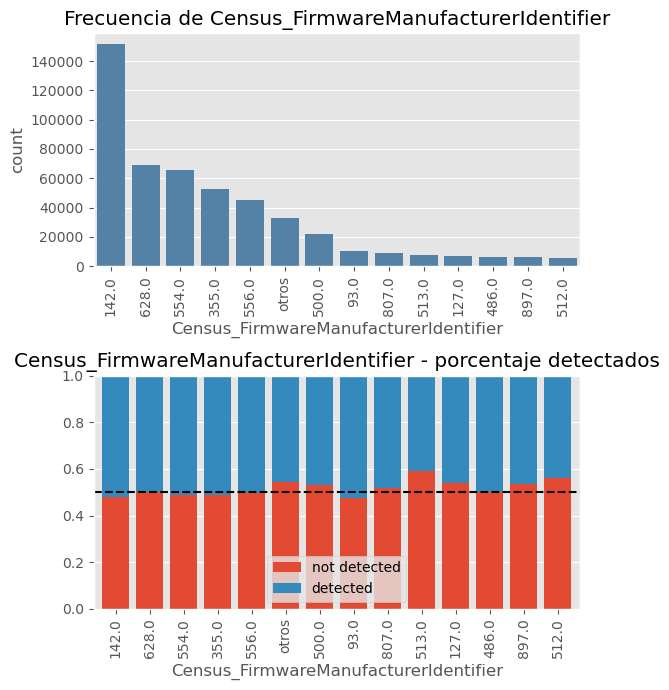

Variable: Wdft_RegionIdentifier
Nan 16950


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


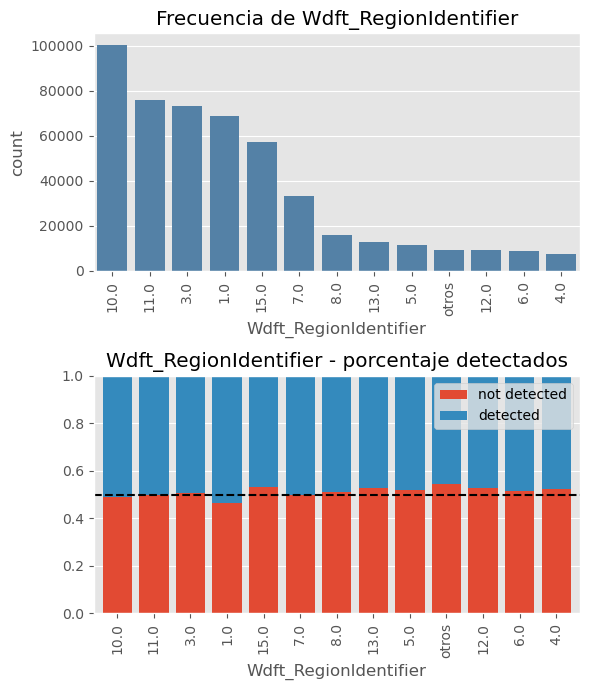

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
[combinar_visualizaciones(x) for x in lista_categoricas]

#### 2.1.8.2.3 - Booleanos<a class="anchor" id="Booleanos"></a>

In [59]:
# Función 1: plot_normalized_stacked_bar_booleano para variables booleanas
def plot_normalized_stacked_bar_booleano(variable, target='HasDetections'):
    titulo = f'{variable} - porcentaje detectados'

    # Calcular el porcentaje de detecciones para cada valor booleano
    df_plot = df_modelo.groupby([target, variable]).size().reset_index()
    df_plot = df_plot.pivot(index=variable, columns=target) # pivotamos 
    df_plot.columns = ['not detected', 'detected'] # renombramos las columnas
    df_plot['conteo_total'] = df_plot.sum(axis=1)
    df_plot['not detected'] /= df_plot['conteo_total']
    df_plot['detected'] /= df_plot['conteo_total']
    df_plot.drop(columns = 'conteo_total', inplace=True) # eliminamos la variable conteo total
    ax = plt.subplot(212)  # Definir la subtrama para el segundo gráfico
    df_plot[['not detected', 'detected']].plot(kind='bar', stacked=True, width=0.8, ax=ax)
    plt.xticks([0, 1], ['False', 'True'])
    titulo = f'{variable} - porcentaje detectados'
    plt.title(titulo)
    plt.axhline(y=0.5, color='black', linestyle='--')
    plt.ylim(0, 1)
 
# Función 2: analisis_booleanas para variables booleanas
def analisis_booleanas(variable):
    valores_presentes = df_modelo[variable].dropna()
    ax = plt.subplot(211)  # Definir la subtrama para el primer gráfico
    sns.countplot(df_modelo[variable], color='steelblue', ax=ax)
    plt.xticks([0, 1], ['False', 'True'])
    plt.title('Distribución de ' + variable)

# Nueva función que combina las visualizaciones para variables booleanas
def combinar_visualizaciones_booleano(variable):
    # Crear una figura con dos subtramas (2 filas, 1 columna)
    fig = plt.figure(figsize=(6, 7))

    # Llamar a las funciones para cada subtrama (se invierte el orden)
    plot_normalized_stacked_bar_booleano(variable)
    analisis_booleanas(variable)

    # Ajustar la disposición de los gráficos
    plt.tight_layout()

    # Mostrar el gráfico combinado
    plt.show()


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


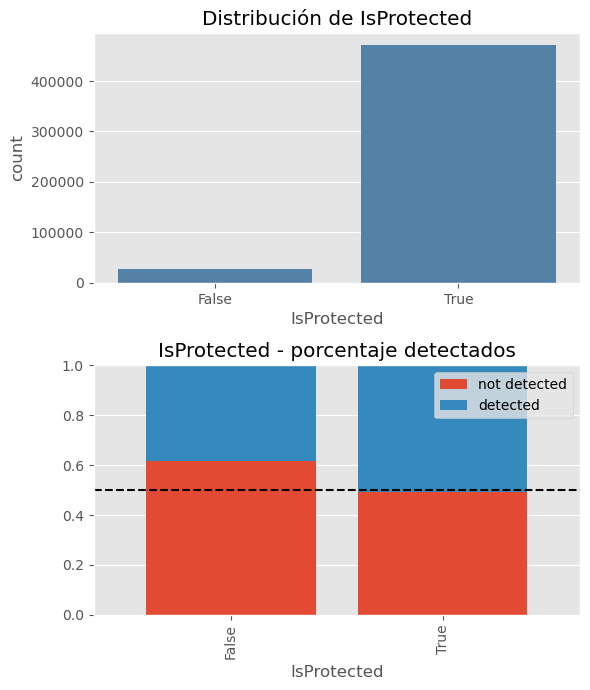

c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


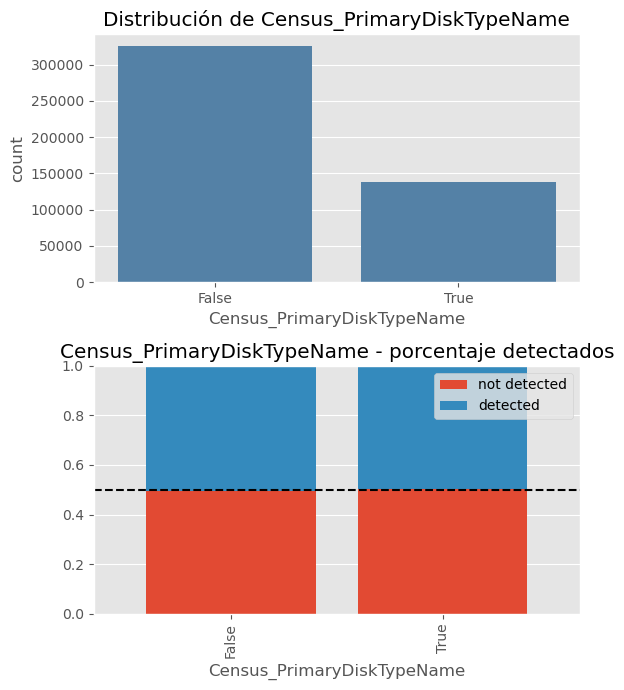

c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


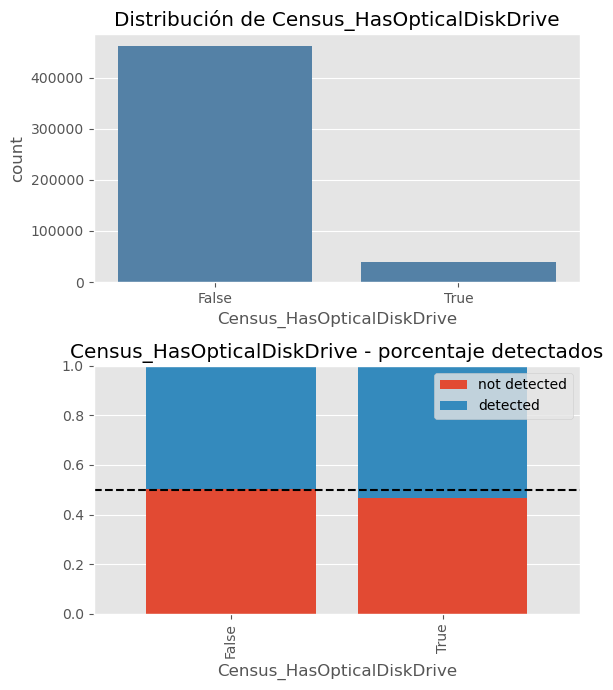

c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


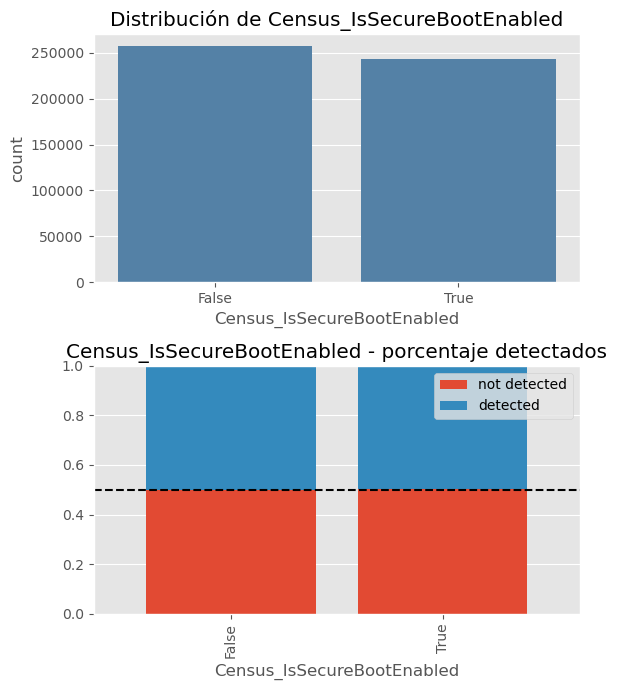

c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


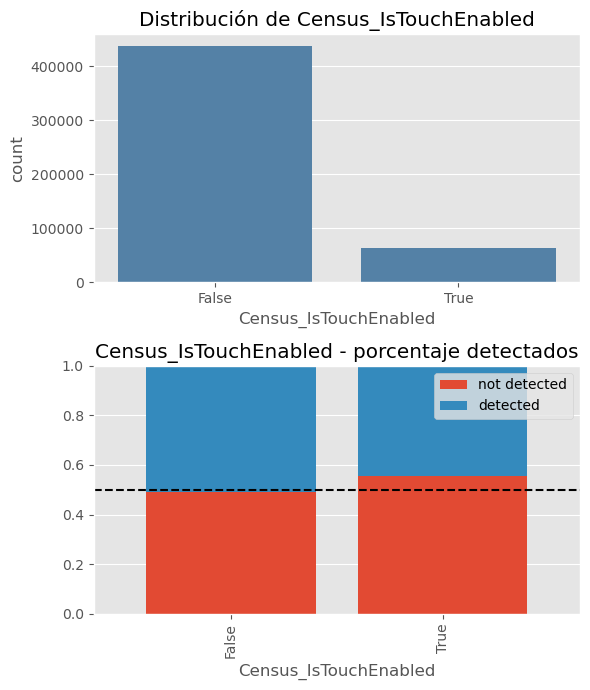

c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


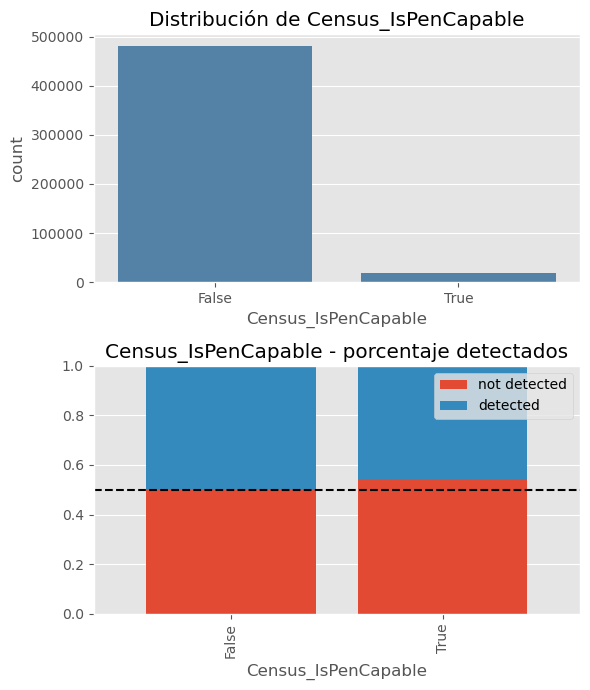

c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


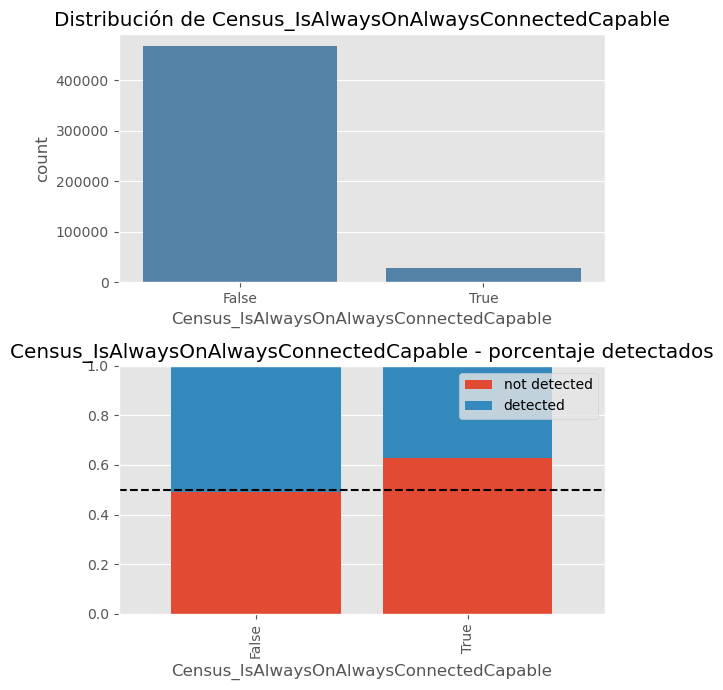

c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


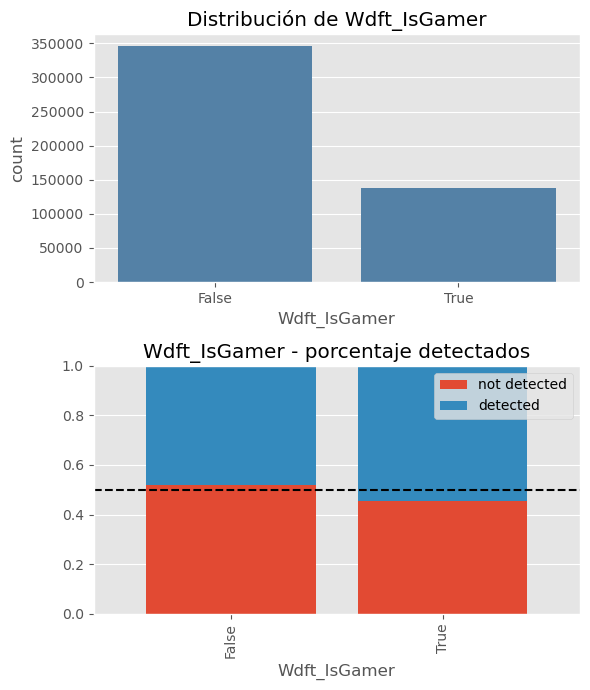

[None, None, None, None, None, None, None, None]

In [ ]:
[combinar_visualizaciones_booleano(x) for x in variables_dos_valores]

## 2.2: Análisis multivariante de los datos<a class="anchor" id="multivariate_data_analysis"></a>

Veamos las correlaciones que existen entre los valores numéricos

In [57]:
df_corr = df_modelo[variables_numericas]

Revisamos la correlacion lineal

Text(0.5, 1.0, 'Correlation Heatmap')

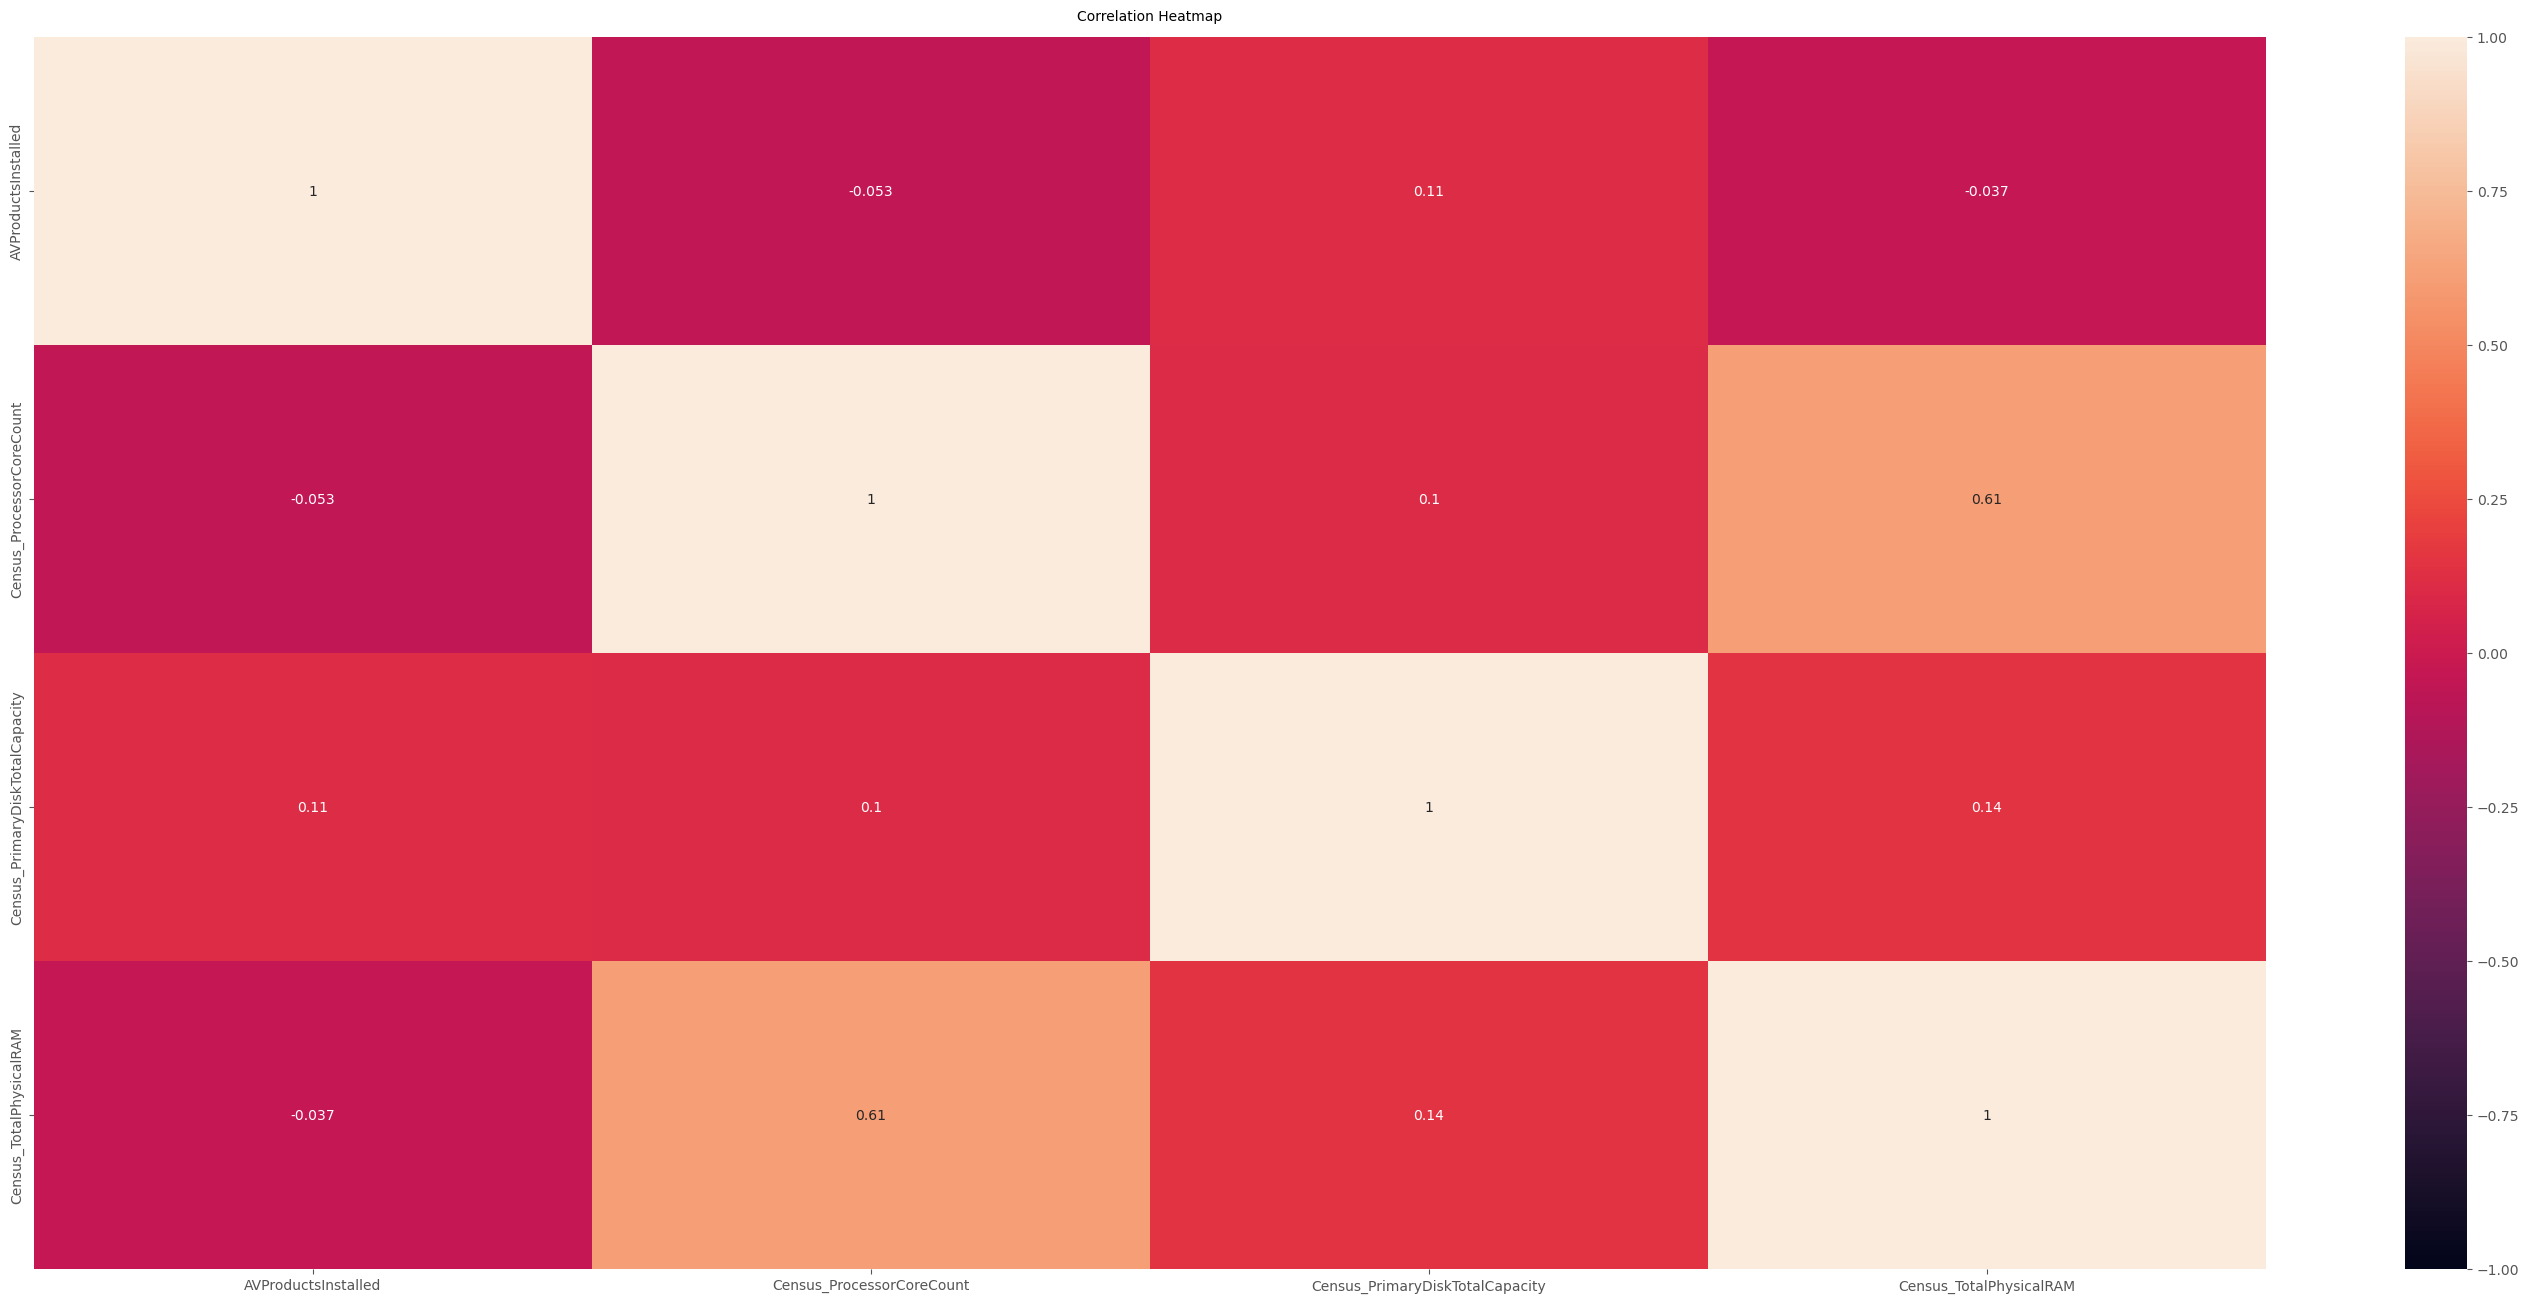

In [58]:
plt.figure(figsize=(36, 16))
heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12)

Revisamos la correlación monótona.

Text(0.5, 1.0, 'Correlation Heatmap')

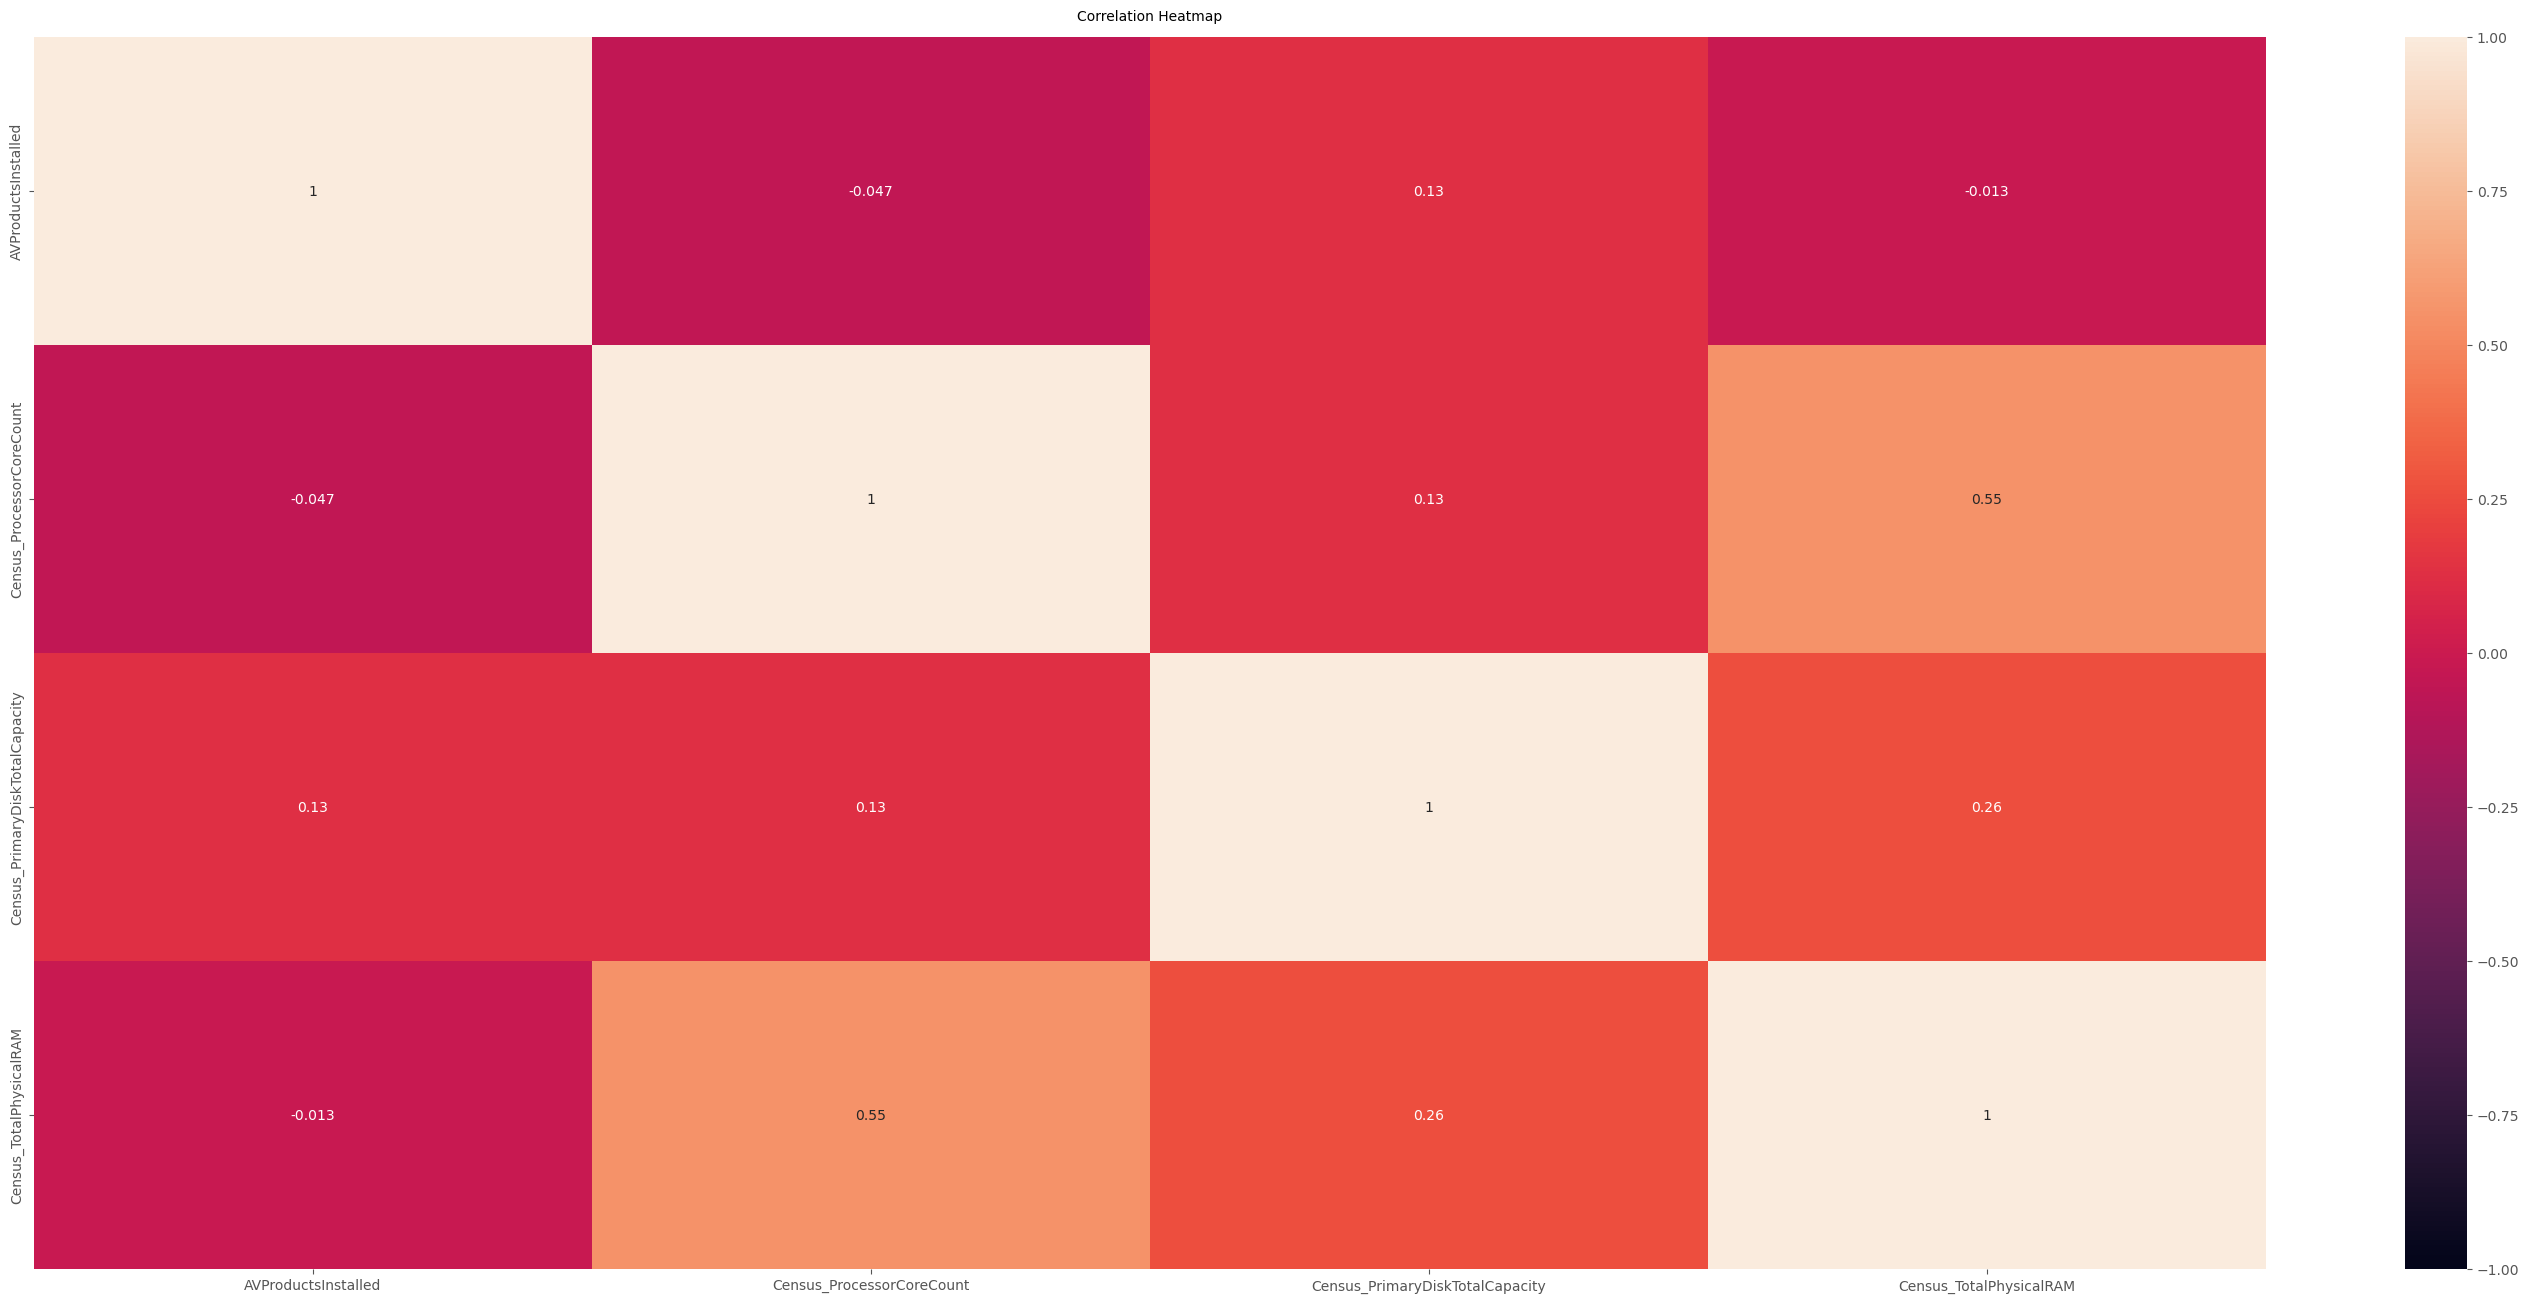

In [ ]:
plt.figure(figsize=(36, 16))
heatmap = sns.heatmap(df_corr.corr('spearman'), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12)

#### Analizaremos aquellas variables numericas que tienen una correlación mas elevada 

In [59]:
def analisis_numericos_relacion (a,b,data=df):
    sns.scatterplot(data=df, x=a, y=b, alpha=0.05, color='black')
    plt.show()

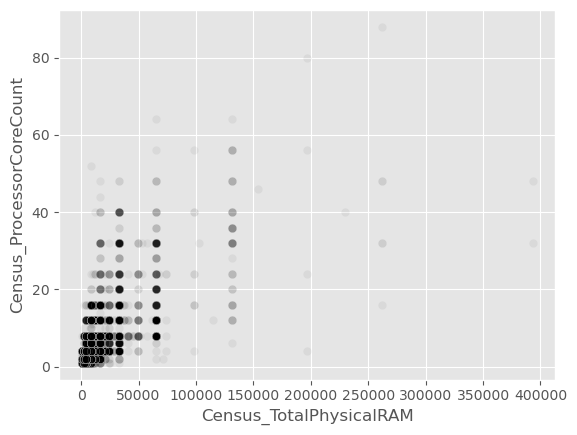

In [60]:
analisis_numericos_relacion('Census_TotalPhysicalRAM','Census_ProcessorCoreCount')

Observamos que los tres valores tienen una relacion positiva.

## MLC3: Limpieza de atributos<a class="anchor" id="data_cleaning"></a>


In [61]:
df_modelo.dtypes

EngineVersion                               object
AppVersion                                  object
AVProductStatesIdentifier                   object
AVProductsInstalled                        float64
CountryIdentifier                           object
GeoNameIdentifier                           object
LocaleEnglishNameIdentifier                 object
Processor                                   object
OsBuild                                     object
OsSuite                                     object
OsPlatformSubRelease                        object
OsBuildLab                                  object
SkuEdition                                  object
IsProtected                                   bool
IeVerIdentifier                             object
Census_MDC2FormFactor                       object
Census_OEMNameIdentifier                    object
Census_ProcessorCoreCount                  float64
Census_ProcessorManufacturerIdentifier      object
Census_PrimaryDiskTotalCapacity

### 3.1.1. Imputacion de valores nulos<a class="anchor" id="nulls_imputation"></a>

In [48]:
# Revisaremos los valores nan que hay
df_modelo.isnull().sum().sort_values(ascending=False)

Census_OSWUAutoUpdateOptionsName           140961
Census_PrimaryDiskTypeName                  36416
Wdft_RegionIdentifier                       16950
Census_FirmwareManufacturerIdentifier       10349
Census_OEMNameIdentifier                     5381
Census_TotalPhysicalRAM                      4556
Census_OSInstallLanguageIdentifier           3332
IeVerIdentifier                              3209
Census_PrimaryDiskTotalCapacity              2976
Census_ProcessorManufacturerIdentifier       2347
Census_ProcessorCoreCount                    2347
AVProductStatesIdentifier                    1938
AVProductsInstalled                          1938
Census_ChassisTypeName                         37
GeoNameIdentifier                              16
Census_PowerPlatformRoleName                    2
OsBuildLab                                      1
Census_OSBuildRevision                          0
Census_GenuineStateName                         0
Census_ActivationChannel                        0


In [49]:
df_modelo[lista_categoricas].isnull().sum().sort_values(ascending=False)

Census_OSWUAutoUpdateOptionsName          140961
Census_PrimaryDiskTypeName                 36416
Wdft_RegionIdentifier                      16950
Census_FirmwareManufacturerIdentifier      10349
Census_OEMNameIdentifier                    5381
Census_OSInstallLanguageIdentifier          3332
IeVerIdentifier                             3209
Census_ProcessorManufacturerIdentifier      2347
AVProductStatesIdentifier                   1938
Census_ChassisTypeName                        37
GeoNameIdentifier                             16
Census_PowerPlatformRoleName                   2
OsBuildLab                                     1
Census_OSBuildRevision                         0
CountryIdentifier                              0
Census_ActivationChannel                       0
Census_GenuineStateName                        0
Census_OSUILocaleIdentifier                    0
LocaleEnglishNameIdentifier                    0
Census_OSInstallTypeName                       0
Census_OSSkuName    

In [47]:
# asignamos la categoria 'otros' a los nan categoricos
df_modelo[lista_categoricas] = df_modelo[lista_categoricas].fillna('otros')

C:\Users\Mikel\AppData\Local\Temp\ipykernel_36388\3236718524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo[lista_categoricas] = df_modelo[lista_categoricas].fillna('otros')


In [48]:
df_modelo.isnull().sum().sort_values(ascending=False)

Census_TotalPhysicalRAM                    4556
Census_PrimaryDiskTotalCapacity            2976
Census_ProcessorCoreCount                  2347
AVProductsInstalled                        1938
EngineVersion                                 0
Census_OSUILocaleIdentifier                   0
Census_OSBranch                               0
Census_OSBuildNumber                          0
Census_OSBuildRevision                        0
Census_OSEdition                              0
Census_OSSkuName                              0
Census_OSInstallTypeName                      0
Census_OSInstallLanguageIdentifier            0
Census_OSWUAutoUpdateOptionsName              0
Census_OSVersion                              0
Census_GenuineStateName                       0
Census_ActivationChannel                      0
Census_FirmwareManufacturerIdentifier         0
Census_IsSecureBootEnabled                    0
Census_IsTouchEnabled                         0
Census_IsPenCapable                     

In [49]:
# revisamos las observaciones que tienen valores nulos
num_observaciones_con_nan = df_modelo.isna().any(axis=1).sum()
num_observaciones_con_nan

6911

Hay un 1.25% de observaciones con valores nan, vamos a eliminar las observaciones ya que tenemos todavia 493K observaciones.

In [50]:
# creamos una copia para poder revertirlo en caso de ser necesario
df_modelo_sin_obs_nan = df_modelo.copy()

# eliminamos las observaciones que tienen nan en alguna variable
df_modelo_sin_obs_nan = df_modelo_sin_obs_nan.dropna(how='any')

# comprobamos que no quedan nan
df_modelo_sin_obs_nan.isna().any(axis=1).sum()

0

### 3.1.2. Ajustes de tipos<a class="anchor" id="dealing_variable_types"></a>

In [51]:
# visualizamos los tipos de las variables
df_modelo_sin_obs_nan.dtypes

EngineVersion                               object
AppVersion                                  object
AVProductStatesIdentifier                   object
AVProductsInstalled                        float64
CountryIdentifier                           object
GeoNameIdentifier                           object
LocaleEnglishNameIdentifier                 object
Processor                                   object
OsBuild                                     object
OsSuite                                     object
OsPlatformSubRelease                        object
OsBuildLab                                  object
SkuEdition                                  object
IsProtected                                   bool
IeVerIdentifier                             object
Census_MDC2FormFactor                       object
Census_OEMNameIdentifier                    object
Census_ProcessorCoreCount                  float64
Census_ProcessorManufacturerIdentifier      object
Census_PrimaryDiskTotalCapacity

In [52]:
lista_categoricas

['EngineVersion',
 'AppVersion',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Processor',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FirmwareManufacturerIdentifier',
 'Wdft_RegionIdentifier']

In [53]:
# cambiamos el tipo de numéricos a int16
for x in variables_numericas:
    df_modelo_sin_obs_nan[x] = df_modelo_sin_obs_nan[x].astype('int32')

# cambiamos el tipo de bolleanos
for x in variables_dos_valores:
    df_modelo_sin_obs_nan[x] = df_modelo_sin_obs_nan[x].astype('bool')

# cambiamos los categoricos
for x in lista_categoricas:
    df_modelo_sin_obs_nan[x] = df_modelo_sin_obs_nan[x].astype('category')

# por ultimo cambiamos el del target a booleano tambien
df_modelo_sin_obs_nan['HasDetections'] = df_modelo_sin_obs_nan['HasDetections'].astype('bool')

In [51]:
# visualizamos nuevamente los tipos de las variables
df_modelo_sin_obs_nan.dtypes

EngineVersion                                        category
AppVersion                                           category
AVProductStatesIdentifier                            category
AVProductsInstalled                                     int32
CountryIdentifier                                    category
GeoNameIdentifier                                    category
LocaleEnglishNameIdentifier                          category
Processor                                            category
OsBuild                                              category
OsSuite                                              category
OsPlatformSubRelease                                 category
OsBuildLab                                           category
SkuEdition                                           category
IsProtected                                              bool
IeVerIdentifier                                      category
Census_MDC2FormFactor                                category
Census_O

### 3.2: Transformación de atributos<a class="anchor" id="data_transformation"></a>
### 3.2.1. Transformación de variables categóricas.<a class="anchor" id="transformation_categorical"></a>

In [57]:
df_modelo_sin_obs_nan.select_dtypes(include=['category']).describe().T

count unique  \
EngineVersion                              493089      9   
AppVersion                                 493089     14   
AVProductStatesIdentifier              493,089.00   9.00   
CountryIdentifier                          493089     32   
GeoNameIdentifier                          493089     28   
LocaleEnglishNameIdentifier                493089     25   
Processor                                  493089      3   
OsBuild                                    493089      9   
OsSuite                                    493089      3   
OsPlatformSubRelease                       493089      9   
OsBuildLab                                 493089     10   
SkuEdition                                 493089      3   
IeVerIdentifier                        493,089.00  14.00   
Census_MDC2FormFactor                      493089      7   
Census_OEMNameIdentifier                   493089     15   
Census_ProcessorManufacturerIdentifier 493,089.00   3.00   
Census_PrimaryDiskTypeName                 493089      3   
Census_ChassisTypeName                     493089      6   
Census_PowerPlatformRoleName               493089      5   
Census_OSVersion                           493089     23   
Census_OSArchitecture                      493089      3   
Census_OSBranch                            493089      9   
Census_OSBuildNumber                       493089      7   
Census_OSBuildRevision                     493089     24   
Census_OSEdition                           493089      5   
Census_OSSkuName                           493089      5   
Census_OSInstallTypeName                   493089      8   
Census_OSInstallLanguageIdentifier     493,089.00  17.00   
Census_OSUILocaleIdentifier                493089     17   
Census_OSWUAutoUpdateOptionsName           493089      4   
Census_GenuineStateName                    493089      4   
Census_ActivationChannel                   493089      5   
Census_FirmwareManufacturerIdentifier  493,089.00  14.00   
Wdft_RegionIdentifier                  493,089.00  13.00   

                                                                             top  \
EngineVersion                                                        1.1.15200.1   
AppVersion                                                       4.18.1807.18075   
AVProductStatesIdentifier                                              53,447.00   
CountryIdentifier                                                          otros   
GeoNameIdentifier                                                          otros   
LocaleEnglishNameIdentifier                                                   75   
Processor                                                                    x64   
OsBuild                                                                    17134   
OsSuite                                                                      768   
OsPlatformSubRelease                                                         rs4   
OsBuildLab                              17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                                  Home   
IeVerIdentifier                                                           137.00   
Census_MDC2FormFactor                                                   Notebook   
Census_OEMNameIdentifier                                                   otros   
Census_ProcessorManufacturerIdentifier                                      5.00   
Census_PrimaryDiskTypeName                                                   HDD   
Census_ChassisTypeName                                                  Notebook   
Census_PowerPlatformRoleName                                              Mobile   
Census_OSVersion                                                           otros   
Census_OSArchitecture                                                      amd64   
Census_OSBranch                                                      rs4_release   
Census_OSBu

Vamos a hacer Label encoding para todas ellas ya que funciona bien para los árboles de decisión, que es el que mas se suele usar.


In [54]:
columnas_para_OHE = list(df_modelo_sin_obs_nan.select_dtypes(include=['category']).columns)

In [55]:
for x in columnas_para_OHE:
    dummy_dataset = pd.get_dummies(df_modelo_sin_obs_nan[x], prefix = x)
    df_modelo_sin_obs_nan = pd.concat([df_modelo_sin_obs_nan, dummy_dataset], axis = 1)
    df_modelo_sin_obs_nan.drop(x, axis = 1, inplace = True)

Final dataframe

In [56]:
df_modelo_sin_obs_nan.head().T

8427007 8829090 2731904  \
AVProductsInstalled                                      1       1       2   
IsProtected                                           True    True    True   
Census_ProcessorCoreCount                                4       4       4   
Census_PrimaryDiskTotalCapacity                     953869  476940  244198   
Census_HasOpticalDiskDrive                           False   False   False   
Census_TotalPhysicalRAM                               8192    8192    8192   
Census_IsSecureBootEnabled                           False   False    True   
Census_IsTouchEnabled                                False   False    True   
Census_IsPenCapable                                  False   False    True   
Census_IsAlwaysOnAlwaysConnectedCapable              False   False   False   
Wdft_IsGamer                                         False    True   False   
HasDetections                                         True   False   False   
EngineVersion_1.1.14104.0                                0       0       0   
EngineVersion_1.1.14600.4                                0       0       0   
EngineVersion_1.1.14800.3                                0       0       0   
EngineVersion_1.1.14901.4                                0       0       0   
EngineVersion_1.1.15000.2                                0       0       0   
EngineVersion_1.1.15100.1                                1       1       1   
EngineVersion_1.1.15200.1                                0       0       0   
EngineVersion_1.1.15300.6                                0       0       0   
EngineVersion_otros                                      0       0       0   
AppVersion_4.10.209.0                                    0       0       0   
AppVersion_4.11.15063.447                                0       0       0   
AppVersion_4.12.16299.15                                 0       0       0   
AppVersion_4.12.17007.18022                              0       0       0   
AppVersion_4.13.17134.1                                  0       0       0   
AppVersion_4.13.17134.228                                0       0       0   
AppVersion_4.14.17639.18041                              0       0       0   
AppVersion_4.16.17656.18052                              0       0       0   
AppVersion_4.18.1806.18062                               0       0       0   
AppVersion_4.18.1807.18075                               1       1       0   
AppVersion_4.8.10240.17443                               0       0       0   
AppVersion_4.9.10586.0                                   0       0       0   
AppVersion_4.9.10586.1106                                0       0       1   
AppVersion_otros                                         0       0       0   
AVProductStatesIdentifier_7945.0                         0       0       0   
AVProductStatesIdentifier_23657.0                        0       0       0   
AVProductStatesIdentifier_41571.0                        0       0       0   
AVProductStatesIdentifier_46413.0                        0       0       0   
AVProductStatesIdentifier_47238.0                        0       0       0   
AVProductStatesIdentifier_49480.0                        0       0       0   
AVProductStatesIdentifier_53447.0                        1       1       0   
AVProductStatesIdentifier_62773.0                        0       0       0   
AVProductStatesIdentifier_otros                          0       0       1   
CountryIdentifier_9                                      0       0       0   
CountryIdentifier_29                                     0       0       0   
CountryIdentifier_35                                     0       0       0   
CountryIdentifier_41                                     0       0       0   
CountryIdentifier_43                                     0       0       0   
CountryIdentifier_44                                     0       0       0   
CountryIdentifier_51                                     0       0       

In [57]:
df_modelo_sin_obs_nan.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493089 entries, 8427007 to 4295573
Columns: 377 entries, AVProductsInstalled to Wdft_RegionIdentifier_otros
dtypes: bool(8), int32(4), uint8(365)
memory usage: 186.7 MB


In [58]:
df_modelo_sin_obs_nan.isnull().sum()

AVProductsInstalled                                                       0
IsProtected                                                               0
Census_ProcessorCoreCount                                                 0
Census_PrimaryDiskTotalCapacity                                           0
Census_HasOpticalDiskDrive                                                0
Census_TotalPhysicalRAM                                                   0
Census_IsSecureBootEnabled                                                0
Census_IsTouchEnabled                                                     0
Census_IsPenCapable                                                       0
Census_IsAlwaysOnAlwaysConnectedCapable                                   0
Wdft_IsGamer                                                              0
HasDetections                                                             0
EngineVersion_1.1.14104.0                                                 0
EngineVersio

## 4. Modelación.<a class="anchor" id="modelling"></a>

### 4.1. Partición y muestreo del dataset.<a class="anchor" id="dataset_partition"></a>

importamos las librerias que necesitamos:  **model_selection** y **metrics** de scikit-learn. 

In [60]:
from sklearn import metrics
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

Usaremos K-fold como estrategia de validación.<br>
La métrica de evaluación será el AUC.


In [61]:
X = df_modelo_sin_obs_nan.drop(target, axis=1)
y = df_modelo_sin_obs_nan[[target]]


In [62]:
print(X.shape)
print(y.shape)

(493089, 376)
(493089, 1)


Vamos a reducirlo al 20% de las filas

In [63]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        X, # X 
                                        y, # y
                                        test_size = 0.20, 
                                        random_state = 42
                                     )

Revisamos que el target esté balanceado

In [64]:
y_train.value_counts()

HasDetections
True             197511
False            196960
dtype: int64

Vemos que si que lo esta!!

### 4.2 - 4.3 Evaluación algoritmos y optimizacion de modelos.<a class="anchor" id="model_definition"></a>


Vamos a evaluar 3 modelos simulataneamente con la optimización de parametros. De este modo podremos seleccionar el mejor de modelos en base a la los hiperparametros óptimos.

In [68]:
models = {
    'decision_tree': [
        {
        
            "max_depth": randint(8, 20),
            'min_samples_split': randint(2, 7)
        }, 
        DecisionTreeClassifier()
    ],
    'random_forest': [
        {
            'max_depth': randint(4, 15),
            'n_estimators': randint(50, 200),
            'min_samples_split': randint(2, 7)
           
        }, 
        RandomForestClassifier()
    ],
    'gradient_boosting': [
        {
            "subsample": uniform(loc=0.4, scale=0.4),
            'min_samples_leaf': randint(2, 6),
            'min_samples_split': randint(2, 6),
            "learning_rate": uniform(loc=0.01, scale=0.2), 
            "max_depth": randint(4, 10),
            "n_estimators": randint(100, 200),
            'n_iter_no_change': randint(5, 10),
            'tol': uniform(loc=0.001, scale=0.01)
        }, 
        GradientBoostingClassifier()
    ]
}

In [69]:
best_params = dict()
best_score = dict()
for model_name, l_model in models.items():
    print(model_name)
    params, model = l_model
    random_search = model_selection.RandomizedSearchCV(
        model, 
        param_distributions=params, 
        random_state=0, 
        n_iter=10, 
        cv=5, 
        verbose=1, 
        n_jobs=-1, 
        return_train_score=True,
        scoring = 'roc_auc'
    )
    random_search.fit(X_train, np.ravel(y_train))
    best_params[model_name] = random_search.best_params_
    best_score[model_name] = random_search.best_score_

decision_tree


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\tree\_classes.py", line 165, in fit
    X, y = self._validate_data(
  File "c

random_forest
Fitting 5 folds for each of 10 candidates, totalling 50 fits
gradient_boosting
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [70]:
best_params

{'decision_tree': {'max_depth': 11, 'min_samples_split': 5},
 'random_forest': {'max_depth': 14,
  'min_samples_split': 3,
  'n_estimators': 89},
 'gradient_boosting': {'learning_rate': 0.20767476761184525,
  'max_depth': 8,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 103,
  'n_iter_no_change': 9,
  'subsample': 0.6612433301861593,
  'tol': 0.003532916025397821}}

In [71]:
best_score

{'decision_tree': 0.6421404419894312,
 'random_forest': 0.6582063830969288,
 'gradient_boosting': 0.6672129227113776}

## 5. Selección de modelo / Evaluación.<a class="anchor" id="model_evaluation"></a>

### Comparacion final de modelos (Decison Tree vs Random Forest vs Gradient Boosting)

In [72]:
df_cv_results = pd.DataFrame([x for x in range(1,11)])
d_models = {
    'decision_tree': DecisionTreeClassifier(**best_params['decision_tree']),
    'random_forest': RandomForestClassifier(**best_params['random_forest']),
    'gradient_boosting': GradientBoostingClassifier(**best_params['gradient_boosting'])
}
d_metrics = dict()
for model_name, model in d_models.items():
    print(f"Modelo {model_name}")
    cv_results = model_selection.cross_val_score(
        estimator = model, 
        X = X_train, 
        y = np.ravel(y_train), 
        cv = 10, 
        scoring = 'roc_auc',
        n_jobs = -1
    )
    df_cv_results[model_name] = cv_results

Modelo decision_tree


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\tree\_classes.py", line 165, in fit
    X, y = self._validate_data(
  File "c

Modelo random_forest
Modelo gradient_boosting


<AxesSubplot:>

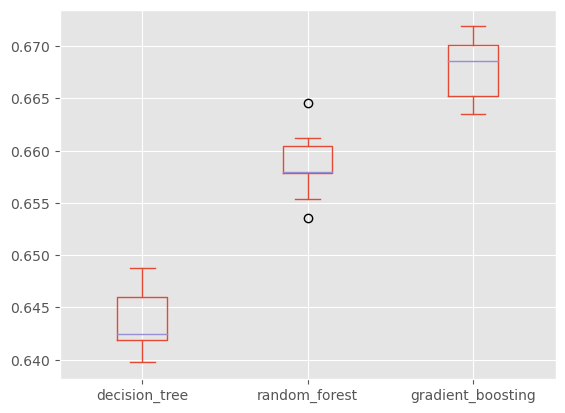

In [74]:
df_cv_results.drop(columns=0).plot(kind='box')

Nos quedamos con Gradient Boosting ya que da mejores resultados.

Guardamos los mejores parametros para dejar el modelo entrenado

In [75]:
parametros_optimizados = best_params['gradient_boosting']

In [76]:
GB_mejores_parametros = GradientBoostingClassifier(**parametros_optimizados)

In [77]:
GB_mejores_parametros.fit(X_train, y_train)

c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.20767476761184525, max_depth=8,
                           min_samples_leaf=5, min_samples_split=5,
                           n_estimators=103, n_iter_no_change=9,
                           subsample=0.6612433301861593,
                           tol=0.003532916025397821)

Lo dejamos entrenado y guardado

In [67]:
import pickle

In [79]:
pickle.dump(GB_mejores_parametros, open(f"Modelo_GB_entrenado_mejores_parametros_Septiembre.pickle","wb"))

# 

In [68]:
archivo_pickle = "Modelo_GB_entrenado_mejores_parametros_Septiembre.pickle"

In [70]:
with open(archivo_pickle, "rb") as archivo:
    GB_mejores_parametros = pickle.load(archivo)

### Evaluación.

Veamos cuales son los mejores atributos para el modelo.

Text(0.5, 0, 'Gradient Boosting Feature Importance')

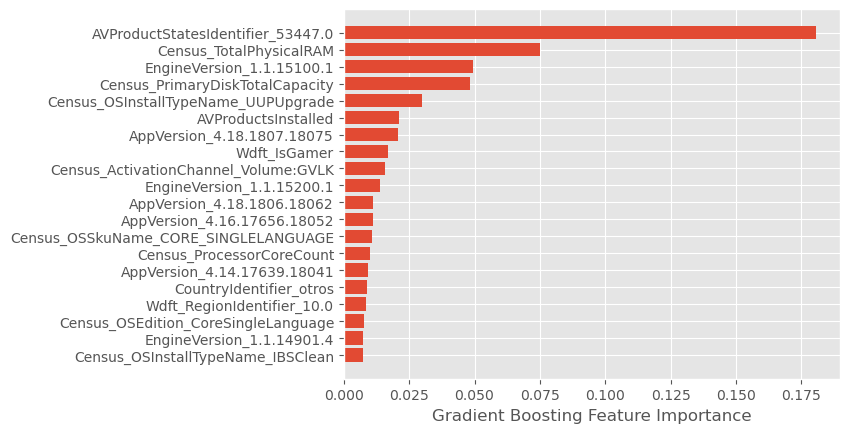

In [71]:
sorted_idx = GB_mejores_parametros.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-20:], GB_mejores_parametros.feature_importances_[sorted_idx][-20:])
plt.xlabel("Gradient Boosting Feature Importance")

Vemos que la variable mas importante es AVProductStatesIdentifier.

In [81]:
y_pred = GB_mejores_parametros.predict(X_test)
print(y_pred)

[False  True  True ... False False  True]


In [82]:
list(y_pred).count(0)

46305

In [83]:
list(y_pred).count(1)

52313

In [73]:
y_proba = GB_mejores_parametros.predict_proba(X_test)
print(y_proba)

[[0.50535697 0.49464303]
 [0.37760158 0.62239842]
 [0.2537585  0.7462415 ]
 ...
 [0.63633896 0.36366104]
 [0.50508886 0.49491114]
 [0.4618862  0.5381138 ]]


In [74]:
y_proba = y_proba[:, 1]
print(y_proba)

[0.49464303 0.62239842 0.7462415  ... 0.36366104 0.49491114 0.5381138 ]


In [75]:
# 4. Evaluamos el modelo

l_thresholds = np.arange(0, 1, 0.01)

# Accuracy
l_accuracy = [metrics.accuracy_score(y_test, y_proba > thr) for thr in l_thresholds]

# Recall
l_recall = [metrics.recall_score(y_test, y_proba > thr) for thr in l_thresholds]

# Precision
l_precision = [metrics.precision_score(y_test, y_proba > thr) for thr in l_thresholds]

# f1
l_f1 = [metrics.f1_score(y_test, y_proba > thr) for thr in l_thresholds]




c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\met

In [76]:
df_metrics = pd.DataFrame(
    data = {
        'accuracy': l_accuracy,
        'recall': l_recall,
        'precision': l_precision,
        'f1': l_f1
        
    },
    index = l_thresholds,
)

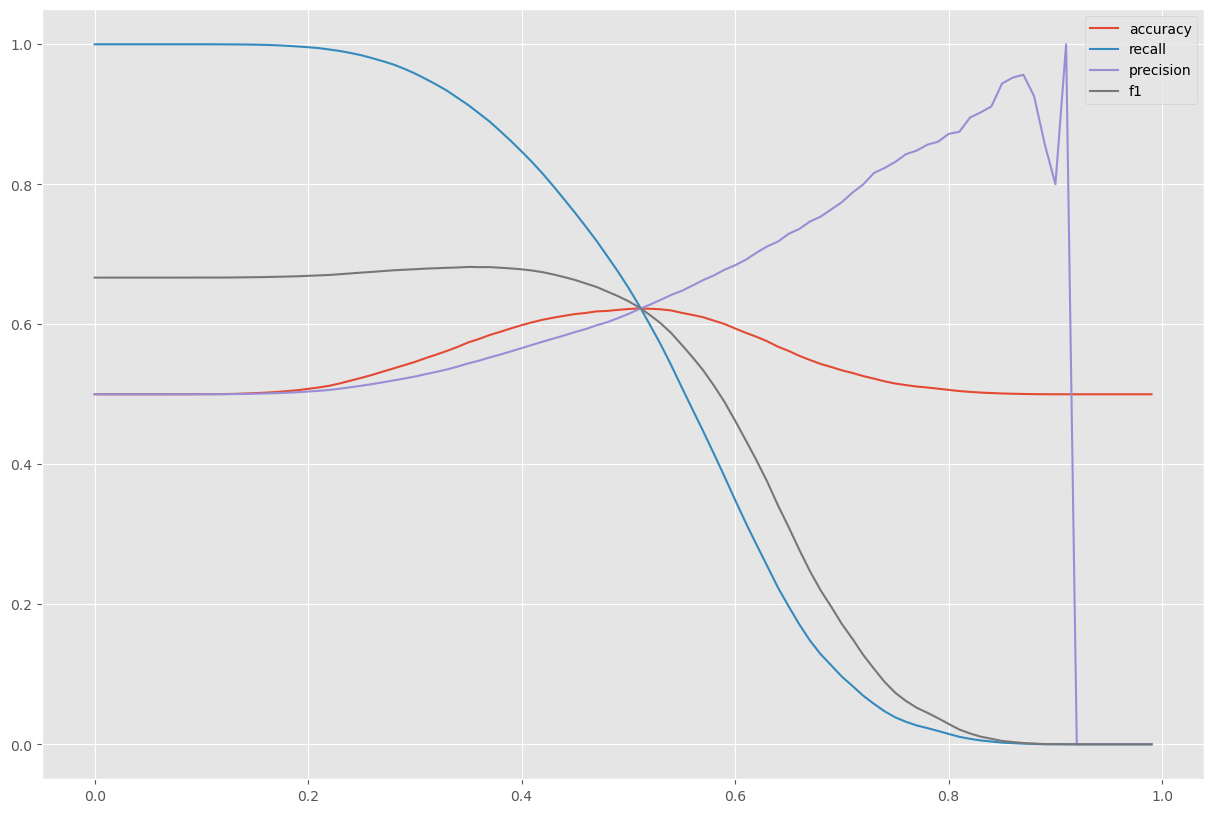

In [77]:
df_metrics.plot(figsize=(15,10))
plt.show()

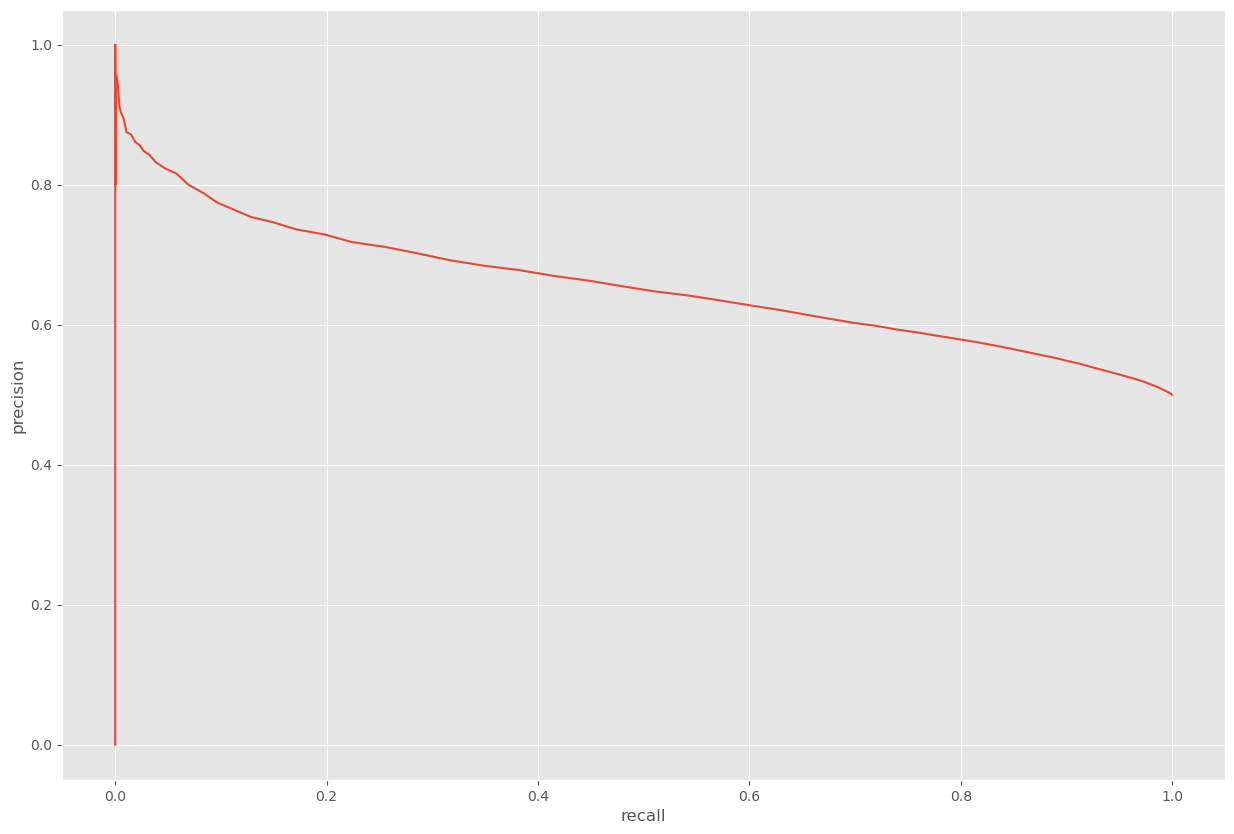

In [78]:
# Precision-recall curve
plt.figure(figsize=(15,10))
sns.lineplot(data = df_metrics, x = 'recall', y = 'precision')
plt.show()

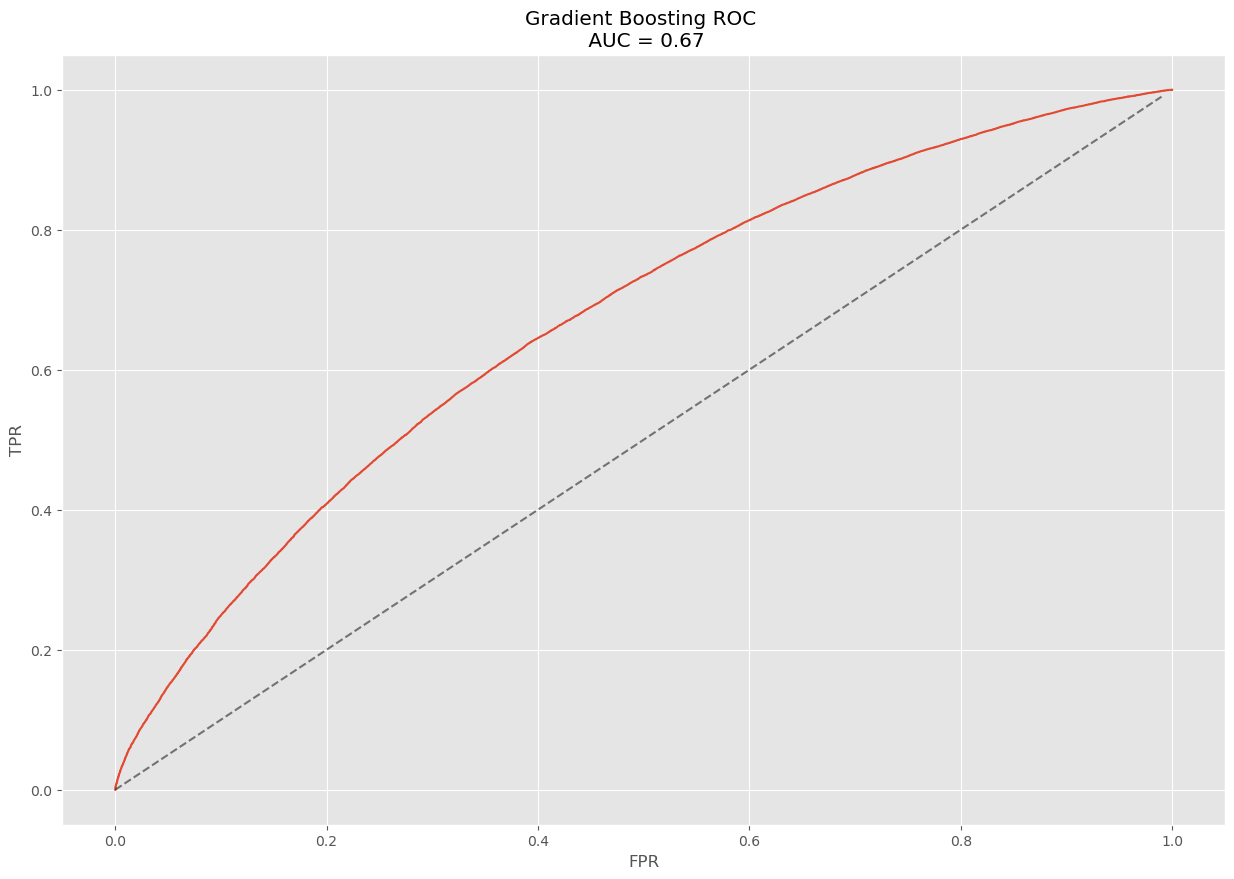

In [79]:
# ROC Curve
plt.figure(figsize=(15,10))
fpr, tpr, thr = metrics.roc_curve(y_test, y_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot(l_thresholds, l_thresholds, color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.title(f'Gradient Boosting ROC \n AUC = {np.round(roc_auc, 2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

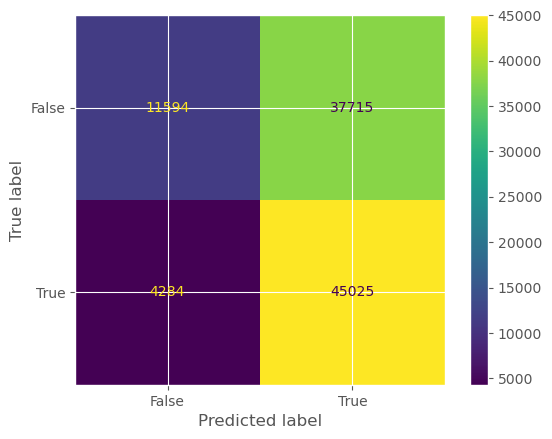

In [109]:
# Confusion matrix (associated with a probability threshold)
PROB_THR = 0.35

confusion_matrix = metrics.confusion_matrix(y_test, (y_proba > PROB_THR).astype(int))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

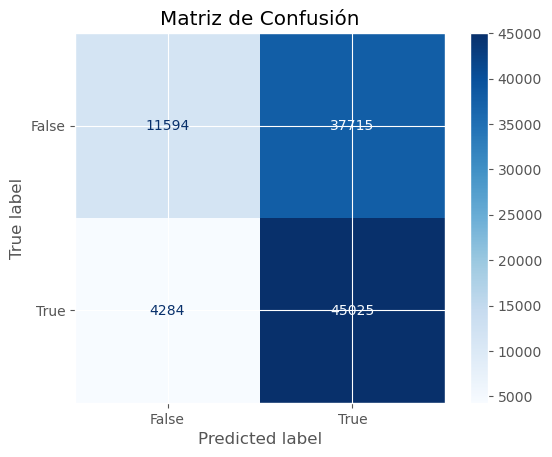

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay

# Crear la matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, (y_proba > PROB_THR).astype(int))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

# Personalizar colores
cmap = plt.get_cmap('Blues')  # Colormap personalizado (puedes cambiarlo a tu preferencia)
cm_display = cm_display.plot(cmap=cmap)

# Mostrar la matriz de confusión
plt.title('Matriz de Confusión')
plt.show()

El modelo es bastante malo.

In [98]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Supongamos que tienes una lista de umbrales
thresholds = np.linspace(0, 1, 21)  # Genera 11 umbrales entre 0 y 1

# Inicializa listas vacías para almacenar los resultados
threshold_values = []
accuracy_values = []
precision_values = []
recall_values = []
false_positive_values = []
false_negative_values = []
true_positive_values = []
true_negative_values = []

# Calcula las métricas para cada umbral
for threshold in thresholds:
    y_pred = (y_proba > threshold).astype(int)
    
    threshold_values.append(threshold)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    precision_values.append(precision_score(y_test, y_pred))
    recall_values.append(recall_score(y_test, y_pred))
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    false_positive_values.append(fp)
    false_negative_values.append(fn)
    true_positive_values.append(tp)
    true_negative_values.append(tn)

# Crea un DataFrame con los resultados
results_df = pd.DataFrame({
    'Threshold': threshold_values,
    'Accuracy': accuracy_values,
    'Precision': precision_values,
    'Recall': recall_values,
    'False_Positive': false_positive_values,
    
    'True_Positive': true_positive_values,
    'False_Negative': false_negative_values,
    'True_Negative': true_negative_values
})

# Muestra el DataFrame
print(results_df)

    Threshold  Accuracy  Precision  Recall  False_Positive  True_Positive  \
0        0.00      0.50       0.50    1.00           49309          49309   
1        0.05      0.50       0.50    1.00           49309          49309   
2        0.10      0.50       0.50    1.00           49294          49308   
3        0.15      0.50       0.50    1.00           49123          49282   
4        0.20      0.51       0.50    1.00           48334          49101   
5        0.25      0.52       0.51    0.98           46210          48533   
6        0.30      0.55       0.53    0.96           42690          47250   
7        0.35      0.57       0.54    0.91           37715          45025   
8        0.40      0.60       0.57    0.85           32017          41754   
9        0.45      0.61       0.59    0.76           26135          37438   
10       0.50      0.62       0.61    0.65           20151          32162   
11       0.55      0.62       0.65    0.51           13670          25138   

c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
results_df['%_False_Positive'] = results_df['False_Positive']*100/len(y_test)
results_df['%_True_Positive'] = results_df['True_Positive']*100/len(y_test)
results_df['%_False_Negative'] = results_df['False_Negative']*100/len(y_test)
results_df['%_True_Negative'] = results_df['True_Negative']*100/len(y_test)


In [115]:
results_df['%_Positive'] = results_df['%_False_Positive'] + results_df['%_True_Positive']
results_df['%_Negative'] = results_df['%_False_Negative'] + results_df['%_True_Negative']

In [116]:
results_df

Threshold  Accuracy  Precision  Recall  False_Positive  True_Positive  \
0        0.00      0.50       0.50    1.00           49309          49309   
1        0.05      0.50       0.50    1.00           49309          49309   
2        0.10      0.50       0.50    1.00           49294          49308   
3        0.15      0.50       0.50    1.00           49123          49282   
4        0.20      0.51       0.50    1.00           48334          49101   
5        0.25      0.52       0.51    0.98           46210          48533   
6        0.30      0.55       0.53    0.96           42690          47250   
7        0.35      0.57       0.54    0.91           37715          45025   
8        0.40      0.60       0.57    0.85           32017          41754   
9        0.45      0.61       0.59    0.76           26135          37438   
10       0.50      0.62       0.61    0.65           20151          32162   
11       0.55      0.62       0.65    0.51           13670          25138   
12       0.60      0.59       0.68    0.35            7935          17203   
13       0.65      0.56       0.73    0.20            3613           9728   
14       0.70      0.53       0.77    0.10            1386           4761   
15       0.75      0.52       0.83    0.04             383           1896   
16       0.80      0.51       0.87    0.01             107            729   
17       0.85      0.50       0.94    0.00               7            118   
18       0.90      0.50       0.80    0.00               1              4   
19       0.95      0.50       0.00    0.00               0              0   
20       1.00      0.50       0.00    0.00               0              0   

    False_Negative  True_Negative  %_False_Positive  %_True_Positive  \
0                0              0             50.00            50.00   
1                0              0             50.00            50.00   
2                1             15             49.98            50.00   
3               27            186             49.81            49.97   
4              208            975             49.01            49.79   
5              776           3099             46.86            49.21   
6             2059           6619             43.29            47.91   
7             4284          11594             38.24            45.66   
8             7555          17292             32.47            42.34   
9            11871          23174             26.50            37.96   
10           17147          29158             20.43            32.61   
11           24171          35639             13.86            25.49   
12           32106          41374              8.05            17.44   
13           39581          45696              3.66             9.86   
14           44548          47923              1.41             4.83   
15           47413          48926              0.39             1.92   
16           48580          49202              0.11             0.74   
17           49191          49302              0.01             0.12   
18           49305          49308              0.00             0.00   
19           49309          49309              0.00             0.00   
20           49309          49309              0.00             0.00   

    %_False_Negative  %_True_Negative  %_Positive  %_Negative  
0               0.00             0.00      100.00        0.00  
1               0.00             0.00      100.00        0.00  
2               0.00             0.02       99.98        0.02  
3               0.03             0.19       99.78        0.22  
4               0.21             0.99       98.80        1.20  
5               0.79             3.14       96.07        3.93  
6               2.09             6.71       91.20        8.80  
7               4.34            11.76       83.90       16.10  
8               7.66            17.53       74.80       25.20  
9              12.04            23.50       64.46       35.54  
10             17.39

<AxesSubplot:xlabel='Threshold'>

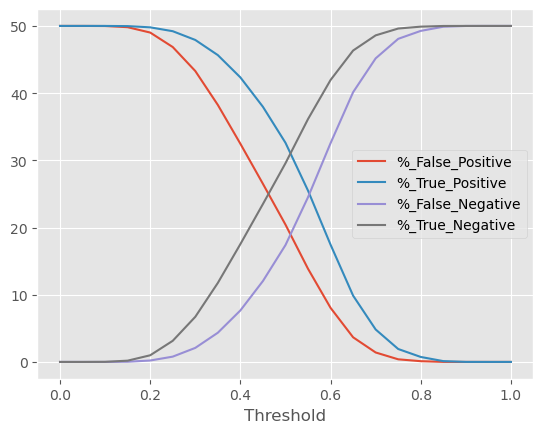

In [111]:
results_df.plot(x='Threshold', y=['%_False_Positive','%_True_Positive','%_False_Negative','%_True_Negative'])

In [99]:
len(y_test)

98618

In [81]:
df_metrics

accuracy  recall  precision   f1
0.00      0.50    1.00       0.50 0.67
0.01      0.50    1.00       0.50 0.67
0.02      0.50    1.00       0.50 0.67
0.03      0.50    1.00       0.50 0.67
0.04      0.50    1.00       0.50 0.67
0.05      0.50    1.00       0.50 0.67
0.06      0.50    1.00       0.50 0.67
0.07      0.50    1.00       0.50 0.67
0.08      0.50    1.00       0.50 0.67
0.09      0.50    1.00       0.50 0.67
0.10      0.50    1.00       0.50 0.67
0.11      0.50    1.00       0.50 0.67
0.12      0.50    1.00       0.50 0.67
0.13      0.50    1.00       0.50 0.67
0.14      0.50    1.00       0.50 0.67
0.15      0.50    1.00       0.50 0.67
0.16      0.50    1.00       0.50 0.67
0.17      0.50    1.00       0.50 0.67
0.18      0.50    1.00       0.50 0.67
0.19      0.51    1.00       0.50 0.67
0.20      0.51    1.00       0.50 0.67
0.21      0.51    0.99       0.50 0.67
0.22      0.51    0.99       0.51 0.67
0.23      0.52    0.99       0.51 0.67
0.24      0.52    0.99       0.51 0.67
0.25      0.52    0.98       0.51 0.67
0.26      0.53    0.98       0.51 0.67
0.27      0.53    0.98       0.52 0.68
0.28      0.54    0.97       0.52 0.68
0.29      0.54    0.97       0.52 0.68
0.30      0.55    0.96       0.53 0.68
0.31      0.55    0.95       0.53 0.68
0.32      0.56    0.94       0.53 0.68
0.33      0.56    0.93       0.54 0.68
0.34      0.57    0.92       0.54 0.68
0.35      0.57    0.91       0.54 0.68
0.36      0.58    0.90       0.55 0.68
0.37      0.58    0.89       0.55 0.68
0.38      0.59    0.88       0.56 0.68
0.39      0.59    0.86       0.56 0.68
0.40      0.60    0.85       0.57 0.68
0.41      0.60    0.83       0.57 0.68
0.42      0.61    0.81       0.58 0.67
0.43      0.61    0.80       0.58 0.67
0.44      0.61    0.78       0.58 0.67
0.45      0.61    0.76       0.59 0.66
0.46      0.62    0.74       0.59 0.66
0.47      0.62    0.72       0.60 0.65
0.48      0.62    0.70       0.60 0.65
0.49      0.62    0.68       0.61 0.64
0.50      0.62    0.65       0.61 0.63
0.51      0.62    0.63       0.62 0.62
0.52      0.62    0.60       0.63 0.61
0.53      0.62    0.57       0.63 0.60
0.54      0.62    0.54       0.64 0.59
0.55      0.62    0.51       0.65 0.57
0.56      0.61    0.48       0.66 0.55
0.57      0.61    0.45       0.66 0.53
0.58      0.61    0.42       0.67 0.51
0.59      0.60    0.38       0.68 0.49
0.60      0.59    0.35       0.68 0.46
0.61      0.59    0.32       0.69 0.43
0.62      0.58    0.29       0.70 0.41
0.63      0.58    0.25       0.71 0.38
0.64      0.57    0.22       0.72 0.34
0.65      0.56    0.20       0.73 0.31
0.66      0.56    0.17       0.74 0.28
0.67      0.55    0.15       0.75 0.25
0.68      0.54    0.13       0.75 0.22
0.69      0.54    0.11       0.76 0.20
0.70      0.53    0.10       0.77 0.17
0.71      0.53    0.08       0.79 0.15
0.72      0.53    0.07       0.80 0.13
0.73      0.52    0.06       0.82 0.11
0.74      0.52    0.05       0.82 0.09
0.75      0.52    0.04       0.83 0.07
0.76      0.51    0.03       0.84 0.06
0.77      0.51    0.03       0.85 0.05
0.78      0.51    0.02       0.86 0.05
0.79      0.51    0.02       0.86 0.04
0.80      0.51    0.01       0.87 0.03
0.81      0.50    0.01       0.88 0.02
0.82      0.50    0.01       0.90 0.02
0.83      0.50    0.01       0.90 0.01
0.84      0.50    0.00       0.91 0.01
0.85      0.50    0.00       0.94 0.00
0.86      0.50    0.00       0.95 0.00
0.87      0.50    0.00       0.96 0.00
0.88      0.50    0.00       0.93 0.00
0.89      0.50    0.00       0.86 0.00
0.90      0.50    0.00       0.80 0.00
0.91      0.50    0.00       1.00 0.00
0.92      0.50    0.00       0.00 0.00
0.93      0.50    0.00       0.00 0.00
0.94      0.50    0.00       0.00 0.00
0.95      0.50    0.00       0.00 0.00
0.96      0.50    0.00       0.00 0.00
0.97      0.50    0.00       0.00 0.00
0.98      0.50    0.00       0.00 0.00
0.99      0.50    0.00       0.00 0.00

Vamos a hacer la exploracion con XGBoost

In [58]:
import xgboost as xgb


In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
X_train

AVProductsInstalled  IsProtected  Census_ProcessorCoreCount  \
3070924                    1         True                          4   
5726271                    1         True                          8   
4060173                    1         True                          4   
5040402                    1         True                          4   
3523426                    2         True                          4   
...                      ...          ...                        ...   
428541                     1         True                          4   
2085278                    2         True                          4   
6006070                    2         True                          8   
4874353                    1         True                          4   
8335186                    1         True                          4   

         Census_PrimaryDiskTotalCapacity  Census_HasOpticalDiskDrive  \
3070924                           122104                       False   
5726271                           114473                       False   
4060173                           476940                       False   
5040402                           476940                       False   
3523426                           953869                       False   
...                                  ...                         ...   
428541                            476940                       False   
2085278                           953869                       False   
6006070                           122104                       False   
4874353                           305245                       False   
8335186                           953869                        True   

         Census_TotalPhysicalRAM  Census_IsSecureBootEnabled  \
3070924                     8192                        True   
5726271                    32768                        True   
4060173                     4096                       False   
5040402                     8192                       False   
3523426                     6144                       False   
...                          ...                         ...   
428541                      4096                        True   
2085278                     4096                       False   
6006070                    16384                        True   
4874353                     4096                       False   
8335186                     6144                        True   

         Census_IsTouchEnabled  Census_IsPenCapable  \
3070924                   True                False   
5726271                  False                False   
4060173                  False                False   
5040402                  False                False   
3523426                  False                False   
...                        ...                  ...   
428541                   False                False   
2085278                  False                False   
6006070                  False                False   
4874353                  False                False   
8335186                  False                False   

         Census_IsAlwaysOnAlwaysConnectedCapable  ...  \
3070924                                    False  ...   
5726271                                    False  ...   
4060173                                    False  ...   
5040402                                    False  ...   
3523426                                    False  ...   
...                                          ...  ...   
428541                                     False  ...   
2085278                                    False  ...   
6006070                                    False  ...   
4874353                                    False  ...   
8335186                                    False  ...   

         Wdft_RegionIdentifier_5.0  Wdft_RegionIdentifier_6.0  \
3070924                          0                          0   
5726271                          0

In [63]:
modelo_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
gbm_param_grid = {'objective' :'binary:logistic',
                  'learning_rate': np.arange(0.05,1.05,.05),
                  'n_estimators': [200],
                  'subsample': np.arange(0.05,1.05,.05),
                  'colsample_bytree':np.arange(0.05,1.05,.05),
                  }
gbm = xgb.XGBClassifier(early_stopping_rounds=5)
randomized_auc = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid,
n_iter=10, scoring='roc_auc', cv=4, verbose=1, n_jobs=-2)
randomized_auc.fit(X_train, y_train)
print("Best parameters found: ",randomized_auc.best_params_)
print("Highest AUC Score: ", randomized_auc.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\Mikel\anaconda3\envs\Superacion\lib\site-packages\xgboost\sklearn.py", line 1471, in fit
    train_dmatrix, evals = _wrap_evaluati

XGBoostError: [17:07:52] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `b`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror
